**Problem Statement:**
------------------------

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’.

**The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale.** You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

-----------------------------------------------------------------------------
**Data Dictionary:**
------------------

ID - The unique ID of the passenger

Gender - The gender of the passenger

Customer_Type - Loyalty type of the passenger

Age - The age of the passenger

Type_Travel - Purpose of travel for the passenger

Travel_Class - The train class that the passenger traveled in

Travel_Distance - The distance traveled by the passenger

Departure_Delay_in_Mins - The delay (in minutes) in train departure

Arrival_Delay_in_Mins - The delay (in minutes) in train arrival

ID - The unique ID of the passenger

Platform_Location -	How convenient the location of the platform is for the passenger

Seat_Class -	The type of the seat class in the train. Green Car seats are usually more spacious and comfortable than ordinary seats. On the Shinkansen train, there are only four seats per row in the Green Car, versus five in the ordinary car.

Overall_Experience -	The overall experience of the passenger

Seat_Comfort - The comfort level of the seat for the passenger

Arrival_Time_Convenient -	How convenient the arrival time of the train is for the passenger

Catering -	How convenient the catering service is for the passenger

Onboard_Wifi_Service -	The quality of the onboard Wi-Fi service for the passenger

Onboard_Entertainment -	The quality of the onboard entertainment for the passenger

Online_Support -	The quality of the online support for the passenger

Ease_of_Online_Booking -	The ease of online booking for the passenger

Onboard_Service -	The quality of the onboard service for the passenger

Legroom -  the general term used in place of the more accurate “seat pitch”, which is the distance between a point on one seat and the same point on the seat in front of it. This variable describes the convenience of the legroom provided for the passenger

Baggage_Handling -	The convenience of baggage handling for the passenger

CheckIn_Service -	The convenience of the check-in service for the passenger

Cleanliness -	The passenger's view of the cleanliness of the service

Online_Boarding -	The convenience of the online boarding process for the passenger



#Importing Libraries and Datset

Making sure Keras 2.15.0 is installed

In [ ]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.7 MB/s eta 0:00:00


Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from displaying to console
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier is used for categorical variables. But since we used get dummies, everything we have is going to be numerical variables
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, precision_score, f1_score, accuracy_score
from sklearn import tree

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

#Import tensorflow for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Import Datasets

In [ ]:
#Change the path locations accordingly
surveydata_test = pd.read_csv('/content/drive/MyDrive/GreatLearning/Hackathon/Datasets/Surveydata_test.csv')
surveydata_train = pd.read_csv('/content/drive/MyDrive/GreatLearning/Hackathon/Datasets/Surveydata_train.csv')
traveldata_test = pd.read_csv('/content/drive/MyDrive/GreatLearning/Hackathon/Datasets/Traveldata_test.csv')
traveldata_train = pd.read_csv('/content/drive/MyDrive/GreatLearning/Hackathon/Datasets/Traveldata_train.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/GreatLearning/Hackathon/Datasets/Sample_Submission.csv')
data_dictionary = pd.read_excel('/content/drive/MyDrive/GreatLearning/Hackathon/Datasets/Data_Dictionary.xlsx')

Making copies of each dataset

In [ ]:
#This is done to protect the data, in case you accidentally deleted the data (better be safe than sorry)
surveydata_test_copy = surveydata_test.copy()
surveydata_train_copy = surveydata_train.copy()
traveldata_test_copy = traveldata_test.copy()
traveldata_train_copy = traveldata_train.copy()
sample_sumission_copy = sample_submission.copy()

#Understanding the Data

In [ ]:
#This function will study the data's shape, datatype, number of null data and number of duplicate data.
def studydata(df):
    print("Shape:")
    print(df.shape)
    print("\nInfo:")
    print(df.info())
    print("\nNull:")
    print(df.isnull().sum())
    print("\nDuplicates:")
    print(df.duplicated().sum())

    # print("\nHead:")
    # print(df.head().T)
    # print("\nTail:")
    # print(df.tail().T)

##Survey_Train

In [ ]:
studydata(surveydata_train)

Shape:
(94379, 17)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Serv

In [ ]:
#Transposed for easier view
surveydata_train.head().T

0                  1  \
ID                                98800001           98800002   
Overall_Experience                       0                  0   
Seat_Comfort             Needs Improvement               Poor   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient          Excellent          Excellent   
Catering                         Excellent               Poor   
Platform_Location          Very Convenient  Needs Improvement   
Onboard_Wifi_Service                  Good               Good   
Onboard_Entertainment    Needs Improvement               Poor   
Online_Support                  Acceptable               Good   
Ease_of_Online_Booking   Needs Improvement               Good   
Onboard_Service          Needs Improvement          Excellent   
Legroom                         Acceptable  Needs Improvement   
Baggage_Handling         Needs Improvement               Poor   
CheckIn_Service                       Good  Needs Improvement   
Cleanliness              Needs Improvement               Good   
Online_Boarding                       Poor               Good   

                                         2                  3  \
ID                                98800003           98800004   
Overall_Experience                       1                  0   
Seat_Comfort             Needs Improvement         Acceptable   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient  Needs Improvement  Needs Improvement   
Catering                 Needs Improvement                NaN   
Platform_Location        Needs Improvement  Needs Improvement   
Onboard_Wifi_Service     Needs Improvement         Acceptable   
Onboard_Entertainment                 Good  Needs Improvement   
Online_Support                   Excellent         Acceptable   
Ease_of_Online_Booking           Excellent         Acceptable   
Onboard_Service                  Excellent         Acceptable   
Legroom                          Excellent         Acceptable   
Baggage_Handling                 Excellent         Acceptable   
CheckIn_Service                       Good               Good   
Cleanliness                      Excellent         Acceptable   
Online_Boarding                  Excellent         Acceptable   

                                         4  
ID                                98800005  
Overall_Experience                       1  
Seat_Comfort                    Acceptable  
Seat_Class                        Ordinary  
Arrival_Time_Convenient         Acceptable  
Catering                        Acceptable  
Platform_Location               Manageable  
Onboard_Wifi_Service     Needs Improvement  
Onboard_Entertainment                 Good  
Online_Support                   Excellent  
Ease_of_Online_Booking                Good  
Onboard_Service                       Good  
Legroom                               Good  
Baggage_Handling                      Good  
CheckIn_Service                       Good  
Cleanliness                           Good  
Online_Boarding                       Good

In [ ]:
surveydata_train.tail().T

94374              94375  \
ID                                98894375           98894376   
Overall_Experience                       0                  1   
Seat_Comfort                          Poor               Good   
Seat_Class                        Ordinary           Ordinary   
Arrival_Time_Convenient               Good               Good   
Catering                              Good               Good   
Platform_Location               Convenient         Convenient   
Onboard_Wifi_Service                  Poor  Needs Improvement   
Onboard_Entertainment                 Poor          Excellent   
Online_Support                        Poor          Excellent   
Ease_of_Online_Booking                Poor         Acceptable   
Onboard_Service                       Good         Acceptable   
Legroom                               Good         Acceptable   
Baggage_Handling                      Good         Acceptable   
CheckIn_Service          Needs Improvement               Good   
Cleanliness                           Good         Acceptable   
Online_Boarding                       Poor               Good   

                                     94376              94377       94378  
ID                                98894377           98894378    98894379  
Overall_Experience                       1                  0           0  
Seat_Comfort             Needs Improvement  Needs Improvement  Acceptable  
Seat_Class                       Green Car           Ordinary    Ordinary  
Arrival_Time_Convenient  Needs Improvement                NaN        Poor  
Catering                 Needs Improvement  Needs Improvement  Acceptable  
Platform_Location        Needs Improvement         Convenient  Manageable  
Onboard_Wifi_Service                  Good               Good  Acceptable  
Onboard_Entertainment            Excellent  Needs Improvement  Acceptable  
Online_Support                        Good               Good  Acceptable  
Ease_of_Online_Booking                Good               Good  Acceptable  
Onboard_Service                       Good         Acceptable        Poor  
Legroom                               Good               Good        Good  
Baggage_Handling                      Good               Good        Good  
CheckIn_Service                 Acceptable               Good        Poor  
Cleanliness                           Good          Excellent        Good  
Online_Boarding                 Acceptable               Good  Acceptable

In [ ]:
#Finding the percentage of null values
surveydata_train.isnull().sum()/len(surveydata_train)

ID                         0.000000
Overall_Experience         0.000000
Seat_Comfort               0.000646
Seat_Class                 0.000000
Arrival_Time_Convenient    0.094619
Catering                   0.092616
Platform_Location          0.000318
Onboard_Wifi_Service       0.000318
Onboard_Entertainment      0.000191
Online_Support             0.000964
Ease_of_Online_Booking     0.000773
Onboard_Service            0.080537
Legroom                    0.000954
Baggage_Handling           0.001505
CheckIn_Service            0.000816
Cleanliness                0.000064
Online_Boarding            0.000064
dtype: float64

Observations:
1.	94379 entries
2.	ID and Overall experience is integer, rest are objects
3.	Overall experience is binary
4.	Most of the columns have missing values, only ID, overall experience, and seat class does not have missing values
5.	Most of the data here can be turned into 1 2 3 4 5 6 instead of ordinal values
6.	Arrival time, onboard service and catering has almost 10% missing values
7.	Data does not have duplicated entries


##Survey_Test

In [ ]:
studydata(surveydata_test)

Shape:
(35602, 16)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness 

In [ ]:
surveydata_test.head().T

0               1                  2  \
ID                                99900001        99900002           99900003   
Seat_Comfort                    Acceptable  Extremely Poor          Excellent   
Seat_Class                       Green Car        Ordinary           Ordinary   
Arrival_Time_Convenient         Acceptable            Good          Excellent   
Catering                        Acceptable            Poor          Excellent   
Platform_Location               Manageable      Manageable    Very Convenient   
Onboard_Wifi_Service     Needs Improvement      Acceptable          Excellent   
Onboard_Entertainment            Excellent            Poor          Excellent   
Online_Support                        Good      Acceptable          Excellent   
Ease_of_Online_Booking           Excellent      Acceptable  Needs Improvement   
Onboard_Service                  Excellent       Excellent  Needs Improvement   
Legroom                          Excellent      Acceptable  Needs Improvement   
Baggage_Handling                 Excellent            Good  Needs Improvement   
CheckIn_Service                       Good      Acceptable               Good   
Cleanliness                      Excellent       Excellent  Needs Improvement   
Online_Boarding                       Poor      Acceptable          Excellent   

                                         3                  4  
ID                                99900004           99900005  
Seat_Comfort                    Acceptable          Excellent  
Seat_Class                       Green Car           Ordinary  
Arrival_Time_Convenient          Excellent     Extremely Poor  
Catering                        Acceptable          Excellent  
Platform_Location          Very Convenient  Needs Improvement  
Onboard_Wifi_Service                  Poor          Excellent  
Onboard_Entertainment           Acceptable          Excellent  
Online_Support                   Excellent          Excellent  
Ease_of_Online_Booking                Poor          Excellent  
Onboard_Service                 Acceptable                NaN  
Legroom                  Needs Improvement         Acceptable  
Baggage_Handling                 Excellent          Excellent  
CheckIn_Service                  Excellent          Excellent  
Cleanliness                      Excellent          Excellent  
Online_Boarding                       Poor          Excellent

In [ ]:
surveydata_test.tail().T

35597              35598  \
ID                                99935598           99935599   
Seat_Comfort             Needs Improvement  Needs Improvement   
Seat_Class                       Green Car           Ordinary   
Arrival_Time_Convenient          Excellent  Needs Improvement   
Catering                 Needs Improvement               Good   
Platform_Location               Manageable  Needs Improvement   
Onboard_Wifi_Service            Acceptable         Acceptable   
Onboard_Entertainment    Needs Improvement          Excellent   
Online_Support                  Acceptable          Excellent   
Ease_of_Online_Booking          Acceptable               Good   
Onboard_Service                       Good               Good   
Legroom                          Excellent               Good   
Baggage_Handling                      Good               Good   
CheckIn_Service                 Acceptable         Acceptable   
Cleanliness                           Good               Good   
Online_Boarding                 Acceptable               Good   

                                     35599         35600              35601  
ID                                99935600      99935601           99935602  
Seat_Comfort                          Good     Excellent               Good  
Seat_Class                       Green Car      Ordinary           Ordinary  
Arrival_Time_Convenient     Extremely Poor     Excellent         Acceptable  
Catering                              Good     Excellent               Good  
Platform_Location        Needs Improvement  Inconvenient         Manageable  
Onboard_Wifi_Service     Needs Improvement    Acceptable               Poor  
Onboard_Entertainment                 Good     Excellent               Good  
Online_Support                        Poor          Good               Poor  
Ease_of_Online_Booking   Needs Improvement     Excellent               Poor  
Onboard_Service                       Poor     Excellent         Acceptable  
Legroom                         Acceptable     Excellent               Good  
Baggage_Handling                      Poor     Excellent               Good  
CheckIn_Service                       Poor    Acceptable  Needs Improvement  
Cleanliness                      Excellent     Excellent               Good  
Online_Boarding          Needs Improvement          Good               Poor

In [ ]:
#Understanding what is the ratio of training data to testing data
total = len(surveydata_test) + len(surveydata_train)
len(surveydata_test)/total

0.2739015702294951

Observations:
1.	35602 Entries
2.	Doesn’t have overall experience
3.	Most of the columns have missing values. Only ID and seat class do not have missing values
4.	Arrival time, onboard service and catering has almost 10% missing values
5.	Data does not have duplicated entries
6.	The train to test data ratio is around 70:30


##Travel_Train

In [ ]:
studydata(traveldata_train)

Shape:
(94379, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB
None

Null:
ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_

In [ ]:
traveldata_train.head().T

0                1                2  \
ID                             98800001         98800002         98800003   
Gender                           Female             Male           Female   
Customer_Type            Loyal Customer   Loyal Customer   Loyal Customer   
Age                                52.0             48.0             43.0   
Type_Travel                         NaN  Personal Travel  Business Travel   
Travel_Class                   Business              Eco         Business   
Travel_Distance                     272             2200             1061   
Departure_Delay_in_Mins             0.0              9.0             77.0   
Arrival_Delay_in_Mins               5.0              0.0            119.0   

                                       3                4  
ID                              98800004         98800005  
Gender                            Female           Female  
Customer_Type             Loyal Customer   Loyal Customer  
Age                                 44.0             50.0  
Type_Travel              Business Travel  Business Travel  
Travel_Class                    Business         Business  
Travel_Distance                      780             1981  
Departure_Delay_in_Mins             13.0              0.0  
Arrival_Delay_in_Mins               18.0              0.0

In [ ]:
traveldata_train.tail().T

94374            94375            94376  \
ID                              98894375         98894376         98894377   
Gender                              Male             Male             Male   
Customer_Type             Loyal Customer   Loyal Customer              NaN   
Age                                 32.0             44.0             63.0   
Type_Travel              Business Travel  Business Travel  Business Travel   
Travel_Class                    Business         Business         Business   
Travel_Distance                     1357              592             2794   
Departure_Delay_in_Mins             83.0              5.0              0.0   
Arrival_Delay_in_Mins              125.0             11.0              0.0   

                                   94377           94378  
ID                              98894378        98894379  
Gender                              Male            Male  
Customer_Type             Loyal Customer  Loyal Customer  
Age                                 16.0            54.0  
Type_Travel              Personal Travel             NaN  
Travel_Class                         Eco             Eco  
Travel_Distance                     2744            2107  
Departure_Delay_in_Mins              0.0            28.0  
Arrival_Delay_in_Mins                0.0            28.0

In [ ]:
#Since travel data has many numerical variables, lets look at their 5 number summaries
traveldata_train.describe()

ID           Age  Travel_Distance  Departure_Delay_in_Mins  \
count  9.437900e+04  94346.000000     94379.000000             94322.000000   
mean   9.884719e+07     39.419647      1978.888185                14.647092   
std    2.724501e+04     15.116632      1027.961019                38.138781   
min    9.880000e+07      7.000000        50.000000                 0.000000   
25%    9.882360e+07     27.000000      1359.000000                 0.000000   
50%    9.884719e+07     40.000000      1923.000000                 0.000000   
75%    9.887078e+07     51.000000      2538.000000                12.000000   
max    9.889438e+07     85.000000      6951.000000              1592.000000   

       Arrival_Delay_in_Mins  
count           94022.000000  
mean               15.005222  
std                38.439409  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                13.000000  
max              1584.000000

Observations:
1.	Same number of entries as surveydata_train
2.	ID, Age, travel distance, delay in departure and arrival are numerical variables. The others are categorical
3.	Only ID, travel class and travel distance do not have missing values.
4.	Customer_type and type_travel has almost 10% missing values
5.	There are also more missing values in arrival delays as compared to departure delays
6.	No duplicated values in dataset
7.	The average passenger is 39 years old with a standard deviation of 15 years. 75% of the passengers are between 24 and 54 years old and 88 of the passengers are between 9 and 69 years old.
8.	The travel distance is in average 1978 km, from a minimum of 50 km to a maximum of 6951 km. We are analysing data of long distance rail journeys.
9.	Minimum travel distance is 50km, which may need to confirm the credibility as the distance is very short
10.	Delay in departure and arrivals are very highly skewed to the left, which means that delays do not often happen. But when they do, they may exist as large delays.
11.	Since both arrival and departure have similar 5 number summaries, they may be feature engineered into a single variable
12. Delay time has an average delay of 14 minutes, with a very high standard deviation of 38 minutes. The minimum is 0 minutes and maximum is 1592 minutes (26 hours), definitely an outlier.
13. Arrival time has an average of 15 minutes, with a very high standard deviation of 38 minutes. The minimum is 0 minutes and maximum is 1584 minutes (26 hours), also definitely an outlier.


##Travel_Test

In [ ]:
studydata(traveldata_test)

Shape:
(35602, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB
None

Null:
ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_

In [ ]:
traveldata_test.head().T

0                  1                2  \
ID                              99900001           99900002         99900003   
Gender                            Female             Female             Male   
Customer_Type                        NaN  Disloyal Customer   Loyal Customer   
Age                                 36.0               21.0             60.0   
Type_Travel              Business Travel    Business Travel  Business Travel   
Travel_Class                    Business           Business         Business   
Travel_Distance                      532               1425             2832   
Departure_Delay_in_Mins              0.0                9.0              0.0   
Arrival_Delay_in_Mins                0.0               28.0              0.0   

                                       3                  4  
ID                              99900004           99900005  
Gender                            Female               Male  
Customer_Type             Loyal Customer  Disloyal Customer  
Age                                 29.0               18.0  
Type_Travel              Personal Travel    Business Travel  
Travel_Class                         Eco           Business  
Travel_Distance                     1352               1610  
Departure_Delay_in_Mins              0.0               17.0  
Arrival_Delay_in_Mins                0.0                0.0

In [ ]:
traveldata_test.tail().T

35597            35598              35599  \
ID                              99935598         99935599           99935600   
Gender                              Male           Female               Male   
Customer_Type             Loyal Customer   Loyal Customer  Disloyal Customer   
Age                                  8.0             53.0               22.0   
Type_Travel              Personal Travel  Business Travel    Business Travel   
Travel_Class                         Eco         Business                Eco   
Travel_Distance                     1334             1772               1180   
Departure_Delay_in_Mins              0.0              0.0                0.0   
Arrival_Delay_in_Mins                0.0              0.0                0.0   

                                   35600            35601  
ID                              99935601         99935602  
Gender                            Female             Male  
Customer_Type             Loyal Customer              NaN  
Age                                 67.0             20.0  
Type_Travel              Personal Travel  Personal Travel  
Travel_Class                         Eco              Eco  
Travel_Distance                      420             1680  
Departure_Delay_in_Mins             23.0              0.0  
Arrival_Delay_in_Mins               16.0              0.0

In [ ]:
traveldata_test.describe()

ID           Age  Travel_Distance  Departure_Delay_in_Mins  \
count  3.560200e+04  35591.000000     35602.000000             35573.000000   
mean   9.991780e+07     39.446995      1987.151761                14.880696   
std    1.027756e+04     15.137554      1024.308863                37.895453   
min    9.990000e+07      7.000000        50.000000                 0.000000   
25%    9.990890e+07     27.000000      1360.000000                 0.000000   
50%    9.991780e+07     40.000000      1929.000000                 0.000000   
75%    9.992670e+07     51.000000      2559.000000                13.000000   
max    9.993560e+07     85.000000      6868.000000               978.000000   

       Arrival_Delay_in_Mins  
count           35479.000000  
mean               15.308802  
std                38.531293  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                13.000000  
max               970.000000

Observations:
1.	Same number of entries as survey test
2.	ID, Age, travel distance, delay in departure and arrival are numerical variables. The others are categorical
3.	Only ID, travel class and travel distance do not have missing values.
4.	Customer_type and type_travel has almost 10% missing values
5.	No duplicated values in dataset
6.	Statistical distributions are quite similar to that of traveldata_train

##Combine Training Data for EDA

In [ ]:
#Checking if the travel and survey training data have same IDs
if traveldata_train['ID'].nunique()==surveydata_train['ID'].nunique():
    print(f"the unique ids are the same number")
    n_passengers = traveldata_train['ID'].nunique()
    print(f"there are {n_passengers} passengers in total")

the unique ids are the same number
there are 94379 passengers in total


In [ ]:
#merge dataframes
train = pd.merge(traveldata_train,surveydata_train,how='inner',on='ID')
if n_passengers == train['ID'].nunique():
    print('merge is succesfull, all passengers are in the final dataframe')

merge is succesfull, all passengers are in the final dataframe


In [ ]:
studydata(train)

Shape:
(94379, 25)

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 

In [ ]:
#Percentage of null values in each feature
train.isnull().sum()/train.shape[0]*100

ID                         0.000000
Gender                     0.081586
Customer_Type              9.484101
Age                        0.034965
Type_Travel                9.775480
Travel_Class               0.000000
Travel_Distance            0.000000
Departure_Delay_in_Mins    0.060395
Arrival_Delay_in_Mins      0.378262
Overall_Experience         0.000000
Seat_Comfort               0.064633
Seat_Class                 0.000000
Arrival_Time_Convenient    9.461851
Catering                   9.261594
Platform_Location          0.031787
Onboard_Wifi_Service       0.031787
Onboard_Entertainment      0.019072
Online_Support             0.096420
Ease_of_Online_Booking     0.077348
Onboard_Service            8.053698
Legroom                    0.095360
Baggage_Handling           0.150457
CheckIn_Service            0.081586
Cleanliness                0.006357
Online_Boarding            0.006357
dtype: float64

Observations:
1. Only Customer_Type, Type_Travel, Arrival_Time_Convenient, Catering and Onboard_Service have null values of 8 to 9%.
2. All other values have less than 1% of null values, and can be imputed with average values.


In [ ]:
#Retrieving the names of numerical columns and categorical columns
num_cols = train._get_numeric_data().columns
cat_cols = train.select_dtypes(exclude='number').columns

#Creating the order sequence for countplots
satisfaction_scale = ['Excellent','Good','Acceptable','Needs Improvement','Poor','Extremely Poor']
location_scale = ['Very Convenient', 'Convenient','Manageable','Needs Improvement','Inconvenient','Very Inconvenient']

In [ ]:
# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(train[column].value_counts())
    print("-" * 50)

Female    47815
Male      46487
Name: Gender, dtype: int64
--------------------------------------------------
Loyal Customer       69823
Disloyal Customer    15605
Name: Customer_Type, dtype: int64
--------------------------------------------------
Business Travel    58617
Personal Travel    26536
Name: Type_Travel, dtype: int64
--------------------------------------------------
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64
--------------------------------------------------
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
--------------------------------------------------
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
--------------------------------------------------
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 136

In [ ]:
train.head(1)

ID  Gender   Customer_Type   Age Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0         NaN     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   

   Overall_Experience       Seat_Comfort Seat_Class Arrival_Time_Convenient  \
0                   0  Needs Improvement  Green Car               Excellent   

    Catering Platform_Location Onboard_Wifi_Service Onboard_Entertainment  \
0  Excellent   Very Convenient                 Good     Needs Improvement   

  Online_Support Ease_of_Online_Booking    Onboard_Service     Legroom  \
0     Acceptable      Needs Improvement  Needs Improvement  Acceptable   

    Baggage_Handling CheckIn_Service        Cleanliness Online_Boarding  
0  Needs Improvement            Good  Needs Improvement            Poor

In [ ]:
train.tail(1)

ID Gender   Customer_Type   Age Type_Travel Travel_Class  \
94378  98894379   Male  Loyal Customer  54.0         NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
94378             2107                     28.0                   28.0   

       Overall_Experience Seat_Comfort Seat_Class Arrival_Time_Convenient  \
94378                   0   Acceptable   Ordinary                    Poor   

         Catering Platform_Location Onboard_Wifi_Service  \
94378  Acceptable        Manageable           Acceptable   

      Onboard_Entertainment Online_Support Ease_of_Online_Booking  \
94378            Acceptable     Acceptable             Acceptable   

      Onboard_Service Legroom Baggage_Handling CheckIn_Service Cleanliness  \
94378            Poor    Good             Good            Poor        Good   

      Online_Boarding  
94378      Acceptable

Observations:
1. The following data are binary:
- Gender - Male or Female
- Customer -  Loyal or Disloyal
- Type_travel - Business or Personal
- Travel Class - Eco or Business
- Seat Class - Green car or Ordinary
2. Platform Location is measured in:
- Very Convenient
- Convenient
- Manageable
- Needs Improvement
- Inconvenient
- Very Inconvenient
3. All the other variables are measured by the scale
- Excellent
- Good
- Acceptable
- Needs improvement
- Poor
- Extremely poor
4. Platform location and the other variables can be encoded into numerical values from 0 being the most unsatisfactory rating to 5 being the most satisfactory rating.

In [ ]:
# Defining a function to encode the ratings from categorical to numerical
def cat_to_numerical(x):
    if x=="Excellent":
        return 5
    elif x=="Good":
        return 4
    elif x=="Acceptable":
        return 3
    elif x=="Needs Improvement":
        return 2
    elif x=="Poor":
        return 1
    elif x=="Extremely Poor":
        return 0
    else:
        return x

In [ ]:
appreciation_variables = ['Seat_Comfort',
       'Arrival_Time_Convenient', 'Catering',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding']

#Converting all features with satisfactory scales to numerical variables
for column in appreciation_variables:
    train[column] = train[column].apply(cat_to_numerical)

#Converting Platform_Location to numerical variables
train['Platform_Location'].replace({'Very Convenient': 5,
                                    'Convenient': 4,
                                    'Manageable': 3,
                                    'Needs Improvement': 2,
                                    'Inconvenient': 1,
                                    'Very Inconvenient': 0}, inplace=True)

In [ ]:
train.head(1)

ID  Gender   Customer_Type   Age Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0         NaN     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   

   Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
0                   0           2.0  Green Car                      5.0   

   Catering  Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
0       5.0                5.0                   4.0                    2.0   

   Online_Support  Ease_of_Online_Booking  Onboard_Service  Legroom  \
0             3.0                     2.0              2.0      3.0   

   Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  
0               2.0              4.0          2.0              1.0

In [ ]:
train.tail(1)

ID Gender   Customer_Type   Age Type_Travel Travel_Class  \
94378  98894379   Male  Loyal Customer  54.0         NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
94378             2107                     28.0                   28.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
94378                   0           3.0   Ordinary                      1.0   

       Catering  Platform_Location  Onboard_Wifi_Service  \
94378       3.0                3.0                   3.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
94378                    3.0             3.0                     3.0   

       Onboard_Service  Legroom  Baggage_Handling  CheckIn_Service  \
94378              1.0      4.0               4.0              1.0   

       Cleanliness  Online_Boarding  
94378          4.0              3.0

In [ ]:
train.describe().T

count          mean           std         min  \
ID                       94379.0  9.884719e+07  27245.014865  98800001.0   
Age                      94346.0  3.941965e+01     15.116632         7.0   
Travel_Distance          94379.0  1.978888e+03   1027.961019        50.0   
Departure_Delay_in_Mins  94322.0  1.464709e+01     38.138781         0.0   
Arrival_Delay_in_Mins    94022.0  1.500522e+01     38.439409         0.0   
Overall_Experience       94379.0  5.466576e-01      0.497821         0.0   
Seat_Comfort             94318.0  2.839182e+00      1.392526         0.0   
Arrival_Time_Convenient  85449.0  2.994991e+00      1.526280         0.0   
Catering                 85638.0  2.853511e+00      1.443945         0.0   
Platform_Location        94349.0  2.990864e+00      1.308233         0.0   
Onboard_Wifi_Service     94349.0  3.248227e+00      1.319520         0.0   
Onboard_Entertainment    94361.0  3.382510e+00      1.346190         0.0   
Online_Support           94288.0  3.519250e+00      1.308174         0.0   
Ease_of_Online_Booking   94306.0  3.470108e+00      1.305546         0.0   
Onboard_Service          86778.0  3.470799e+00      1.268574         0.0   
Legroom                  94289.0  3.482994e+00      1.292260         0.0   
Baggage_Handling         94237.0  3.696786e+00      1.156399         1.0   
CheckIn_Service          94302.0  3.342400e+00      1.260307         0.0   
Cleanliness              94373.0  3.704078e+00      1.151988         0.0   
Online_Boarding          94373.0  3.351901e+00      1.298061         0.0   

                                25%         50%         75%         max  
ID                       98823595.5  98847190.0  98870784.5  98894379.0  
Age                            27.0        40.0        51.0        85.0  
Travel_Distance              1359.0      1923.0      2538.0      6951.0  
Departure_Delay_in_Mins         0.0         0.0        12.0      1592.0  
Arrival_Delay_in_Mins           0.0         0.0        13.0      1584.0  
Overall_Experience              0.0         1.0         1.0         1.0  
Seat_Comfort                    2.0         3.0         4.0         5.0  
Arrival_Time_Convenient         2.0         3.0         4.0         5.0  
Catering                        2.0         3.0         4.0         5.0  
Platform_Location               2.0         3.0         4.0         5.0  
Onboard_Wifi_Service            2.0         3.0         4.0         5.0  
Onboard_Entertainment           2.0         4.0         4.0         5.0  
Online_Support                  3.0         4.0         5.0         5.0  
Ease_of_Online_Booking          2.0         4.0         5.0         5.0  
Onboard_Service                 3.0         4.0         4.0         5.0  
Legroom                         2.0         4.0         5.0         5.0  
Baggage_Handling                3.0         4.0         5.0         5.0  
CheckIn_Service                 3.0         3.0         4.0         5.0  
Cleanliness                     3.0         4.0         5.0         5.0  
Online_Boarding                 2.0         4.0         4.0         5.0

#Exploratory Data Analysis

##Univariate Analysis

###Functions

In [ ]:
def labeled_countplot(data,feature,perc = False, n = None, order = None):
  total = len(data[feature])
  count = data[feature].nunique()

  #Changing size of the plot
  if n is None:
    plt.figure(figsize = (count + 1, 5)) #if n is not specified, then the size of the chart will be the according to number of features
  else:
    plt.figure(figsize = (n + 1, 5))

  #Rotate the x labels
  plt.xticks(rotation = 90)

  #Creating the order sequence for countplots
  satisfaction_scale = ['Excellent','Good','Acceptable','Needs Improvement','Poor','Extremely Poor']
  location_scale = ['Very Convenient', 'Convenient','Manageable','Needs Improvement','Inconvenient','Very Inconvenient']
  numerical_scale = [5,4,3,2,1,0]

  #Create the countplot and assigning it to object
  if order == True:
    ax = sns.histplot(data = data,
                      x = feature,
                      bins = 6,
                      binwidth = 1,
                      discrete = True)

  elif order == None:
    ax = sns.countplot(data = data,
                      x = feature,
                      palette = "Paired",
                      order = data.groupby([feature])['ID'].count().sort_values(ascending = False).index)

  else:
    ax = sns.countplot(data = data,
                      x = feature,
                      palette = "Paired")

  #Creating the labels
  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(100*p.get_height()/total) #Gets the percentage value of the height
    else:
      label = p.get_height() # Just get the height without percentage

    #Getting coordinates for the annotation
    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    #Coding the annotations
    ax.annotate(label,(x,y),
                ha = "center",
                va = "center",
                size = 12,
                xytext = (0,5),
                textcoords = "offset points")

  plt.show()

  #Print out the number of null values
  missing = len(data.loc[data[feature].isnull() == True])
  print('Number of null values: ',missing)

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, whis = 1.5,outliers = True, mean = True, median = True):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
     #Here they set the axes to 2 variables, but in the other project we set to 1 variable. That 1 variable is a tuple of 2 axes, so we need to use ax[0] and ax[1] to define the axies for each subplot
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                              sharex = True,  # x-axis will be shared among all subplots
                              gridspec_kw = {"height_ratios": (0.25, 0.75)}, #This sets the 2 subplots' height ratios, with top one taking 25% of the total figure
                              figsize = figsize) # Creating the 2 subplots

    # Create Boxplot that shows mean
    sns.boxplot(data = data,
                x = feature,
                whis = whis,
                showfliers =  outliers,
                ax = ax_box2,
                showmeans = True,
                color = "violet")

    # Create Histogram
    sns.histplot(data = data,
                 x = feature,
                 kde = kde,
                 ax = ax_hist2,
                 bins = bins, #Since the bins cannot = non-integer, we need this second part of code
                 palette = "winter") if bins else sns.histplot(data = data,
                                                               x = feature,
                                                               kde = kde,
                                                               ax = ax_hist2)
    # Add mean to the histogram
    if mean == True:
      ax_hist2.axvline(data[feature].mean(),
                      color = "green",
                      linestyle = "--")
    else:
      pass

    # Add median to the histogram
    if median == True:
      ax_hist2.axvline(data[feature].median(),
                      color = "black",
                      linestyle = "-")
    else:
      pass

In [ ]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique() #This pulls out the number of unique values in the column
    sorter = data[target].value_counts().index[-1] #this tells you the least frequent value, as it sorts based on the frequency, and -1 means the least frequent

    #Create the stacked barplot for understanding
    tab1 = pd.crosstab(data[predictor],
                       data[target],
                       margins = True).sort_values(by = sorter, #Sort based on the least frequent value
                                                   ascending = False)
    print(tab1)
    print("-" * 120)

    #Create the stacked barplot for visualizing
    tab = pd.crosstab(data[predictor],
                      data[target],
                      normalize = "index").sort_values(by = sorter,
                                                       ascending = False)

    tab.plot(kind = "bar",
             stacked = True,
             figsize = (count + 1, 5))

    plt.legend(loc = "lower left",frameon = False,)
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

###Numerical Variables

###Age

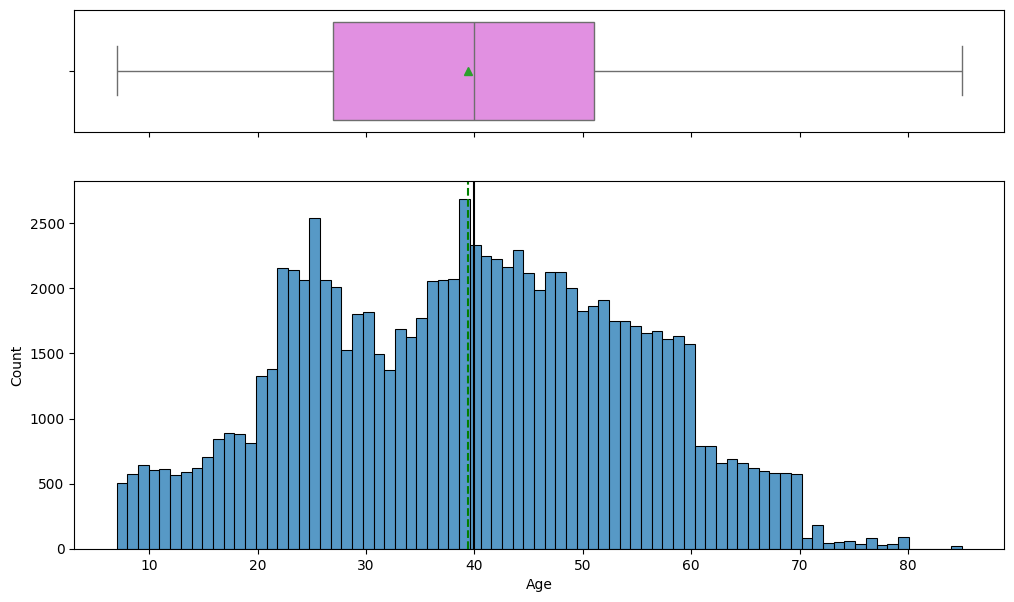

In [ ]:
histogram_boxplot(train, 'Age', figsize=(12, 7), kde=False, bins = 79)

In [ ]:
train['Age'].isnull().sum()

33

Observations:
1. There are 2 very common age: 26 and 40 years old.
2. There is a dip in number of passengers around the age of 30.
3. No outliers.
4. There are 33 missing values, safe to substitute with average values.


###Travel_Distance

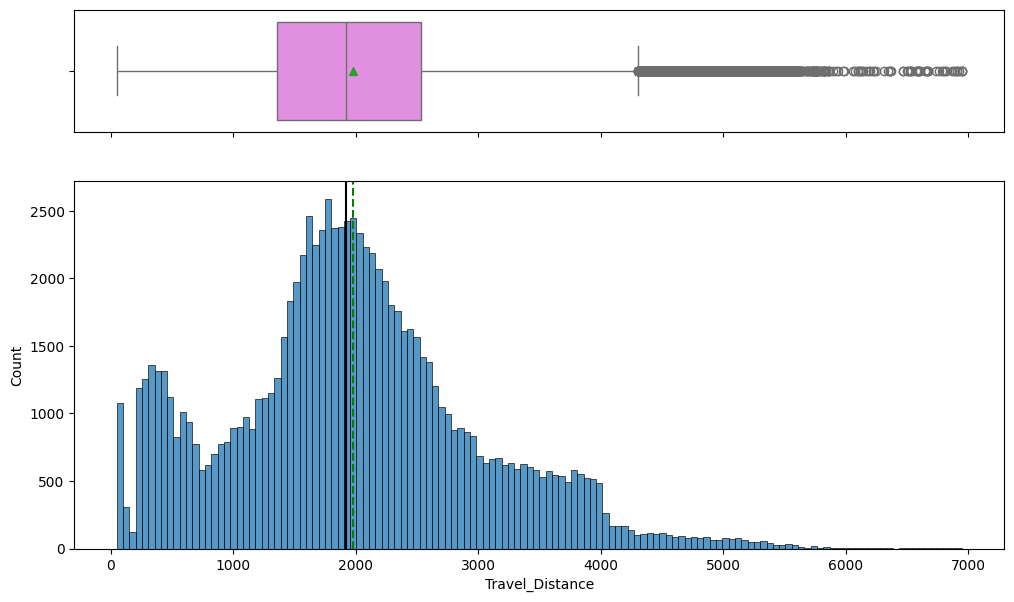

In [ ]:
histogram_boxplot(train, 'Travel_Distance', figsize=(12, 7), kde=False, bins = None)

In [ ]:
#Understanding the outliers in the upper range of Travel_Distance
train.loc[train['Travel_Distance'] > 6900].sort_values(by = 'Travel_Distance', ascending = False)

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
13169  98813170    Male             NaN  42.0  Business Travel     Business   
2248   98802249    Male  Loyal Customer  46.0  Business Travel     Business   
87232  98887233  Female  Loyal Customer  45.0  Business Travel     Business   
67206  98867207  Female  Loyal Customer  57.0  Personal Travel          Eco   
6839   98806840    Male  Loyal Customer  44.0  Business Travel     Business   
8478   98808479  Female  Loyal Customer  29.0  Personal Travel          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
13169             6951                      1.0                   25.0   
2248              6950                      0.0                    0.0   
87232             6948                      0.0                   13.0   
67206             6924                     12.0                   17.0   
6839              6907                      0.0                    0.0   
8478              6907                      6.0                    0.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
13169                   0           2.0   Ordinary                      2.0   
2248                    1           1.0   Ordinary                      1.0   
87232                   1           1.0  Green Car                      1.0   
67206                   0           3.0  Green Car                      4.0   
6839                    1           5.0   Ordinary                      5.0   
8478                    0           2.0  Green Car                      4.0   

       Catering  Platform_Location  Onboard_Wifi_Service  \
13169       2.0                5.0                   2.0   
2248        1.0                1.0                   4.0   
87232       1.0                1.0                   2.0   
67206       3.0                5.0                   3.0   
6839        5.0                5.0                   5.0   
8478        2.0                5.0                   2.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
13169                    1.0             1.0                     3.0   
2248                     4.0             4.0                     1.0   
87232                    1.0             1.0                     3.0   
67206                    3.0             3.0                     3.0   
6839                     4.0             4.0                     3.0   
8478                     4.0             4.0                     2.0   

       Onboard_Service  Legroom  Baggage_Handling  CheckIn_Service  \
13169              3.0      4.0               5.0              1.0   
2248               3.0      5.0               5.0              4.0   
87232              3.0      5.0               4.0              1.0   
67206              1.0      5.0               1.0              3.0   
6839               2.0      3.0               4.0              4.0   
8478               2.0      4.0               4.0              4.0   

       Cleanliness  Online_Boarding  
13169          4.0              1.0  
2248           3.0              4.0  
87232          3.0              1.0  
67206          3.0              3.0  
6839           4.0              4.0  
8478           3.0              4.0

In [ ]:
train['Travel_Distance'].isnull().sum()

0

Observations:
1. Data has a normal distribution between 1000 to 3000 km of travel distance
2. There is another peak at around 400 km of travel distance, indicating that it there are 2 clusters of travel distance, one with centered around 400km and the other centered around 1800 km.
3. There are also many travels that are above the upper whiskers, but upon close inspection they may not be considered outliers as it is possible for the trips to go up to 6900 km.
4. Most of the passengers that travelled distances larger than 6900 km are loyal customers
5. No missing values


###Departure Delay in Mins

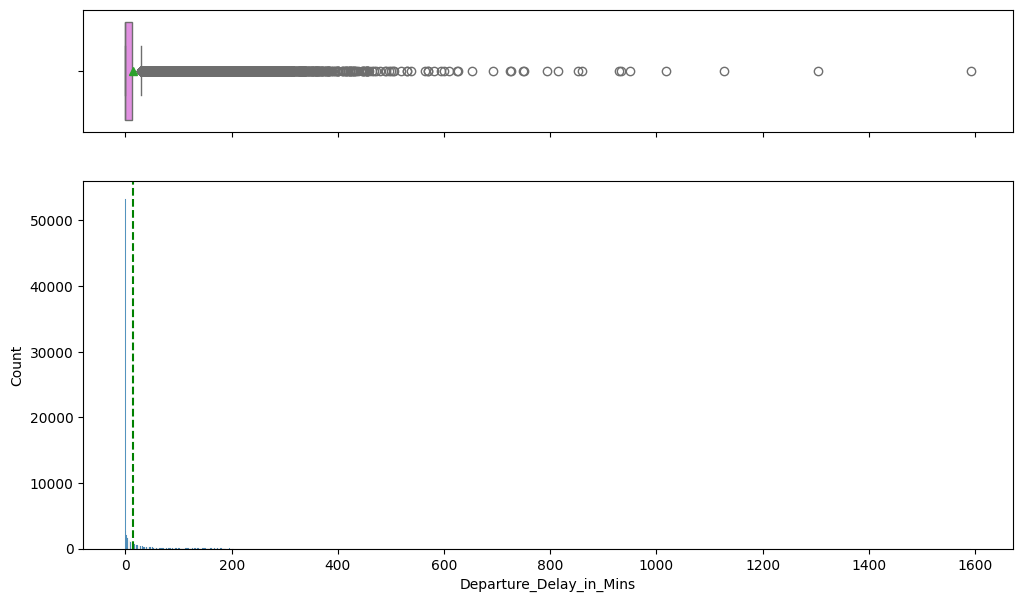

In [ ]:
histogram_boxplot(train, 'Departure_Delay_in_Mins', figsize=(12, 7), kde=False, bins = None, median = False)

In [ ]:
#Studying the outliers in Departure_delay
dep_delay = train.loc[train['Departure_Delay_in_Mins'] > 600].sort_values(by = 'Departure_Delay_in_Mins', ascending = False)
dep_delay

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
12755  98812756  Female  Loyal Customer  47.0              NaN          Eco   
40837  98840838    Male  Loyal Customer  32.0              NaN     Business   
22845  98822846     NaN             NaN   8.0  Personal Travel          Eco   
62544  98862545    Male  Loyal Customer  49.0  Business Travel     Business   
44159  98844160  Female  Loyal Customer  39.0  Business Travel     Business   
30723  98830724    Male  Loyal Customer  47.0  Business Travel     Business   
26855  98826856  Female  Loyal Customer  53.0  Business Travel     Business   
55955  98855956    Male             NaN  27.0  Business Travel     Business   
37662  98837663    Male             NaN  15.0  Business Travel     Business   
27510  98827511  Female  Loyal Customer  42.0  Business Travel     Business   
81053  98881054  Female  Loyal Customer  45.0  Personal Travel          Eco   
75910  98875911    Male             NaN  23.0  Business Travel          Eco   
65872  98865873  Female  Loyal Customer  30.0  Business Travel     Business   
6952   98806953    Male  Loyal Customer  33.0  Personal Travel          Eco   
63313  98863314  Female  Loyal Customer   7.0  Personal Travel          Eco   
93337  98893338  Female  Loyal Customer  42.0  Personal Travel     Business   
40077  98840078  Female             NaN  39.0  Business Travel          Eco   
91267  98891268    Male  Loyal Customer  48.0              NaN          Eco   
7650   98807651  Female  Loyal Customer  43.0  Business Travel     Business   
94324  98894325    Male             NaN  35.0  Business Travel     Business   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
12755             3113                   1592.0                 1584.0   
40837             4425                   1305.0                 1280.0   
22845             3017                   1128.0                 1115.0   
62544             3792                   1017.0                 1011.0   
44159             3549                    951.0                  940.0   
30723             3835                    933.0                  920.0   
26855             4198                    930.0                  952.0   
55955             3623                    859.0                  860.0   
37662             5865                    853.0                  823.0   
27510             2668                    815.0                  822.0   
81053             2460                    794.0                  795.0   
75910             2563                    750.0                  729.0   
65872             4124                    748.0                  720.0   
6952              2832                    726.0                  691.0   
63313             1990                    724.0                  705.0   
93337             2256                    692.0                  702.0   
40077             2431                    652.0                  638.0   
91267             4318                    626.0                  604.0   
7650              3882                    624.0                  615.0   
94324             2592                    610.0                  593.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
12755                   0           2.0   Ordinary                      2.0   
40837                   1           2.0  Green Car                      2.0   
22845                   0           2.0   Ordinary                      5.0   
62544                   1           1.0  Green Car                      1.0   
44159                   0           1.0   Ordinary                      4.0   
30723                   1           4.0   Ordinary                      5.0   
26855                   0           3.0   Ordinary                      4.0   
55955                   1           1.0   Ordinary                      1.0   
37662                   0           2.0  Green Car                      2.0   
27510   

In [ ]:
len(dep_delay)

20

In [ ]:
train['Departure_Delay_in_Mins'].isnull().sum()

57

Observations:
1. It can be seen that many of the delays are very short and congregate within 10 minutes.
2. However, there are a number of incidences where there is a delay of 1600 minutes, which is very long and considered an outlier.
3. Only 20 trips had a delay of more than 10 hours, perhaps this can be a cutoff point to declare outliers since it does not happen as often?
4. 57 Missing values


###Arrival Delay in Mins

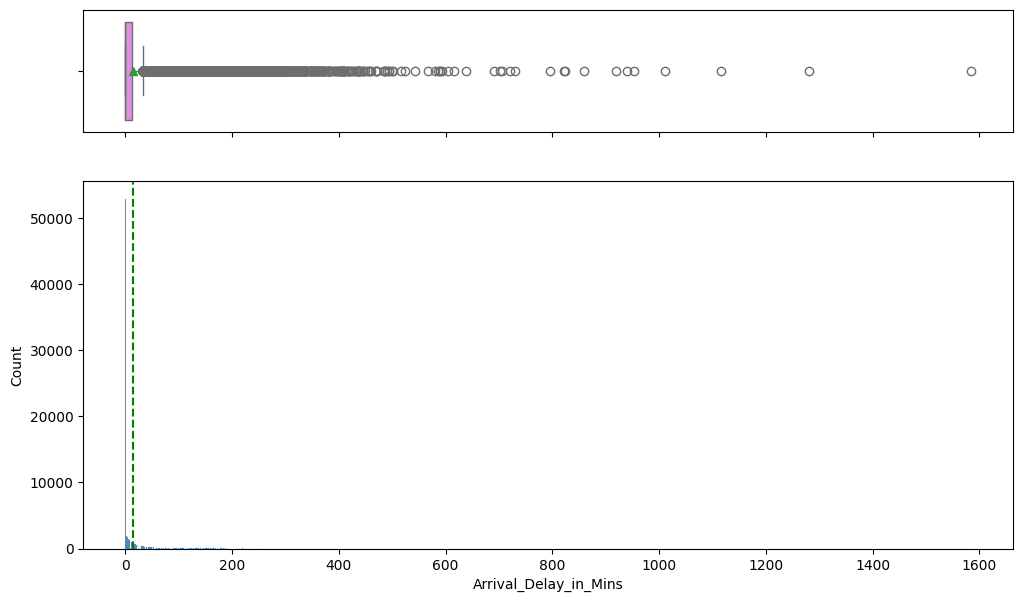

In [ ]:
histogram_boxplot(train, 'Arrival_Delay_in_Mins', figsize=(12, 7), kde=False, bins = None, median = False)

In [ ]:
arr_delay = train.loc[train['Arrival_Delay_in_Mins'] > 600].sort_values(by = 'Arrival_Delay_in_Mins', ascending = False)
arr_delay

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
12755  98812756  Female  Loyal Customer  47.0              NaN          Eco   
40837  98840838    Male  Loyal Customer  32.0              NaN     Business   
22845  98822846     NaN             NaN   8.0  Personal Travel          Eco   
62544  98862545    Male  Loyal Customer  49.0  Business Travel     Business   
26855  98826856  Female  Loyal Customer  53.0  Business Travel     Business   
44159  98844160  Female  Loyal Customer  39.0  Business Travel     Business   
30723  98830724    Male  Loyal Customer  47.0  Business Travel     Business   
55955  98855956    Male             NaN  27.0  Business Travel     Business   
37662  98837663    Male             NaN  15.0  Business Travel     Business   
27510  98827511  Female  Loyal Customer  42.0  Business Travel     Business   
81053  98881054  Female  Loyal Customer  45.0  Personal Travel          Eco   
75910  98875911    Male             NaN  23.0  Business Travel          Eco   
65872  98865873  Female  Loyal Customer  30.0  Business Travel     Business   
63313  98863314  Female  Loyal Customer   7.0  Personal Travel          Eco   
93337  98893338  Female  Loyal Customer  42.0  Personal Travel     Business   
6952   98806953    Male  Loyal Customer  33.0  Personal Travel          Eco   
40077  98840078  Female             NaN  39.0  Business Travel          Eco   
7650   98807651  Female  Loyal Customer  43.0  Business Travel     Business   
91267  98891268    Male  Loyal Customer  48.0              NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
12755             3113                   1592.0                 1584.0   
40837             4425                   1305.0                 1280.0   
22845             3017                   1128.0                 1115.0   
62544             3792                   1017.0                 1011.0   
26855             4198                    930.0                  952.0   
44159             3549                    951.0                  940.0   
30723             3835                    933.0                  920.0   
55955             3623                    859.0                  860.0   
37662             5865                    853.0                  823.0   
27510             2668                    815.0                  822.0   
81053             2460                    794.0                  795.0   
75910             2563                    750.0                  729.0   
65872             4124                    748.0                  720.0   
63313             1990                    724.0                  705.0   
93337             2256                    692.0                  702.0   
6952              2832                    726.0                  691.0   
40077             2431                    652.0                  638.0   
7650              3882                    624.0                  615.0   
91267             4318                    626.0                  604.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
12755                   0           2.0   Ordinary                      2.0   
40837                   1           2.0  Green Car                      2.0   
22845                   0           2.0   Ordinary                      5.0   
62544                   1           1.0  Green Car                      1.0   
26855                   0           3.0   Ordinary                      4.0   
44159                   0           1.0   Ordinary                      4.0   
30723                   1           4.0   Ordinary                      5.0   
55955                   1           1.0   Ordinary                      1.0   
37662                   0           2.0  Green Car                      2.0   
27510                   0           2.0  Green Car                      NaN   
81053                   0           1.0  Green Car                      4.0   
759

In [ ]:
len(arr_delay)

19

In [ ]:
train['Arrival_Delay_in_Mins'].isnull().sum()

357

Observations:
1. The distribution of data is very similar to departure delays, with many arrival delays approximately 10 minutes
2. There are 19 trips which had a delay of more than 10 hours.
3. 357 missing data, way more than the number of departure delays.


###Categorical Variables

###Gender

<Axes: xlabel='Gender', ylabel='count'>

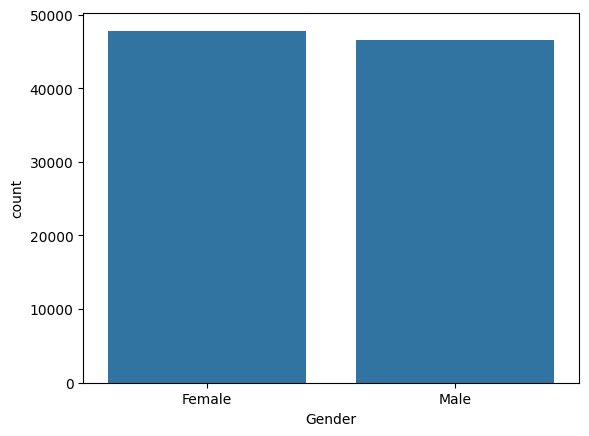

In [ ]:
sns.countplot(data=train,x='Gender')

In [ ]:
train['Gender'].isnull().sum()

77

Observations:
1. Women and men are equally distributed in the dataset, 50,7% of the passenger are female and 49.3% are men.
2. We know the gender of 91.9% of the passengers, only 77 values are missing for this feature.

###Travel Class

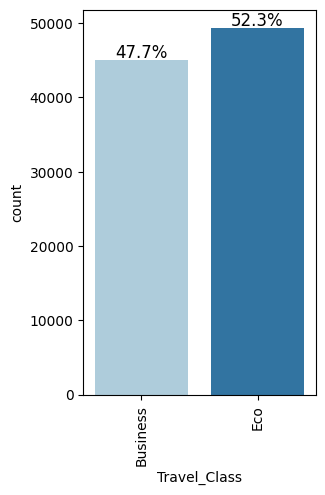

Number of null values:  0


In [ ]:
labeled_countplot(train,'Travel_Class', perc = True,order = False)

Observations:
- More Eco than business travels, which makes sense
- No null values

###Platform Location

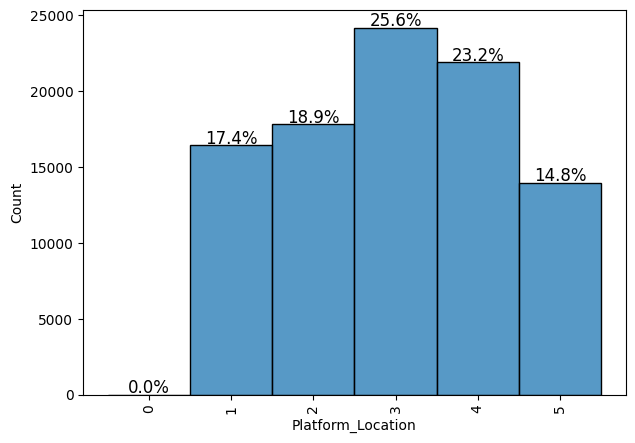

Number of null values:  30


In [ ]:
labeled_countplot(train,'Platform_Location', perc = True, order = True)

In [ ]:
#During the earlier phases, we caught that there are 2 passengers who gave a 'very inconvenient' rating
train['Platform_Location'].value_counts()

3.0    24173
4.0    21912
2.0    17832
1.0    16449
5.0    13981
0.0        2
Name: Platform_Location, dtype: int64

In [ ]:
#understanding who are the 2 passengers who rated very inconvenient
train.loc[train['Platform_Location'] == 0]

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
49219  98849220  Female  Loyal Customer  40.0  Personal Travel          Eco   
79337  98879338  Female  Loyal Customer  55.0  Business Travel     Business   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
49219             1968                      0.0                    0.0   
79337             2063                      0.0                    0.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
49219                   1           1.0   Ordinary                      0.0   
79337                   1           1.0  Green Car                      0.0   

       Catering  Platform_Location  Onboard_Wifi_Service  \
49219       5.0                0.0                   4.0   
79337       5.0                0.0                   4.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
49219                    4.0             4.0                     1.0   
79337                    4.0             4.0                     1.0   

       Onboard_Service  Legroom  Baggage_Handling  CheckIn_Service  \
49219              1.0      1.0               1.0              3.0   
79337              1.0      1.0               1.0              3.0   

       Cleanliness  Online_Boarding  
49219          1.0              4.0  
79337          1.0              4.0

In [ ]:
#Taking a look at the missing values
missing_pl = train.loc[train['Platform_Location'].isnull() == True]
missing_pl

ID  Gender      Customer_Type   Age      Type_Travel  \
2215   98802216    Male     Loyal Customer  16.0  Personal Travel   
4477   98804478  Female     Loyal Customer  69.0  Personal Travel   
6694   98806695  Female     Loyal Customer  35.0  Business Travel   
8775   98808776  Female     Loyal Customer  25.0  Business Travel   
14620  98814621    Male     Loyal Customer  58.0              NaN   
15271  98815272  Female     Loyal Customer  13.0              NaN   
17607  98817608    Male  Disloyal Customer  37.0  Business Travel   
22867  98822868  Female     Loyal Customer  47.0  Personal Travel   
29893  98829894    Male     Loyal Customer  47.0  Business Travel   
32086  98832087    Male     Loyal Customer  39.0  Business Travel   
35373  98835374    Male     Loyal Customer  47.0  Business Travel   
37897  98837898  Female  Disloyal Customer  39.0  Business Travel   
41688  98841689    Male     Loyal Customer  52.0  Business Travel   
45382  98845383    Male                NaN  27.0  Business Travel   
47006  98847007  Female  Disloyal Customer  25.0  Business Travel   
53010  98853011  Female     Loyal Customer  67.0  Personal Travel   
53500  98853501    Male     Loyal Customer  47.0  Business Travel   
56497  98856498  Female     Loyal Customer  43.0  Business Travel   
59270  98859271    Male     Loyal Customer  22.0  Personal Travel   
59964  98859965    Male  Disloyal Customer  23.0  Business Travel   
62201  98862202  Female                NaN  26.0  Business Travel   
62699  98862700    Male     Loyal Customer  49.0  Business Travel   
66959  98866960    Male  Disloyal Customer  22.0  Business Travel   
69915  98869916    Male     Loyal Customer  46.0  Business Travel   
70266  98870267  Female     Loyal Customer  66.0  Business Travel   
76005  98876006    Male     Loyal Customer  68.0  Personal Travel   
84335  98884336    Male  Disloyal Customer  36.0  Business Travel   
85184  98885185  Female     Loyal Customer  48.0  Personal Travel   
89394  98889395  Female     Loyal Customer  49.0  Personal Travel   
91055  98891056    Male     Loyal Customer  42.0  Business Travel   

      Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
2215           Eco             2977                      0.0   
4477           Eco              881                      4.0   
6694      Business             2748                      0.0   
8775      Business             2815                      0.0   
14620     Business             1575                      0.0   
15271          Eco             3151                      0.0   
17607     Business             2007                      4.0   
22867          Eco              406                      0.0   
29893     Business             3095                      0.0   
32086     Business              302                     87.0   
35373     Business              738                     13.0   
37897     Business             1530                      0.0   
41688     Business             3535                      0.0   
45382     Business             3096                      0.0   
47006          Eco             1098                      0.0   
53010          Eco             1140                     50.0   
53500     Business             1990                      0.0   
56497          Eco              701                      0.0   
59270          Eco             2220                     39.0   
59964          Eco             2013                      0.0   
62201          Eco             2074                      2.0   
62699     Business              960                      0.0   
66959          Eco             1418                     14.0   
69915     Business              366                      8.0   
70266     Business             3207                      0.0   
76005          Eco             2246                      3.0   
84335          Eco             1595                      8.0   
85184     Business             2926                      0.0   
89394          Ec

Observations:
1.	People are generally satisfied with platform location, majority of the people find the platform location manageable and above.
2.	There are only 2 people who found the platform location very inconvenient. But these 2 people were satisfied with the overall experience anyways
3.	Whenever the platform location values are missing, the onboard wifi service value will be missing too
4.	This could be explained that the location of the shinkansen station is at a low developed region with poor connectivity. As such, the location of the station is harder to locate and access.
5.	As there is only 30 data that are missing from platform location, it is safe to replace these missing values as the average values



###Seat Class

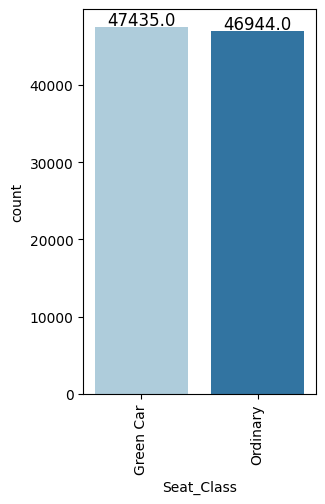

Number of null values:  0


In [ ]:
labeled_countplot(train,'Seat_Class', perc = False,order = False)

Observations:
1.	There are slightly more green cars than ordinary class seats.
2.	There are also no missing values for seat class
3.	Since seat class is closely related to legroom and seat_comfort, we can see if they have similar distribution and combine the features together

###Seat Comfort

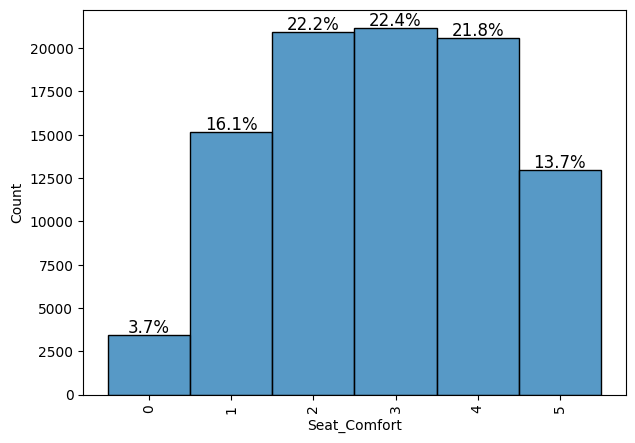

Number of null values:  61


In [ ]:
labeled_countplot(train,'Seat_Comfort', perc = True, order = True)

In [ ]:
train.loc[train['Seat_Comfort'].isnull() == True]

ID  Gender      Customer_Type   Age      Type_Travel  \
560    98800561    Male     Loyal Customer  30.0  Business Travel   
2214   98802215    Male     Loyal Customer  30.0              NaN   
4754   98804755    Male     Loyal Customer  63.0  Personal Travel   
5191   98805192    Male                NaN  33.0  Business Travel   
8809   98808810  Female     Loyal Customer  12.0  Personal Travel   
8851   98808852  Female  Disloyal Customer  24.0  Business Travel   
8936   98808937  Female     Loyal Customer  56.0  Business Travel   
9472   98809473  Female     Loyal Customer  36.0  Business Travel   
10830  98810831  Female     Loyal Customer  34.0  Personal Travel   
12651  98812652  Female  Disloyal Customer  44.0  Business Travel   
17855  98817856  Female     Loyal Customer  56.0  Personal Travel   
18241  98818242  Female     Loyal Customer  15.0  Personal Travel   
19627  98819628    Male                NaN  53.0  Business Travel   
19672  98819673    Male     Loyal Customer  28.0  Personal Travel   
20501  98820502  Female     Loyal Customer  60.0  Personal Travel   
20661  98820662  Female  Disloyal Customer  22.0  Business Travel   
20788  98820789    Male  Disloyal Customer  43.0  Business Travel   
23098  98823099  Female     Loyal Customer  52.0  Business Travel   
28858  98828859    Male  Disloyal Customer  26.0  Business Travel   
29912  98829913    Male     Loyal Customer  45.0  Business Travel   
30286  98830287    Male  Disloyal Customer  49.0              NaN   
30359  98830360  Female                NaN  40.0  Business Travel   
30843  98830844  Female     Loyal Customer  23.0  Personal Travel   
31493  98831494    Male  Disloyal Customer  39.0              NaN   
31687  98831688  Female  Disloyal Customer  43.0  Business Travel   
33114  98833115    Male  Disloyal Customer  30.0  Business Travel   
35218  98835219  Female     Loyal Customer  38.0  Personal Travel   
35691  98835692    Male     Loyal Customer  38.0  Business Travel   
36254  98836255    Male  Disloyal Customer  32.0  Business Travel   
48013  98848014  Female     Loyal Customer  38.0              NaN   
48366  98848367  Female                NaN  19.0  Business Travel   
50444  98850445  Female     Loyal Customer  33.0  Business Travel   
50968  98850969    Male     Loyal Customer  47.0  Personal Travel   
53260  98853261    Male     Loyal Customer  59.0  Business Travel   
53810  98853811  Female     Loyal Customer  49.0  Business Travel   
57914  98857915  Female     Loyal Customer  26.0  Business Travel   
60361  98860362    Male     Loyal Customer  55.0  Business Travel   
62074  98862075  Female     Loyal Customer  48.0  Personal Travel   
63042  98863043  Female     Loyal Customer  53.0  Business Travel   
67823  98867824  Female     Loyal Customer  49.0  Business Travel   
69351  98869352    Male     Loyal Customer  55.0  Business Travel   
70455  98870456  Female     Loyal Customer  39.0  Business Travel   
70589  98870590  Female     Loyal Customer  27.0  Personal Travel   
71072  98871073  Female     Loyal Customer  13.0  Personal Travel   
71383  98871384  Female     Loyal Customer  42.0  Business Travel   
73251  98873252    Male     Loyal Customer  47.0  Business Travel   
73867  98873868  Female  Disloyal Customer  40.0  Business Travel   
74588  98874589    Male  Disloyal Customer  24.0  Business Travel   
77480  98877481  Female     Loyal Customer  25.0              NaN   
81399  98881400  Female     Loyal Customer   9.0  Business Travel   
81504  98881505  Female     Loyal Customer  47.0  Personal Travel   
81660  98881661    Male  Disloyal Customer  55.0  Business Travel   
81876  98881877  Female     Loyal Customer  33.0  Business Travel   
84239  98884240    Male     Loyal Customer  60.0              NaN   
84551  98884552    Male     Loyal Customer  60.0  Business Travel   
85713  98885714  Female  Disloyal Customer  26.0  Business Travel   
86883  98886884    Male     Loyal Customer  13.0  Personal Travel   
87693  9888

Observations:
1.	Quite normal distribution
2.	61 null values, 0.06 percent of data is missing.
3.  No observable pattern in the data with missing values, we can substitute the missing values with the mode value which is ‘Acceptable’



###Onboard Wifi Service

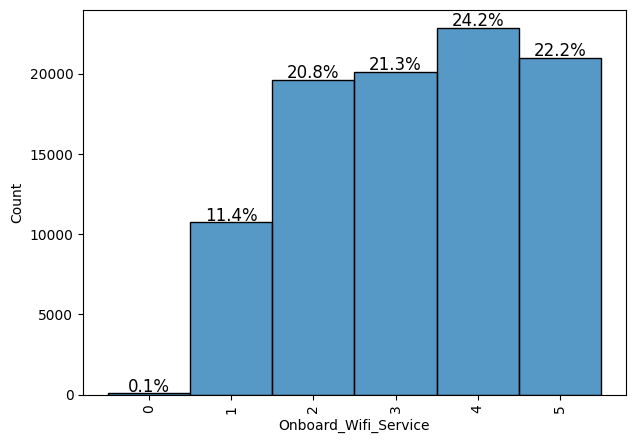

Number of null values:  30


In [ ]:
labeled_countplot(train,'Onboard_Wifi_Service', perc = True, order = True)

Observations:
1.	Data is skewed with more people satisfied with onboard wifi services.
2.	We have also confirmed earlier that when onboard wifi services have null values, the platform location will have null values.
3.	This could be explained that the location of the shinkansen station is at a low developed region with poor connectivity. As such, the location of the station is harder to locate and access.
4.	Substitute null values with lowest value, which is “extremely poor”


###Onboard Entertainment

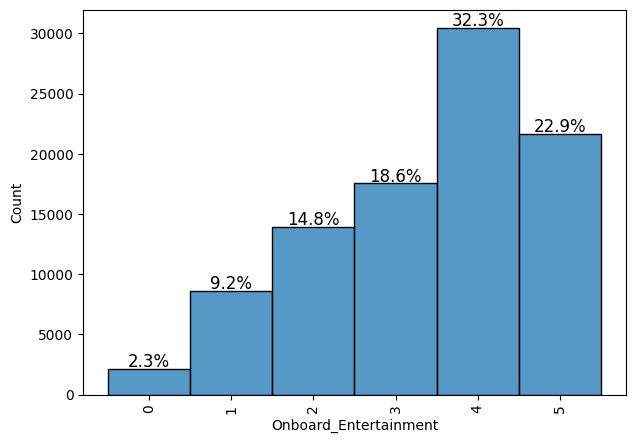

Number of null values:  18


In [ ]:
labeled_countplot(train,'Onboard_Entertainment', perc = True, order = True)

In [ ]:
train.loc[train['Onboard_Entertainment'].isnull() == True]

ID  Gender      Customer_Type   Age      Type_Travel  \
2215   98802216    Male     Loyal Customer  16.0  Personal Travel   
4477   98804478  Female     Loyal Customer  69.0  Personal Travel   
8775   98808776  Female     Loyal Customer  25.0  Business Travel   
17607  98817608    Male  Disloyal Customer  37.0  Business Travel   
22867  98822868  Female     Loyal Customer  47.0  Personal Travel   
35373  98835374    Male     Loyal Customer  47.0  Business Travel   
41688  98841689    Male     Loyal Customer  52.0  Business Travel   
47006  98847007  Female  Disloyal Customer  25.0  Business Travel   
53010  98853011  Female     Loyal Customer  67.0  Personal Travel   
53500  98853501    Male     Loyal Customer  47.0  Business Travel   
59270  98859271    Male     Loyal Customer  22.0  Personal Travel   
62201  98862202  Female                NaN  26.0  Business Travel   
69915  98869916    Male     Loyal Customer  46.0  Business Travel   
70266  98870267  Female     Loyal Customer  66.0  Business Travel   
76005  98876006    Male     Loyal Customer  68.0  Personal Travel   
85184  98885185  Female     Loyal Customer  48.0  Personal Travel   
89394  98889395  Female     Loyal Customer  49.0  Personal Travel   
91055  98891056    Male     Loyal Customer  42.0  Business Travel   

      Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
2215           Eco             2977                      0.0   
4477           Eco              881                      4.0   
8775      Business             2815                      0.0   
17607     Business             2007                      4.0   
22867          Eco              406                      0.0   
35373     Business              738                     13.0   
41688     Business             3535                      0.0   
47006          Eco             1098                      0.0   
53010          Eco             1140                     50.0   
53500     Business             1990                      0.0   
59270          Eco             2220                     39.0   
62201          Eco             2074                      2.0   
69915     Business              366                      8.0   
70266     Business             3207                      0.0   
76005          Eco             2246                      3.0   
85184     Business             2926                      0.0   
89394          Eco              210                      0.0   
91055          Eco             2272                      0.0   

       Arrival_Delay_in_Mins  Overall_Experience  Seat_Comfort Seat_Class  \
2215                     0.0                   0           2.0  Green Car   
4477                    18.0                   0           3.0  Green Car   
8775                     0.0                   1           5.0   Ordinary   
17607                   16.0                   0           1.0   Ordinary   
22867                    0.0                   1           3.0   Ordinary   
35373                    1.0                   1           3.0  Green Car   
41688                    0.0                   0           3.0  Green Car   
47006                    0.0                   0           1.0   Ordinary   
53010                   46.0                   1           4.0   Ordinary   
53500                    3.0                   1           5.0  Green Car   
59270                   41.0                   0           3.0   Ordinary   
62201                    0.0                   1           0.0   Ordinary   
69915                    0.0                   1           4.0   Ordinary   
70266                    0.0                   1           0.0  Green Car   
76005                    0.0                   0           2.0  Green Car   
85184                    0.0                   1           5.0  Green Car   
89394                    0.0                   1           4.0   Ordinary   
91055                    0.0                   0           2.0  Green Car   

       Arrival_Time_

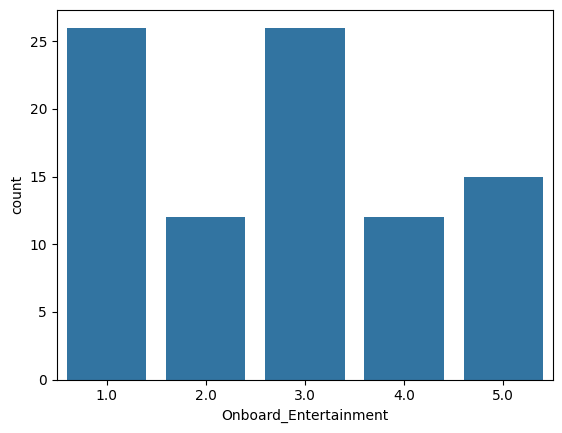

In [ ]:
#Studying the distribution of rating when wifi service is extremely poor
badwifi = train.loc[train['Onboard_Wifi_Service'] == 0]
sns.countplot(badwifi, x = 'Onboard_Entertainment');

Observations:
1.	The median rating is “Good”
2.	More people are satisfied with the onboard entertainment
3.	There are 18 null values
4.	It is found that whenever onboard entertainment is null, the onboard wifi service is null too. This is indicative of the wifi availability affecting the onboard entertainment.
5.	It can be seen that there are more “acceptable” and “poor” ratings when the wifi service is rated poor.
6.	The null values can be substituted with “Acceptable” as it is the more common rating of the two.


###Online Support

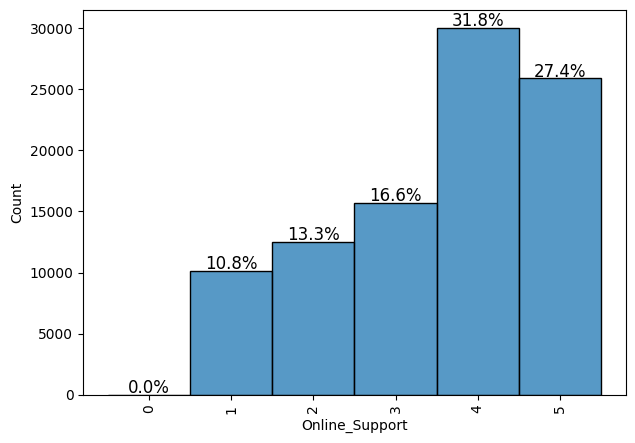

Number of null values:  91


In [ ]:
labeled_countplot(train,'Online_Support', perc = True, order = True)

In [ ]:
missing_os = train.loc[train['Online_Support'].isnull() == True]
missing_os

ID  Gender      Customer_Type   Age      Type_Travel  \
13     98800014  Female     Loyal Customer  47.0  Personal Travel   
1708   98801709    Male     Loyal Customer  15.0  Personal Travel   
2215   98802216    Male     Loyal Customer  16.0  Personal Travel   
2821   98802822    Male     Loyal Customer  30.0              NaN   
3171   98803172  Female     Loyal Customer  50.0  Business Travel   
3249   98803250    Male     Loyal Customer  43.0  Business Travel   
4477   98804478  Female     Loyal Customer  69.0  Personal Travel   
5912   98805913    Male                NaN  60.0  Business Travel   
8775   98808776  Female     Loyal Customer  25.0  Business Travel   
8904   98808905    Male     Loyal Customer  57.0  Business Travel   
10656  98810657    Male     Loyal Customer  10.0  Personal Travel   
12755  98812756  Female     Loyal Customer  47.0              NaN   
15119  98815120  Female     Loyal Customer  53.0              NaN   
16347  98816348    Male  Disloyal Customer  43.0  Business Travel   
17364  98817365  Female     Loyal Customer  63.0  Personal Travel   
17607  98817608    Male  Disloyal Customer  37.0  Business Travel   
22723  98822724    Male     Loyal Customer  44.0  Business Travel   
22867  98822868  Female     Loyal Customer  47.0  Personal Travel   
24017  98824018    Male     Loyal Customer  28.0  Business Travel   
24928  98824929    Male     Loyal Customer  55.0              NaN   
26664  98826665    Male     Loyal Customer  43.0  Business Travel   
27784  98827785  Female  Disloyal Customer  25.0  Business Travel   
28146  98828147  Female     Loyal Customer  37.0  Personal Travel   
30082  98830083  Female  Disloyal Customer  24.0  Business Travel   
30426  98830427  Female     Loyal Customer  52.0  Business Travel   
32913  98832914  Female     Loyal Customer  53.0  Business Travel   
33809  98833810    Male     Loyal Customer  47.0              NaN   
34365  98834366  Female     Loyal Customer  27.0  Personal Travel   
35112  98835113  Female     Loyal Customer  37.0  Personal Travel   
35214  98835215    Male     Loyal Customer  44.0  Business Travel   
35373  98835374    Male     Loyal Customer  47.0  Business Travel   
35928  98835929  Female  Disloyal Customer  21.0  Business Travel   
37552  98837553  Female     Loyal Customer  51.0  Business Travel   
38172  98838173  Female     Loyal Customer  53.0  Business Travel   
38728  98838729  Female                NaN  36.0  Business Travel   
39711  98839712    Male     Loyal Customer  43.0  Business Travel   
40893  98840894  Female  Disloyal Customer  27.0  Business Travel   
41688  98841689    Male     Loyal Customer  52.0  Business Travel   
43644  98843645  Female     Loyal Customer  25.0  Personal Travel   
43836  98843837  Female     Loyal Customer  13.0  Personal Travel   
44050  98844051    Male     Loyal Customer  19.0  Personal Travel   
45055  98845056  Female     Loyal Customer  30.0              NaN   
46703  98846704  Female  Disloyal Customer  24.0              NaN   
47006  98847007  Female  Disloyal Customer  25.0  Business Travel   
47952  98847953  Female  Disloyal Customer  50.0  Business Travel   
50305  98850306    Male     Loyal Customer  23.0  Personal Travel   
50701  98850702    Male     Loyal Customer  63.0  Personal Travel   
51384  98851385  Female     Loyal Customer  51.0  Business Travel   
51963  98851964    Male     Loyal Customer  55.0  Business Travel   
53010  98853011  Female     Loyal Customer  67.0  Personal Travel   
53370  98853371    Male     Loyal Customer  40.0  Personal Travel   
53500  98853501    Male     Loyal Customer  47.0  Business Travel   
57283  98857284  Female     Loyal Customer  41.0  Business Travel   
58878  98858879  Female     Loyal Customer  52.0  Personal Travel   
58982  98858983    Male  Disloyal Customer   7.0  Business Travel   
59270  98859271    Male     Loyal Customer  22.0  Personal Travel   
59864  98859865    Male     Loyal Customer  17.0  Business Travel   
59980  9885

###Ease of Online Booking

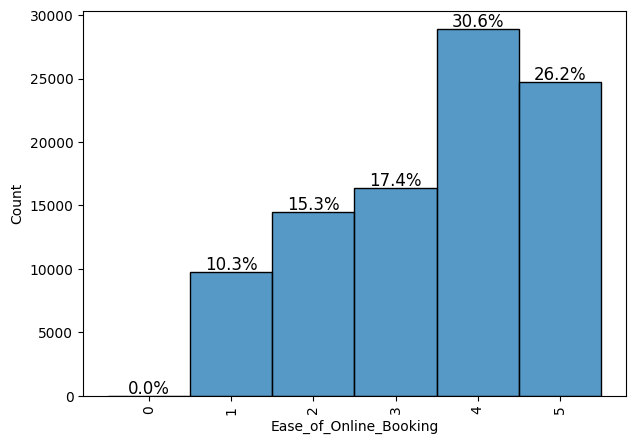

Number of null values:  73


In [ ]:
labeled_countplot(train,'Ease_of_Online_Booking', perc = True, order = True)

In [ ]:
train.loc[train['Ease_of_Online_Booking'].isnull() == True]

ID  Gender      Customer_Type   Age      Type_Travel  \
13     98800014  Female     Loyal Customer  47.0  Personal Travel   
1708   98801709    Male     Loyal Customer  15.0  Personal Travel   
2821   98802822    Male     Loyal Customer  30.0              NaN   
3171   98803172  Female     Loyal Customer  50.0  Business Travel   
3249   98803250    Male     Loyal Customer  43.0  Business Travel   
5912   98805913    Male                NaN  60.0  Business Travel   
8904   98808905    Male     Loyal Customer  57.0  Business Travel   
10656  98810657    Male     Loyal Customer  10.0  Personal Travel   
12755  98812756  Female     Loyal Customer  47.0              NaN   
15119  98815120  Female     Loyal Customer  53.0              NaN   
16347  98816348    Male  Disloyal Customer  43.0  Business Travel   
17364  98817365  Female     Loyal Customer  63.0  Personal Travel   
22723  98822724    Male     Loyal Customer  44.0  Business Travel   
24017  98824018    Male     Loyal Customer  28.0  Business Travel   
24928  98824929    Male     Loyal Customer  55.0              NaN   
26664  98826665    Male     Loyal Customer  43.0  Business Travel   
27784  98827785  Female  Disloyal Customer  25.0  Business Travel   
28146  98828147  Female     Loyal Customer  37.0  Personal Travel   
30082  98830083  Female  Disloyal Customer  24.0  Business Travel   
30426  98830427  Female     Loyal Customer  52.0  Business Travel   
32913  98832914  Female     Loyal Customer  53.0  Business Travel   
33809  98833810    Male     Loyal Customer  47.0              NaN   
34365  98834366  Female     Loyal Customer  27.0  Personal Travel   
35112  98835113  Female     Loyal Customer  37.0  Personal Travel   
35214  98835215    Male     Loyal Customer  44.0  Business Travel   
35928  98835929  Female  Disloyal Customer  21.0  Business Travel   
37552  98837553  Female     Loyal Customer  51.0  Business Travel   
38172  98838173  Female     Loyal Customer  53.0  Business Travel   
38728  98838729  Female                NaN  36.0  Business Travel   
39711  98839712    Male     Loyal Customer  43.0  Business Travel   
40893  98840894  Female  Disloyal Customer  27.0  Business Travel   
43644  98843645  Female     Loyal Customer  25.0  Personal Travel   
43836  98843837  Female     Loyal Customer  13.0  Personal Travel   
44050  98844051    Male     Loyal Customer  19.0  Personal Travel   
45055  98845056  Female     Loyal Customer  30.0              NaN   
46703  98846704  Female  Disloyal Customer  24.0              NaN   
47952  98847953  Female  Disloyal Customer  50.0  Business Travel   
50305  98850306    Male     Loyal Customer  23.0  Personal Travel   
50701  98850702    Male     Loyal Customer  63.0  Personal Travel   
51384  98851385  Female     Loyal Customer  51.0  Business Travel   
51963  98851964    Male     Loyal Customer  55.0  Business Travel   
53370  98853371    Male     Loyal Customer  40.0  Personal Travel   
57283  98857284  Female     Loyal Customer  41.0  Business Travel   
58878  98858879  Female     Loyal Customer  52.0  Personal Travel   
58982  98858983    Male  Disloyal Customer   7.0  Business Travel   
59864  98859865    Male     Loyal Customer  17.0  Business Travel   
59980  98859981    Male                NaN  41.0  Business Travel   
61021  98861022    Male     Loyal Customer  39.0  Business Travel   
61222  98861223  Female     Loyal Customer  41.0  Business Travel   
66977  98866978  Female     Loyal Customer  53.0  Business Travel   
68315  98868316  Female  Disloyal Customer  22.0  Business Travel   
68326  98868327    Male     Loyal Customer  60.0  Business Travel   
68796  98868797  Female     Loyal Customer  54.0  Personal Travel   
70627  98870628  Female     Loyal Customer  49.0  Business Travel   
72549  98872550  Female     Loyal Customer  39.0  Business Travel   
73825  98873826    Male     Loyal Customer   8.0  Business Travel   
80131  98880132    Male     Loyal Customer  52.0  Business Travel   
81304  9888

###Legroom

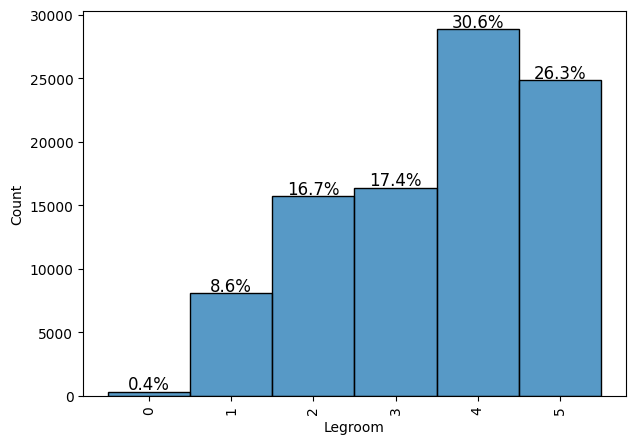

Number of null values:  90


In [ ]:
labeled_countplot(train,'Legroom', perc = True, order = True)

In [ ]:
train.loc[train['Legroom'].isnull() == True]

ID  Gender      Customer_Type   Age      Type_Travel  \
1708   98801709    Male     Loyal Customer  15.0  Personal Travel   
2214   98802215    Male     Loyal Customer  30.0              NaN   
2666   98802667  Female     Loyal Customer  39.0  Business Travel   
3171   98803172  Female     Loyal Customer  50.0  Business Travel   
4754   98804755    Male     Loyal Customer  63.0  Personal Travel   
5551   98805552  Female  Disloyal Customer  24.0  Business Travel   
7019   98807020    Male     Loyal Customer  68.0  Business Travel   
8490   98808491  Female     Loyal Customer  39.0  Business Travel   
8904   98808905    Male     Loyal Customer  57.0  Business Travel   
8936   98808937  Female     Loyal Customer  56.0  Business Travel   
10241  98810242  Female  Disloyal Customer  14.0  Personal Travel   
11079  98811080  Female     Loyal Customer  70.0  Personal Travel   
11199  98811200    Male  Disloyal Customer  24.0  Business Travel   
12758  98812759    Male     Loyal Customer  61.0  Personal Travel   
18978  98818979    Male                NaN  37.0  Business Travel   
19290  98819291    Male     Loyal Customer  47.0  Business Travel   
20440  98820441  Female                NaN  56.0  Business Travel   
20664  98820665  Female     Loyal Customer  57.0  Business Travel   
22362  98822363    Male     Loyal Customer  63.0  Personal Travel   
22723  98822724    Male     Loyal Customer  44.0  Business Travel   
26364  98826365    Male     Loyal Customer  46.0  Business Travel   
26664  98826665    Male     Loyal Customer  43.0  Business Travel   
27784  98827785  Female  Disloyal Customer  25.0  Business Travel   
28858  98828859    Male  Disloyal Customer  26.0  Business Travel   
30082  98830083  Female  Disloyal Customer  24.0  Business Travel   
30426  98830427  Female     Loyal Customer  52.0  Business Travel   
31097  98831098    Male     Loyal Customer  45.0  Business Travel   
31371  98831372  Female     Loyal Customer  21.0  Personal Travel   
33114  98833115    Male  Disloyal Customer  30.0  Business Travel   
33511  98833512  Female                NaN  37.0  Personal Travel   
34589  98834590    Male     Loyal Customer  26.0  Personal Travel   
36254  98836255    Male  Disloyal Customer  32.0  Business Travel   
38728  98838729  Female                NaN  36.0  Business Travel   
38731  98838732    Male                NaN  35.0  Business Travel   
39389  98839390  Female     Loyal Customer  39.0              NaN   
39711  98839712    Male     Loyal Customer  43.0  Business Travel   
39716  98839717  Female     Loyal Customer  47.0              NaN   
40634  98840635  Female     Loyal Customer  27.0  Personal Travel   
40659  98840660    Male                NaN  31.0  Business Travel   
41681  98841682  Female     Loyal Customer  43.0  Business Travel   
43644  98843645  Female     Loyal Customer  25.0  Personal Travel   
43715  98843716    Male  Disloyal Customer  22.0  Business Travel   
44050  98844051    Male     Loyal Customer  19.0  Personal Travel   
44190  98844191    Male     Loyal Customer  31.0              NaN   
46420  98846421  Female                NaN  11.0  Personal Travel   
46495  98846496    Male     Loyal Customer  44.0  Personal Travel   
46912  98846913    Male     Loyal Customer  47.0              NaN   
47952  98847953  Female  Disloyal Customer  50.0  Business Travel   
48013  98848014  Female     Loyal Customer  38.0              NaN   
48208  98848209    Male     Loyal Customer  55.0  Business Travel   
49077  98849078  Female  Disloyal Customer  44.0  Business Travel   
50462  98850463    Male     Loyal Customer  52.0  Business Travel   
51384  98851385  Female     Loyal Customer  51.0  Business Travel   
52133  98852134  Female     Loyal Customer  34.0  Personal Travel   
56493  98856494    Male                NaN  52.0  Business Travel   
57283  98857284  Female     Loyal Customer  41.0  Business Travel   
58502  98858503    Male     Loyal Customer  16.0  Business Travel   
59864  9885

###Baggage Handling

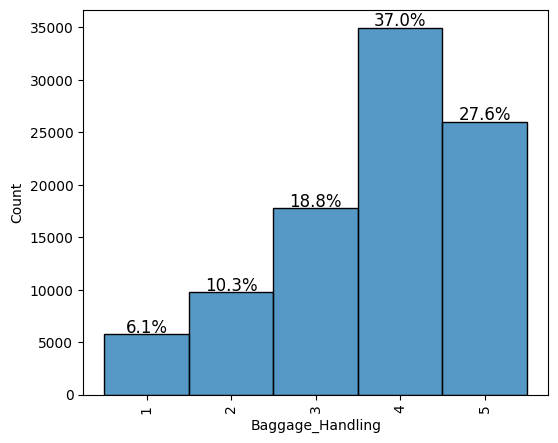

Number of null values:  142


In [ ]:
labeled_countplot(train,'Baggage_Handling', perc = True, order = True)

In [ ]:
missing_bh = train.loc[train['Baggage_Handling'].isnull() == True]
missing_bh

ID  Gender      Customer_Type   Age      Type_Travel  \
13     98800014  Female     Loyal Customer  47.0  Personal Travel   
2214   98802215    Male     Loyal Customer  30.0              NaN   
2666   98802667  Female     Loyal Customer  39.0  Business Travel   
2821   98802822    Male     Loyal Customer  30.0              NaN   
3249   98803250    Male     Loyal Customer  43.0  Business Travel   
4754   98804755    Male     Loyal Customer  63.0  Personal Travel   
5551   98805552  Female  Disloyal Customer  24.0  Business Travel   
5912   98805913    Male                NaN  60.0  Business Travel   
7019   98807020    Male     Loyal Customer  68.0  Business Travel   
8490   98808491  Female     Loyal Customer  39.0  Business Travel   
8936   98808937  Female     Loyal Customer  56.0  Business Travel   
10241  98810242  Female  Disloyal Customer  14.0  Personal Travel   
10656  98810657    Male     Loyal Customer  10.0  Personal Travel   
11079  98811080  Female     Loyal Customer  70.0  Personal Travel   
11134  98811135    Male     Loyal Customer  68.0  Personal Travel   
11199  98811200    Male  Disloyal Customer  24.0  Business Travel   
11203  98811204    Male     Loyal Customer  37.0  Business Travel   
12755  98812756  Female     Loyal Customer  47.0              NaN   
12758  98812759    Male     Loyal Customer  61.0  Personal Travel   
15119  98815120  Female     Loyal Customer  53.0              NaN   
16347  98816348    Male  Disloyal Customer  43.0  Business Travel   
17364  98817365  Female     Loyal Customer  63.0  Personal Travel   
18741  98818742    Male     Loyal Customer  25.0  Business Travel   
18978  98818979    Male                NaN  37.0  Business Travel   
19290  98819291    Male     Loyal Customer  47.0  Business Travel   
20440  98820441  Female                NaN  56.0  Business Travel   
20664  98820665  Female     Loyal Customer  57.0  Business Travel   
22362  98822363    Male     Loyal Customer  63.0  Personal Travel   
22547  98822548  Female  Disloyal Customer  50.0              NaN   
23692  98823693  Female     Loyal Customer  31.0  Business Travel   
23718  98823719    Male                NaN  65.0  Personal Travel   
24017  98824018    Male     Loyal Customer  28.0  Business Travel   
24928  98824929    Male     Loyal Customer  55.0              NaN   
26364  98826365    Male     Loyal Customer  46.0  Business Travel   
28146  98828147  Female     Loyal Customer  37.0  Personal Travel   
28858  98828859    Male  Disloyal Customer  26.0  Business Travel   
30709  98830710  Female     Loyal Customer  65.0  Personal Travel   
31097  98831098    Male     Loyal Customer  45.0  Business Travel   
31371  98831372  Female     Loyal Customer  21.0  Personal Travel   
32086  98832087    Male     Loyal Customer  39.0  Business Travel   
32913  98832914  Female     Loyal Customer  53.0  Business Travel   
33114  98833115    Male  Disloyal Customer  30.0  Business Travel   
33511  98833512  Female                NaN  37.0  Personal Travel   
33809  98833810    Male     Loyal Customer  47.0              NaN   
34067  98834068  Female     Loyal Customer  52.0              NaN   
34365  98834366  Female     Loyal Customer  27.0  Personal Travel   
34589  98834590    Male     Loyal Customer  26.0  Personal Travel   
35112  98835113  Female     Loyal Customer  37.0  Personal Travel   
35214  98835215    Male     Loyal Customer  44.0  Business Travel   
35253  98835254    Male     Loyal Customer  33.0  Personal Travel   
35928  98835929  Female  Disloyal Customer  21.0  Business Travel   
36254  98836255    Male  Disloyal Customer  32.0  Business Travel   
37552  98837553  Female     Loyal Customer  51.0  Business Travel   
38172  98838173  Female     Loyal Customer  53.0  Business Travel   
38731  98838732    Male                NaN  35.0  Business Travel   
39389  98839390  Female     Loyal Customer  39.0              NaN   
39716  98839717  Female     Loyal Customer  47.0              NaN   
40634  9884

###CheckIn Service

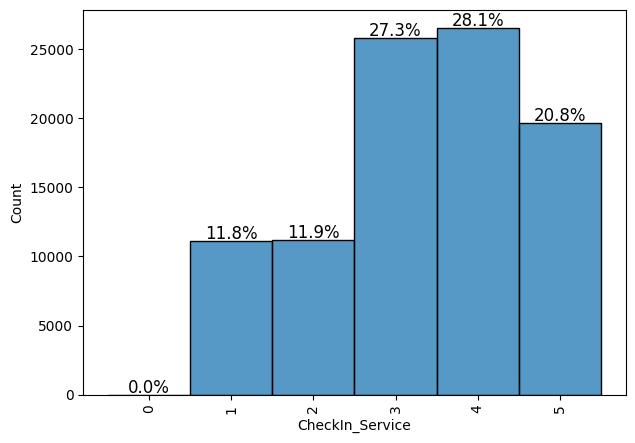

Number of null values:  77


In [ ]:
labeled_countplot(train,'CheckIn_Service', perc = True, order = True)

In [ ]:
train.loc[train['CheckIn_Service'].isnull() == True]

ID  Gender      Customer_Type   Age      Type_Travel  \
13     98800014  Female     Loyal Customer  47.0  Personal Travel   
2821   98802822    Male     Loyal Customer  30.0              NaN   
3249   98803250    Male     Loyal Customer  43.0  Business Travel   
5912   98805913    Male                NaN  60.0  Business Travel   
10656  98810657    Male     Loyal Customer  10.0  Personal Travel   
11134  98811135    Male     Loyal Customer  68.0  Personal Travel   
11203  98811204    Male     Loyal Customer  37.0  Business Travel   
12755  98812756  Female     Loyal Customer  47.0              NaN   
15119  98815120  Female     Loyal Customer  53.0              NaN   
16347  98816348    Male  Disloyal Customer  43.0  Business Travel   
17364  98817365  Female     Loyal Customer  63.0  Personal Travel   
18741  98818742    Male     Loyal Customer  25.0  Business Travel   
22547  98822548  Female  Disloyal Customer  50.0              NaN   
23692  98823693  Female     Loyal Customer  31.0  Business Travel   
23718  98823719    Male                NaN  65.0  Personal Travel   
24017  98824018    Male     Loyal Customer  28.0  Business Travel   
24928  98824929    Male     Loyal Customer  55.0              NaN   
28146  98828147  Female     Loyal Customer  37.0  Personal Travel   
30709  98830710  Female     Loyal Customer  65.0  Personal Travel   
32086  98832087    Male     Loyal Customer  39.0  Business Travel   
32913  98832914  Female     Loyal Customer  53.0  Business Travel   
33809  98833810    Male     Loyal Customer  47.0              NaN   
34067  98834068  Female     Loyal Customer  52.0              NaN   
34365  98834366  Female     Loyal Customer  27.0  Personal Travel   
35112  98835113  Female     Loyal Customer  37.0  Personal Travel   
35214  98835215    Male     Loyal Customer  44.0  Business Travel   
35253  98835254    Male     Loyal Customer  33.0  Personal Travel   
35928  98835929  Female  Disloyal Customer  21.0  Business Travel   
37552  98837553  Female     Loyal Customer  51.0  Business Travel   
38172  98838173  Female     Loyal Customer  53.0  Business Travel   
40893  98840894  Female  Disloyal Customer  27.0  Business Travel   
43836  98843837  Female     Loyal Customer  13.0  Personal Travel   
45055  98845056  Female     Loyal Customer  30.0              NaN   
46703  98846704  Female  Disloyal Customer  24.0              NaN   
47006  98847007  Female  Disloyal Customer  25.0  Business Travel   
50305  98850306    Male     Loyal Customer  23.0  Personal Travel   
50701  98850702    Male     Loyal Customer  63.0  Personal Travel   
51471  98851472    Male     Loyal Customer  73.0  Business Travel   
51963  98851964    Male     Loyal Customer  55.0  Business Travel   
52205  98852206  Female     Loyal Customer  19.0  Business Travel   
52879  98852880  Female  Disloyal Customer  25.0  Business Travel   
53370  98853371    Male     Loyal Customer  40.0  Personal Travel   
53604  98853605    Male     Loyal Customer  34.0  Business Travel   
55454  98855455    Male  Disloyal Customer  37.0  Business Travel   
57218  98857219  Female     Loyal Customer  18.0  Personal Travel   
58003  98858004  Female     Loyal Customer  25.0  Business Travel   
58878  98858879  Female     Loyal Customer  52.0  Personal Travel   
58982  98858983    Male  Disloyal Customer   7.0  Business Travel   
59121  98859122    Male     Loyal Customer  34.0  Business Travel   
61021  98861022    Male     Loyal Customer  39.0  Business Travel   
64797  98864798  Female     Loyal Customer  38.0  Business Travel   
66977  98866978  Female     Loyal Customer  53.0  Business Travel   
68315  98868316  Female  Disloyal Customer  22.0  Business Travel   
68326  98868327    Male     Loyal Customer  60.0  Business Travel   
68796  98868797  Female     Loyal Customer  54.0  Personal Travel   
69242  98869243    Male     Loyal Customer  29.0  Business Travel   
70149  98870150  Female                NaN  41.0  Business Travel   
70225  9887

###Cleanliness

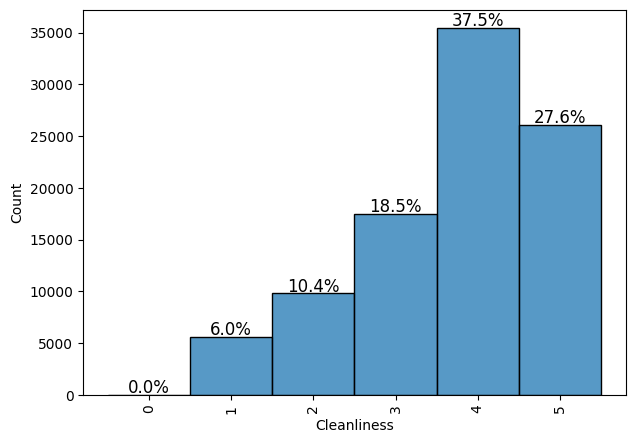

Number of null values:  6


In [ ]:
labeled_countplot(train,'Cleanliness', perc = True, order = True)

In [ ]:
train.loc[train['Cleanliness'].isnull() == True]

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
3210   98803211    Male  Loyal Customer  24.0  Personal Travel          Eco   
29045  98829046    Male  Loyal Customer  37.0  Personal Travel          Eco   
48087  98848088    Male  Loyal Customer  42.0  Personal Travel          Eco   
65681  98865682    Male  Loyal Customer  34.0  Personal Travel          Eco   
79256  98879257    Male  Loyal Customer  24.0  Personal Travel          Eco   
88733  98888734  Female  Loyal Customer  29.0  Personal Travel          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
3210              1473                     11.0                    1.0   
29045             1887                      0.0                    0.0   
48087             2311                      0.0                    0.0   
65681             1816                      0.0                    0.0   
79256             1826                      0.0                    0.0   
88733             1918                     16.0                    5.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
3210                    1           0.0  Green Car                      1.0   
29045                   1           0.0  Green Car                      1.0   
48087                   1           0.0  Green Car                      NaN   
65681                   1           0.0  Green Car                      1.0   
79256                   1           0.0   Ordinary                      NaN   
88733                   1           0.0  Green Car                      1.0   

       Catering  Platform_Location  Onboard_Wifi_Service  \
3210        0.0                3.0                   5.0   
29045       0.0                3.0                   1.0   
48087       0.0                3.0                   1.0   
65681       0.0                3.0                   4.0   
79256       0.0                3.0                   3.0   
88733       0.0                3.0                   5.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
3210                     0.0             5.0                     5.0   
29045                    0.0             1.0                     1.0   
48087                    0.0             1.0                     1.0   
65681                    0.0             4.0                     4.0   
79256                    0.0             2.0                     3.0   
88733                    0.0             5.0                     5.0   

       Onboard_Service  Legroom  Baggage_Handling  CheckIn_Service  \
3210               1.0      1.0               4.0              4.0   
29045              2.0      5.0               3.0              1.0   
48087              1.0      4.0               3.0              2.0   
65681              1.0      1.0               2.0              3.0   
79256              2.0      2.0               3.0              4.0   
88733              1.0      3.0               3.0              3.0   

       Cleanliness  Online_Boarding  
3210           NaN              NaN  
29045          NaN              NaN  
48087          NaN              NaN  
65681          NaN              NaN  
79256          NaN              NaN  
88733          NaN              NaN

###Online Boarding

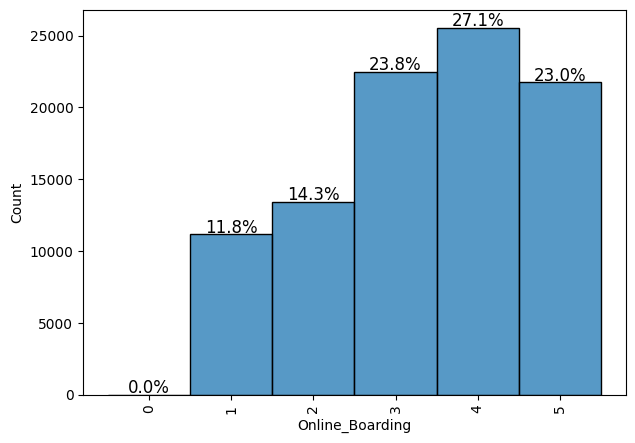

Number of null values:  6


In [ ]:
labeled_countplot(train,'Online_Boarding', perc = True, order = True)

In [ ]:
train.loc[train['Online_Boarding'].isnull() == True]

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
3210   98803211    Male  Loyal Customer  24.0  Personal Travel          Eco   
29045  98829046    Male  Loyal Customer  37.0  Personal Travel          Eco   
48087  98848088    Male  Loyal Customer  42.0  Personal Travel          Eco   
65681  98865682    Male  Loyal Customer  34.0  Personal Travel          Eco   
79256  98879257    Male  Loyal Customer  24.0  Personal Travel          Eco   
88733  98888734  Female  Loyal Customer  29.0  Personal Travel          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
3210              1473                     11.0                    1.0   
29045             1887                      0.0                    0.0   
48087             2311                      0.0                    0.0   
65681             1816                      0.0                    0.0   
79256             1826                      0.0                    0.0   
88733             1918                     16.0                    5.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
3210                    1           0.0  Green Car                      1.0   
29045                   1           0.0  Green Car                      1.0   
48087                   1           0.0  Green Car                      NaN   
65681                   1           0.0  Green Car                      1.0   
79256                   1           0.0   Ordinary                      NaN   
88733                   1           0.0  Green Car                      1.0   

       Catering  Platform_Location  Onboard_Wifi_Service  \
3210        0.0                3.0                   5.0   
29045       0.0                3.0                   1.0   
48087       0.0                3.0                   1.0   
65681       0.0                3.0                   4.0   
79256       0.0                3.0                   3.0   
88733       0.0                3.0                   5.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
3210                     0.0             5.0                     5.0   
29045                    0.0             1.0                     1.0   
48087                    0.0             1.0                     1.0   
65681                    0.0             4.0                     4.0   
79256                    0.0             2.0                     3.0   
88733                    0.0             5.0                     5.0   

       Onboard_Service  Legroom  Baggage_Handling  CheckIn_Service  \
3210               1.0      1.0               4.0              4.0   
29045              2.0      5.0               3.0              1.0   
48087              1.0      4.0               3.0              2.0   
65681              1.0      1.0               2.0              3.0   
79256              2.0      2.0               3.0              4.0   
88733              1.0      3.0               3.0              3.0   

       Cleanliness  Online_Boarding  
3210           NaN              NaN  
29045          NaN              NaN  
48087          NaN              NaN  
65681          NaN              NaN  
79256          NaN              NaN  
88733          NaN              NaN

### 10% Missing Value

###Arrival Time Convenient

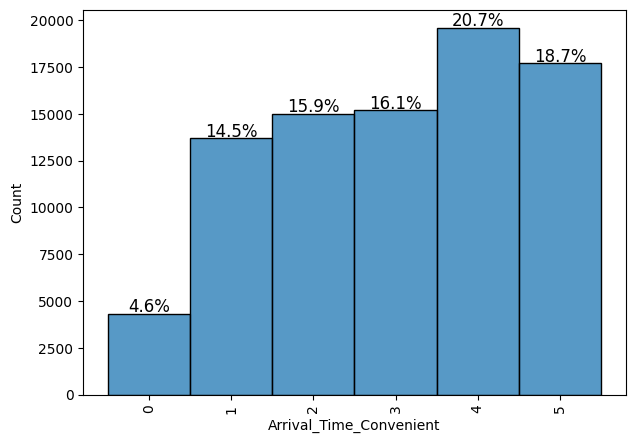

Number of null values:  8930


In [ ]:
labeled_countplot(train,'Arrival_Time_Convenient', perc = True, order = True)

In [ ]:
missing_time = train.loc[train['Arrival_Time_Convenient'].isnull() == True]
missing_time

ID  Gender      Customer_Type   Age      Type_Travel  \
7      98800008    Male     Loyal Customer  65.0  Personal Travel   
12     98800013    Male     Loyal Customer  44.0              NaN   
16     98800017  Female  Disloyal Customer   9.0  Business Travel   
29     98800030    Male     Loyal Customer  54.0  Business Travel   
33     98800034    Male  Disloyal Customer  22.0  Business Travel   
...         ...     ...                ...   ...              ...   
94318  98894319    Male  Disloyal Customer  25.0  Business Travel   
94322  98894323    Male     Loyal Customer  63.0  Personal Travel   
94329  98894330    Male  Disloyal Customer  28.0  Business Travel   
94345  98894346    Male     Loyal Customer  29.0  Business Travel   
94377  98894378    Male     Loyal Customer  16.0  Personal Travel   

      Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
7         Business              853                      0.0   
12        Business              427                      0.0   
16             Eco             2064                     14.0   
29        Business             1596                      0.0   
33        Business             2515                     42.0   
...            ...              ...                      ...   
94318          Eco             1806                     21.0   
94322          Eco             1645                     60.0   
94329          Eco             2035                      0.0   
94345     Business             3638                      1.0   
94377          Eco             2744                      0.0   

       Arrival_Delay_in_Mins  Overall_Experience  Seat_Comfort Seat_Class  \
7                        3.0                   0           3.0  Green Car   
12                       0.0                   1           3.0   Ordinary   
16                       1.0                   0           2.0   Ordinary   
29                       0.0                   1           2.0  Green Car   
33                      30.0                   1           5.0   Ordinary   
...                      ...                 ...           ...        ...   
94318                   23.0                   0           3.0   Ordinary   
94322                   58.0                   0           3.0   Ordinary   
94329                    8.0                   0           2.0  Green Car   
94345                    0.0                   0           1.0   Ordinary   
94377                    0.0                   0           2.0   Ordinary   

       Arrival_Time_Convenient  Catering  Platform_Location  \
7                          NaN       3.0                1.0   
12                         NaN       5.0                3.0   
16                         NaN       2.0                3.0   
29                         NaN       2.0                2.0   
33                         NaN       5.0                2.0   
...                        ...       ...                ...   
94318                      NaN       3.0                1.0   
94322                      NaN       0.0                1.0   
94329                      NaN       2.0                2.0   
94345                      NaN       5.0                5.0   
94377                      NaN       2.0                4.0   

       Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
7                       5.0                    5.0             4.0   
12                      2.0                    4.0             5.0   
16                      4.0                    2.0             4.0   
29                      3.0                    4.0             4.0   
33                      1.0                    5.0             1.0   
...                     ...                    ...             ...   
94318                   5.0                    3.0             4.0   
94322                   1.0                    0.0             1.0   
94329                   1.0                    2.0             1.0   
94345                   1.0      

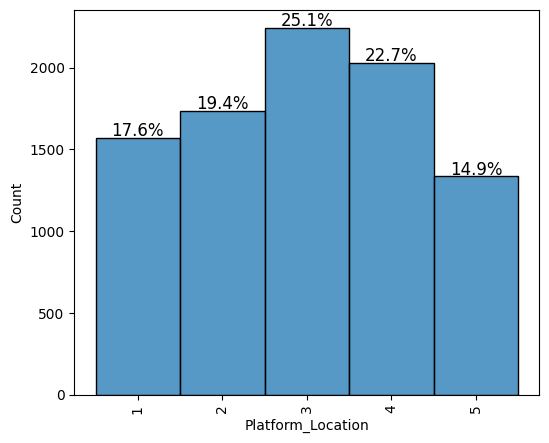

Number of null values:  19


In [ ]:
#Studying if the location of platform affects the arrival time convenient
labeled_countplot(missing_time,'Platform_Location', perc = True, order = True)

###Onboard Service

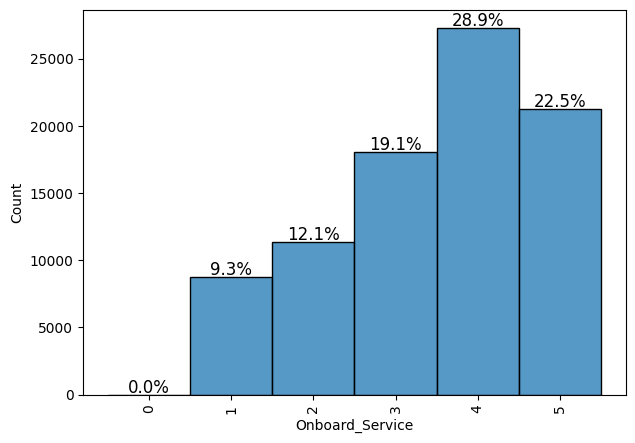

Number of null values:  7601


In [ ]:
labeled_countplot(train,'Onboard_Service', perc = True, order = True)

In [ ]:
train.loc[train['Onboard_Service'].isnull() == True]

ID  Gender      Customer_Type   Age      Type_Travel  \
30     98800031    Male     Loyal Customer   9.0              NaN   
51     98800052  Female     Loyal Customer  26.0  Business Travel   
69     98800070  Female     Loyal Customer  56.0  Personal Travel   
76     98800077  Female     Loyal Customer  42.0              NaN   
88     98800089    Male  Disloyal Customer  46.0  Personal Travel   
...         ...     ...                ...   ...              ...   
94320  98894321    Male     Loyal Customer  39.0  Personal Travel   
94330  98894331  Female     Loyal Customer  32.0  Business Travel   
94348  98894349  Female     Loyal Customer  14.0  Personal Travel   
94351  98894352  Female     Loyal Customer  56.0  Business Travel   
94358  98894359  Female     Loyal Customer  31.0  Business Travel   

      Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
30             Eco             2379                    100.0   
51        Business             4560                      0.0   
69             Eco              284                     57.0   
76             Eco              470                      2.0   
88             Eco             1708                      0.0   
...            ...              ...                      ...   
94320          Eco             2112                      0.0   
94330     Business             3058                      5.0   
94348          Eco             2727                      2.0   
94351     Business             3325                      0.0   
94358     Business             2835                      4.0   

       Arrival_Delay_in_Mins  Overall_Experience  Seat_Comfort Seat_Class  \
30                      93.0                   0           3.0  Green Car   
51                       7.0                   0           1.0   Ordinary   
69                      52.0                   1           3.0  Green Car   
76                      23.0                   1           0.0  Green Car   
88                       0.0                   0           2.0   Ordinary   
...                      ...                 ...           ...        ...   
94320                    9.0                   0           3.0  Green Car   
94330                    0.0                   1           4.0  Green Car   
94348                    2.0                   1           4.0   Ordinary   
94351                    0.0                   1           0.0  Green Car   
94358                    1.0                   1           4.0   Ordinary   

       Arrival_Time_Convenient  Catering  Platform_Location  \
30                         3.0       3.0                3.0   
51                         0.0       0.0                3.0   
69                         3.0       3.0                3.0   
76                         1.0       0.0                2.0   
88                         4.0       2.0                3.0   
...                        ...       ...                ...   
94320                      5.0       3.0                3.0   
94330                      4.0       4.0                4.0   
94348                      4.0       4.0                4.0   
94351                      0.0       0.0                2.0   
94358                      4.0       4.0                4.0   

       Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
30                      4.0                    3.0             5.0   
51                      1.0                    0.0             1.0   
69                      5.0                    5.0             4.0   
76                      3.0                    2.0             2.0   
88                      2.0                    2.0             2.0   
...                     ...                    ...             ...   
94320                   3.0                    3.0             4.0   
94330                   5.0                    4.0             5.0   
94348                   4.0                    4.0             3.0   
94351                   5.0      

###Catering

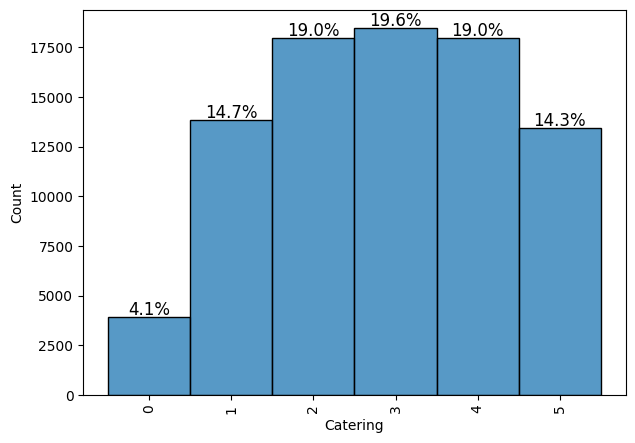

Number of null values:  8741


In [ ]:
labeled_countplot(train,'Catering', perc = True, order = True)

In [ ]:
train.loc[train['Catering'].isnull() == True]

ID  Gender      Customer_Type   Age      Type_Travel  \
3      98800004  Female     Loyal Customer  44.0  Business Travel   
31     98800032    Male     Loyal Customer  76.0  Business Travel   
40     98800041  Female  Disloyal Customer  44.0  Business Travel   
41     98800042  Female     Loyal Customer  43.0  Business Travel   
47     98800048  Female     Loyal Customer  61.0  Business Travel   
...         ...     ...                ...   ...              ...   
94327  98894328  Female  Disloyal Customer  22.0  Business Travel   
94332  98894333  Female  Disloyal Customer  22.0  Business Travel   
94335  98894336  Female     Loyal Customer  65.0  Business Travel   
94343  98894344    Male     Loyal Customer  50.0  Personal Travel   
94361  98894362  Female     Loyal Customer  41.0  Business Travel   

      Travel_Class  Travel_Distance  Departure_Delay_in_Mins  \
3         Business              780                     13.0   
31        Business              285                      0.0   
40        Business             1388                     11.0   
41        Business             1232                      0.0   
47             Eco               61                     62.0   
...            ...              ...                      ...   
94327          Eco             1808                      0.0   
94332          Eco             2105                      0.0   
94335     Business             3183                      0.0   
94343          Eco             2306                      0.0   
94361     Business             1998                      0.0   

       Arrival_Delay_in_Mins  Overall_Experience  Seat_Comfort Seat_Class  \
3                       18.0                   0           3.0   Ordinary   
31                       0.0                   1           0.0   Ordinary   
40                       0.0                   0           3.0  Green Car   
41                       0.0                   1           2.0   Ordinary   
47                      64.0                   1           5.0   Ordinary   
...                      ...                 ...           ...        ...   
94327                    0.0                   1           5.0   Ordinary   
94332                    0.0                   0           4.0   Ordinary   
94335                    0.0                   0           2.0  Green Car   
94343                    0.0                   0           2.0  Green Car   
94361                    0.0                   1           5.0   Ordinary   

       Arrival_Time_Convenient  Catering  Platform_Location  \
3                          2.0       NaN                2.0   
31                         0.0       NaN                3.0   
40                         3.0       NaN                2.0   
41                         2.0       NaN                2.0   
47                         5.0       NaN                5.0   
...                        ...       ...                ...   
94327                      5.0       NaN                2.0   
94332                      4.0       NaN                4.0   
94335                      1.0       NaN                1.0   
94343                      4.0       NaN                1.0   
94361                      5.0       NaN                5.0   

       Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
3                       3.0                    2.0             3.0   
31                      3.0                    4.0             3.0   
40                      1.0                    3.0             1.0   
41                      4.0                    5.0             4.0   
47                      2.0                    5.0             4.0   
...                     ...                    ...             ...   
94327                   1.0                    5.0             1.0   
94332                   3.0                    4.0             3.0   
94335                   2.0                    3.0             4.0   
94343                   1.0      

###Customer type


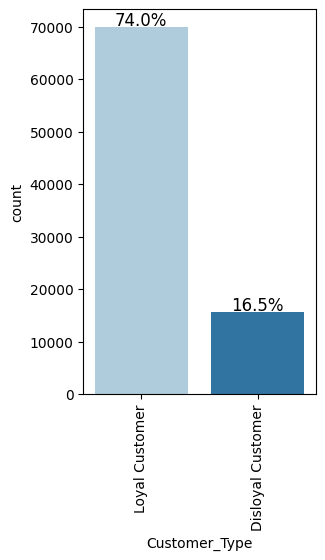

Number of null values:  8951


In [ ]:
labeled_countplot(train,'Customer_Type', perc = True, order = False)

In [ ]:
train.loc[train['Customer_Type'].isnull() == True]

ID  Gender Customer_Type   Age      Type_Travel Travel_Class  \
32     98800033    Male           NaN  30.0  Business Travel     Business   
34     98800035    Male           NaN  41.0  Business Travel     Business   
38     98800039    Male           NaN  46.0  Personal Travel          Eco   
49     98800050  Female           NaN  25.0  Business Travel     Business   
56     98800057  Female           NaN  39.0  Business Travel     Business   
...         ...     ...           ...   ...              ...          ...   
94337  98894338  Female           NaN  31.0  Business Travel     Business   
94340  98894341  Female           NaN  34.0  Personal Travel          Eco   
94342  98894343  Female           NaN  37.0  Business Travel     Business   
94344  98894345  Female           NaN  49.0  Business Travel     Business   
94376  98894377    Male           NaN  63.0  Business Travel     Business   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
32                3357                     11.0                    0.0   
34                1724                      8.0                   20.0   
38                2608                      0.0                    0.0   
49                1784                      0.0                    0.0   
56                2016                      0.0                   14.0   
...                ...                      ...                    ...   
94337             2480                     22.0                    0.0   
94340             1754                      0.0                    0.0   
94342             1623                      0.0                    7.0   
94344              272                      2.0                    0.0   
94376             2794                      0.0                    0.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
32                      1           2.0  Green Car                      2.0   
34                      1           2.0   Ordinary                      2.0   
38                      0           3.0   Ordinary                      4.0   
49                      1           4.0   Ordinary                      4.0   
56                      1           4.0   Ordinary                      4.0   
...                   ...           ...        ...                      ...   
94337                   0           3.0  Green Car                      3.0   
94340                   1           2.0   Ordinary                      2.0   
94342                   1           3.0  Green Car                      3.0   
94344                   1           2.0  Green Car                      2.0   
94376                   1           2.0  Green Car                      2.0   

       Catering  Platform_Location  Onboard_Wifi_Service  \
32          2.0                2.0                   5.0   
34          2.0                2.0                   2.0   
38          3.0                4.0                   1.0   
49          NaN                3.0                   2.0   
56          3.0                4.0                   4.0   
...         ...                ...                   ...   
94337       3.0                4.0                   4.0   
94340       2.0                2.0                   5.0   
94342       3.0                3.0                   4.0   
94344       2.0                2.0                   4.0   
94376       2.0                2.0                   4.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
32                       5.0             5.0                     5.0   
34                       4.0             4.0                     4.0   
38                       3.0             1.0                     1.0   
49                       4.0             2.0                     2.0   
56                       5.0             4.0                     5.0   
...                      ...             ...                     ...   
94337                    

Observations:
1. 74% is loyal customer, and 16.5% is disloyal customer
2. 8951  null values, quite a large percentage
3. Unable to find any obvious patterns to explain for causes of missing values


###Travel Type

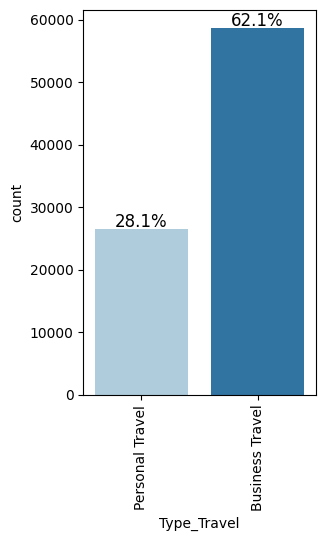

Number of null values:  9226


In [ ]:
labeled_countplot(train,'Type_Travel', perc = True, order = False)

In [ ]:
train.loc[train['Type_Travel'].isnull() == True]

ID  Gender   Customer_Type   Age Type_Travel Travel_Class  \
0      98800001  Female  Loyal Customer  52.0         NaN     Business   
12     98800013    Male  Loyal Customer  44.0         NaN     Business   
15     98800016  Female  Loyal Customer  54.0         NaN     Business   
30     98800031    Male  Loyal Customer   9.0         NaN          Eco   
39     98800040    Male  Loyal Customer  35.0         NaN          Eco   
...         ...     ...             ...   ...         ...          ...   
94273  98894274    Male  Loyal Customer  68.0         NaN          Eco   
94288  98894289  Female  Loyal Customer  11.0         NaN          Eco   
94307  98894308  Female  Loyal Customer  18.0         NaN     Business   
94328  98894329  Female  Loyal Customer  52.0         NaN          Eco   
94378  98894379    Male  Loyal Customer  54.0         NaN          Eco   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0                  272                      0.0                    5.0   
12                 427                      0.0                    0.0   
15                2827                      0.0                    0.0   
30                2379                    100.0                   93.0   
39                1818                     18.0                    2.0   
...                ...                      ...                    ...   
94273             1871                     18.0                    0.0   
94288             1789                     22.0                   18.0   
94307             1911                      0.0                    6.0   
94328             2160                    211.0                  213.0   
94378             2107                     28.0                   28.0   

       Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
0                       0           2.0  Green Car                      5.0   
12                      1           3.0   Ordinary                      NaN   
15                      1           5.0   Ordinary                      5.0   
30                      0           3.0  Green Car                      3.0   
39                      0           4.0   Ordinary                      1.0   
...                   ...           ...        ...                      ...   
94273                   0           2.0   Ordinary                      4.0   
94288                   0           4.0   Ordinary                      2.0   
94307                   1           5.0   Ordinary                      5.0   
94328                   0           2.0  Green Car                      5.0   
94378                   0           3.0   Ordinary                      1.0   

       Catering  Platform_Location  Onboard_Wifi_Service  \
0           5.0                5.0                   4.0   
12          5.0                3.0                   2.0   
15          5.0                5.0                   2.0   
30          3.0                3.0                   4.0   
39          3.0                2.0                   1.0   
...         ...                ...                   ...   
94273       2.0                4.0                   5.0   
94288       NaN                3.0                   5.0   
94307       5.0                5.0                   4.0   
94328       2.0                4.0                   2.0   
94378       3.0                3.0                   3.0   

       Onboard_Entertainment  Online_Support  Ease_of_Online_Booking  \
0                        2.0             3.0                     2.0   
12                       4.0             5.0                     5.0   
15                       5.0             4.0                     3.0   
30                       3.0             5.0                     4.0   
39                       3.0             1.0                     1.0   
...                      ...             ...                     ...   
94273                    2.0             5.0                 

Observations:


##Multivariate Analysis

###Numerical Variables

In [ ]:
#Retrieving the names of numerical columns and categorical columns
num_cols2 = train._get_numeric_data().columns
cat_cols2 = train.select_dtypes(exclude='number').columns

<Axes: >

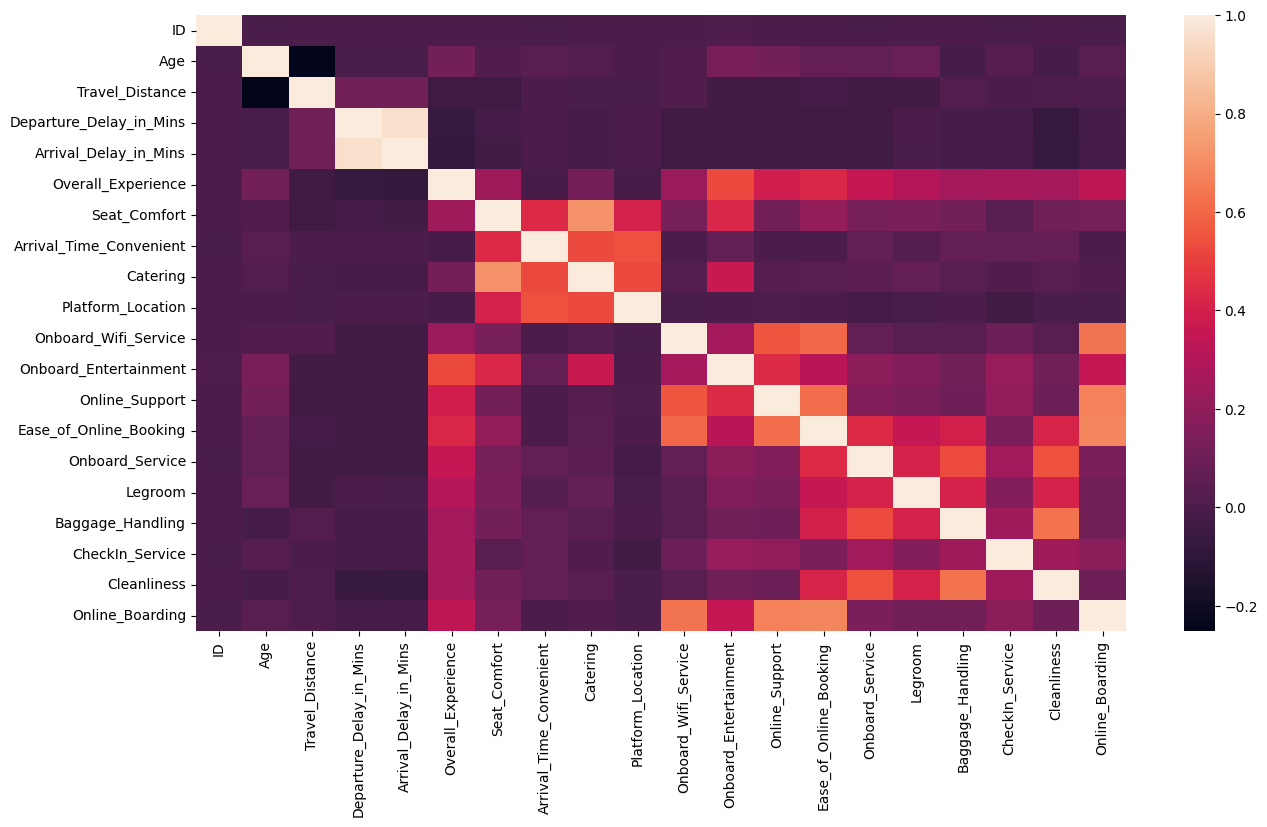

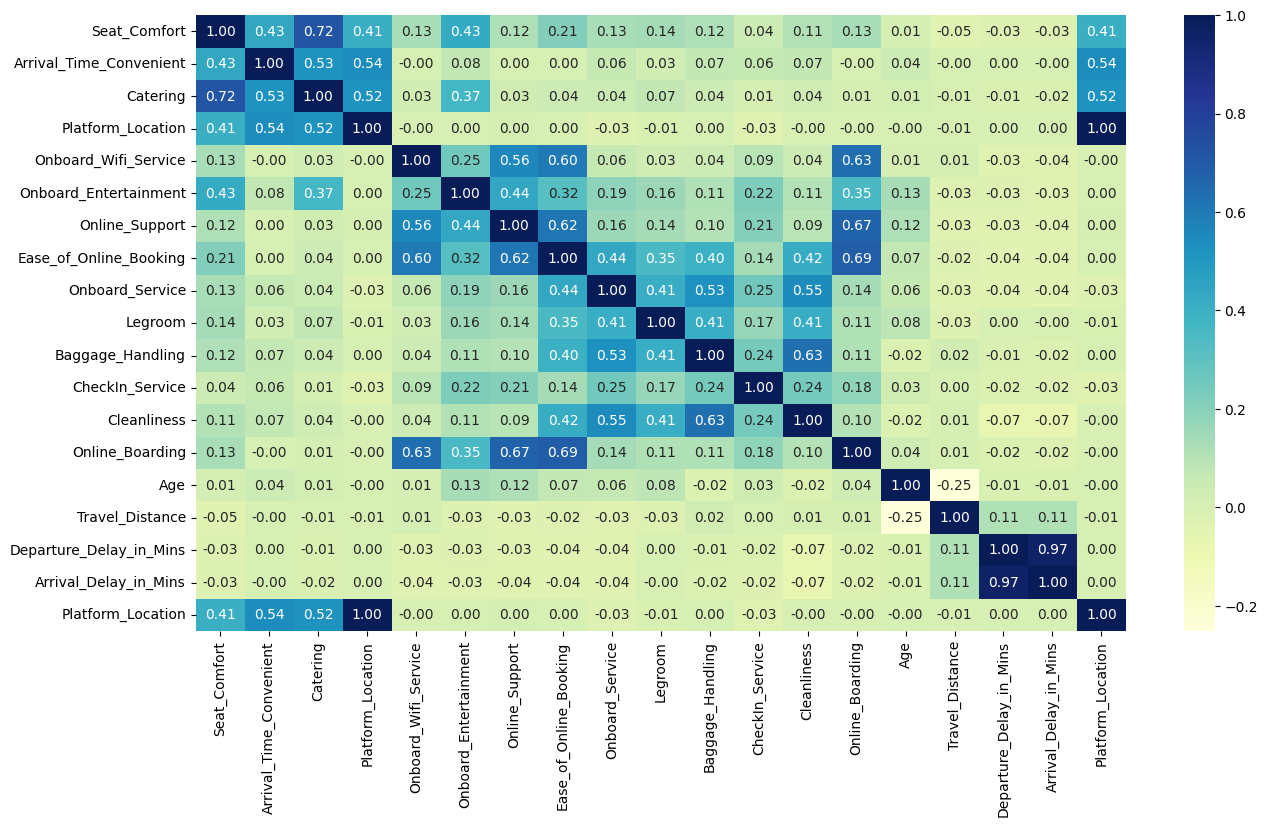

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(train.corr())
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(train[['Seat_Comfort',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding','Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins','Platform_Location']].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

###Do business passengers always take business class?

<Axes: xlabel='Type_Travel', ylabel='count'>

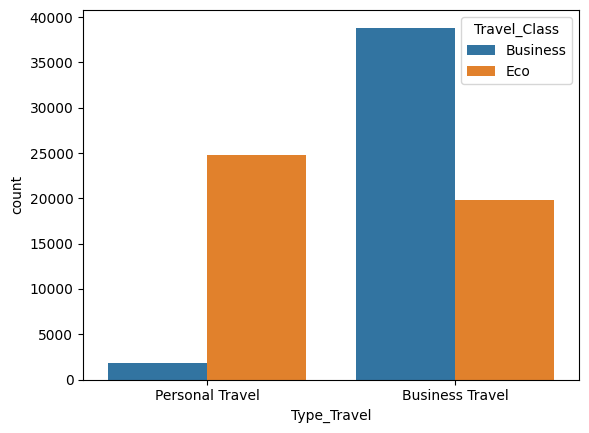

In [ ]:
sns.countplot(train,x = 'Type_Travel',hue = 'Travel_Class')

###Relationship between seat class, legroom and seat comfort?

####Seeing if Seat_Class affects rating distribution of Legroom and Seat_Comfort

<Axes: xlabel='Legroom', ylabel='Count'>

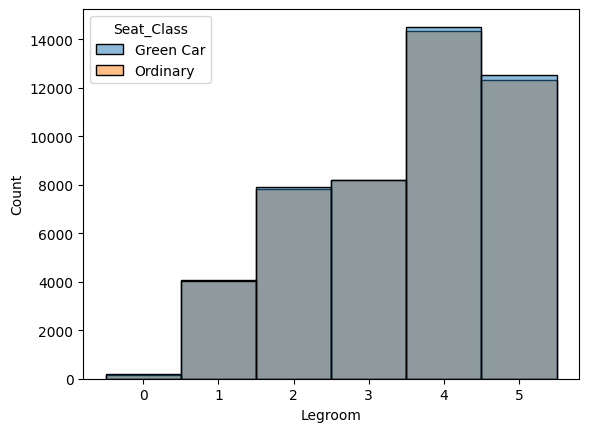

In [ ]:
sns.histplot(train, x = 'Legroom', hue = 'Seat_Class',discrete = True)

<Axes: xlabel='Seat_Comfort', ylabel='Count'>

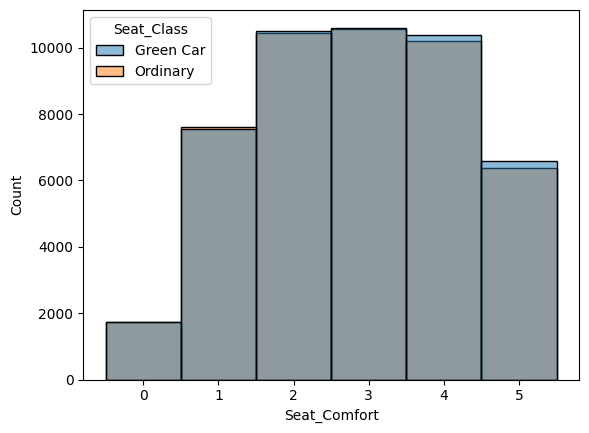

In [ ]:
sns.histplot(train, x = 'Seat_Comfort', hue = 'Seat_Class', discrete = True)

Observations:
1.	Green car consistently have better rating than ordinary class seats.
2.	Ordinary car seats consistently have more poor rating than green car class seats.

#### How do they affect overall experience?

Overall_Experience      0      1    All
Seat_Class                             
All                 42786  51593  94379
Green Car           21434  26001  47435
Ordinary            21352  25592  46944
------------------------------------------------------------------------------------------------------------------------


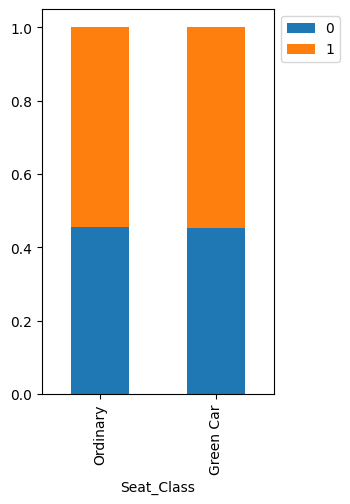

In [ ]:
stacked_barplot(train,'Seat_Class','Overall_Experience')

Overall_Experience      0      1    All
Seat_Comfort                           
All                 42757  51561  94318
3.0                 13669   7489  21158
2.0                 13464   7482  20946
1.0                  8339   6846  15185
4.0                  7181  13414  20595
5.0                    96  12875  12971
0.0                     8   3455   3463
------------------------------------------------------------------------------------------------------------------------


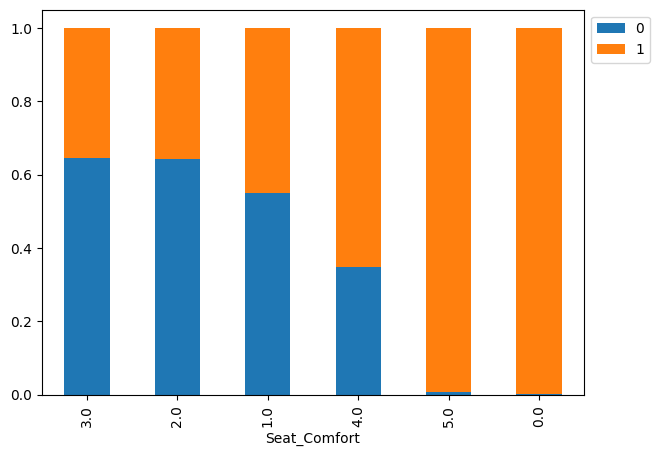

In [ ]:
stacked_barplot(train,'Seat_Comfort','Overall_Experience')

Overall_Experience      0      1    All
Legroom                                
All                 42750  51539  94289
3.0                 10321   6063  16384
2.0                  9814   5939  15753
4.0                  9488  19382  28870
5.0                  7245  17587  24832
1.0                  5776   2334   8110
0.0                   106    234    340
------------------------------------------------------------------------------------------------------------------------


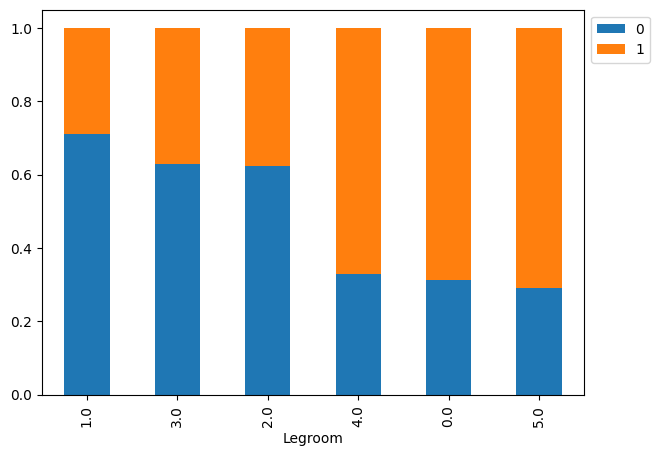

In [ ]:
stacked_barplot(train,'Legroom','Overall_Experience')

Overall_Experience      0      1    All
Legroom                                
All                 42750  51539  94289
3.0                 10321   6063  16384
2.0                  9814   5939  15753
4.0                  9488  19382  28870
5.0                  7245  17587  24832
1.0                  5776   2334   8110
0.0                   106    234    340
------------------------------------------------------------------------------------------------------------------------


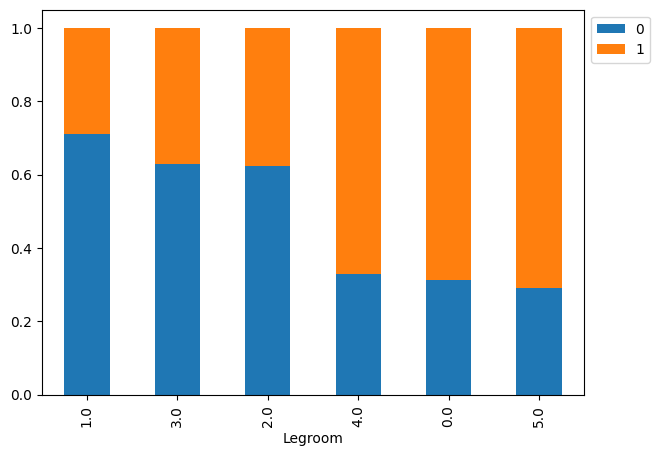

In [ ]:
stacked_barplot(train,'Legroom','Overall_Experience')

<Axes: xlabel='Gender', ylabel='count'>

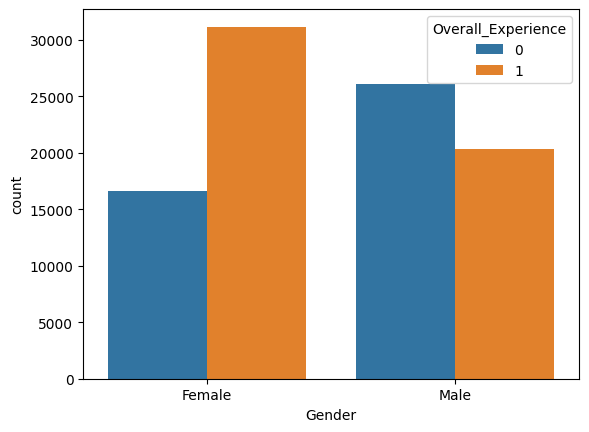

In [ ]:
sns.countplot(train, x = 'Gender', hue = 'Overall_Experience')

Women tend to appreciate more the experience than men. Around 65% of the Women rate the travel as a good experience and around 45% for the men.

Observations:
1. Seems like it doesn’t really make a significant difference whether the seat class is green car or ordinary. Customers are only slightly more satisfied overall on the green car.
2. This may mean that seat_class is not a very good indicator of overall experience
3. Even though there are 3463 people rating an extremely poor seat comfort, 3455 of them are satisfied with the overall experience.
4. A higher ratio of passengers who rated a poor and below seat comfort gave a good overall experience as compared to that of those who finds the seat comfort acceptable or needs improvement.
5. This is counter-intuitive and perhaps seat_comfort is not a good indicator of overall experience.

#Missing value and outliers treatment

###Gender

Women tend to appreciate more the experience than men. Around 65% of the Women rate the travel as a good experience and around 45% for the men.
We know the gender of 99.92% of the passengers, only 77 values are missing for this feature. Generally when we impute missing value for categorical variables we use the mode.


In [ ]:
#substitute missing values with mode
train['Gender'] = train['Gender'].apply(lambda x: 'Female' if x!='Female' and x!='Male' else x )

###Customer_Type

**Customer_Type**


The most of customers are Loyal, they are 81.7% over the total passengers only 18.2% are disloyal.
Customer type miss a lot of values 9.48%, not a huge number but we have to impute carfully the missing values becuase we might distort the distribution.
The difference is high between loyal and disloyal customer, so we can impute the mode without second thoughts. To check if the distribution didn't change we can compute again the percentage of loyal and disloyal customer

In [ ]:
#check how the distribution change before and after the imputation
train['Customer_Type'].value_counts(normalize=True)

Loyal Customer       0.817332
Disloyal Customer    0.182668
Name: Customer_Type, dtype: float64

Overall_Experience      0      1    All
Customer_Type                          
All                 38663  46765  85428
Loyal Customer      26794  43029  69823
Disloyal Customer   11869   3736  15605
------------------------------------------------------------------------------------------------------------------------


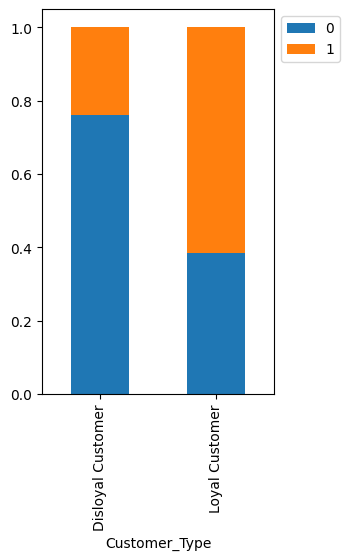

In [ ]:
stacked_barplot(train,'Customer_Type','Overall_Experience')

Onboard_Entertainment   0.0   1.0    2.0    3.0    4.0    5.0    All
Customer_Type                                                       
All                    1957  7751  12640  15858  27587  19618  85411
Loyal Customer         1290  5336   8779  11933  24480  17990  69808
Disloyal Customer       667  2415   3861   3925   3107   1628  15603
------------------------------------------------------------------------------------------------------------------------


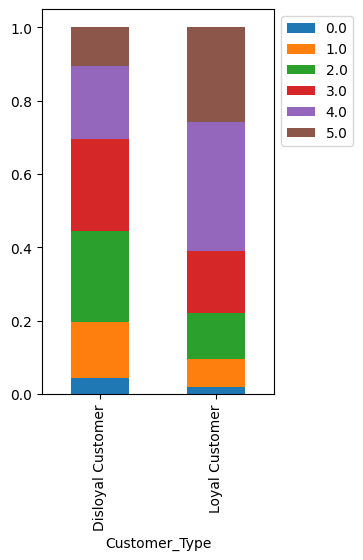

In [ ]:
stacked_barplot(train,'Customer_Type','Onboard_Entertainment')

In [ ]:
#substitute missing values with mode
train['Customer_Type'] = train['Customer_Type'].apply(lambda x: 'Loyal Customer' if x!='Loyal Customer' and x!='Disloyal Customer' else x )

In [ ]:
#check how the distribution change after the imputation
train['Customer_Type'].value_counts(normalize=True)

Loyal Customer       0.834656
Disloyal Customer    0.165344
Name: Customer_Type, dtype: float64

Now the percentage changes 83.4% of Loyal Customer and 16.5 Disloyal, we are in order of 2% so is not a huge difference comperad with before.

###Type_Travel

The most of the passenger's type_travel is business travel, they are 68.8% and 31.1% personal travel. The number of missing values is 9226, 9.77% of the total. The difference here is big so we can substitute with the mode

In [ ]:
train['Type_Travel'].value_counts(normalize = True)

Business Travel    0.688373
Personal Travel    0.311627
Name: Type_Travel, dtype: float64

Overall_Experience      0      1    All
Type_Travel                            
All                 38600  46553  85153
Business Travel     24441  34176  58617
Personal Travel     14159  12377  26536
------------------------------------------------------------------------------------------------------------------------


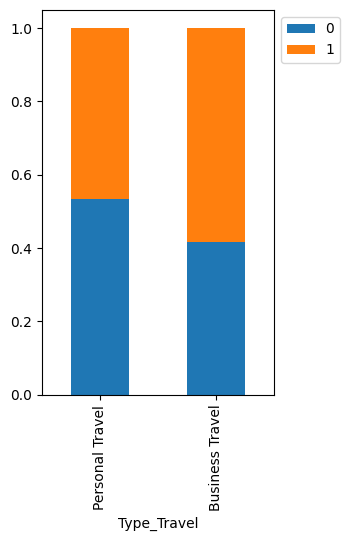

In [ ]:
stacked_barplot(train,'Type_Travel','Overall_Experience')

In [ ]:
#substitute missing values with mode
train['Type_Travel'] = train['Type_Travel'].apply(lambda x: 'Business Travel' if x!='Business Travel' and x!='Personal Travel' else x )

###Numerical variables range 0-5

The variables which range between 0 and 5 will not have outliers. I'm confident is not matematically possible to have outliers here. However if the distribution is skewed it's better to impute this value with the median and not the mean.
For these variables is better to have a look at the counplots before to decide in favor of mean instead of median. Unless the distribution is highly skewed we can use the mean to impute missing values. Otherwise we will use the mode.


['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding', 'Platform_Location']


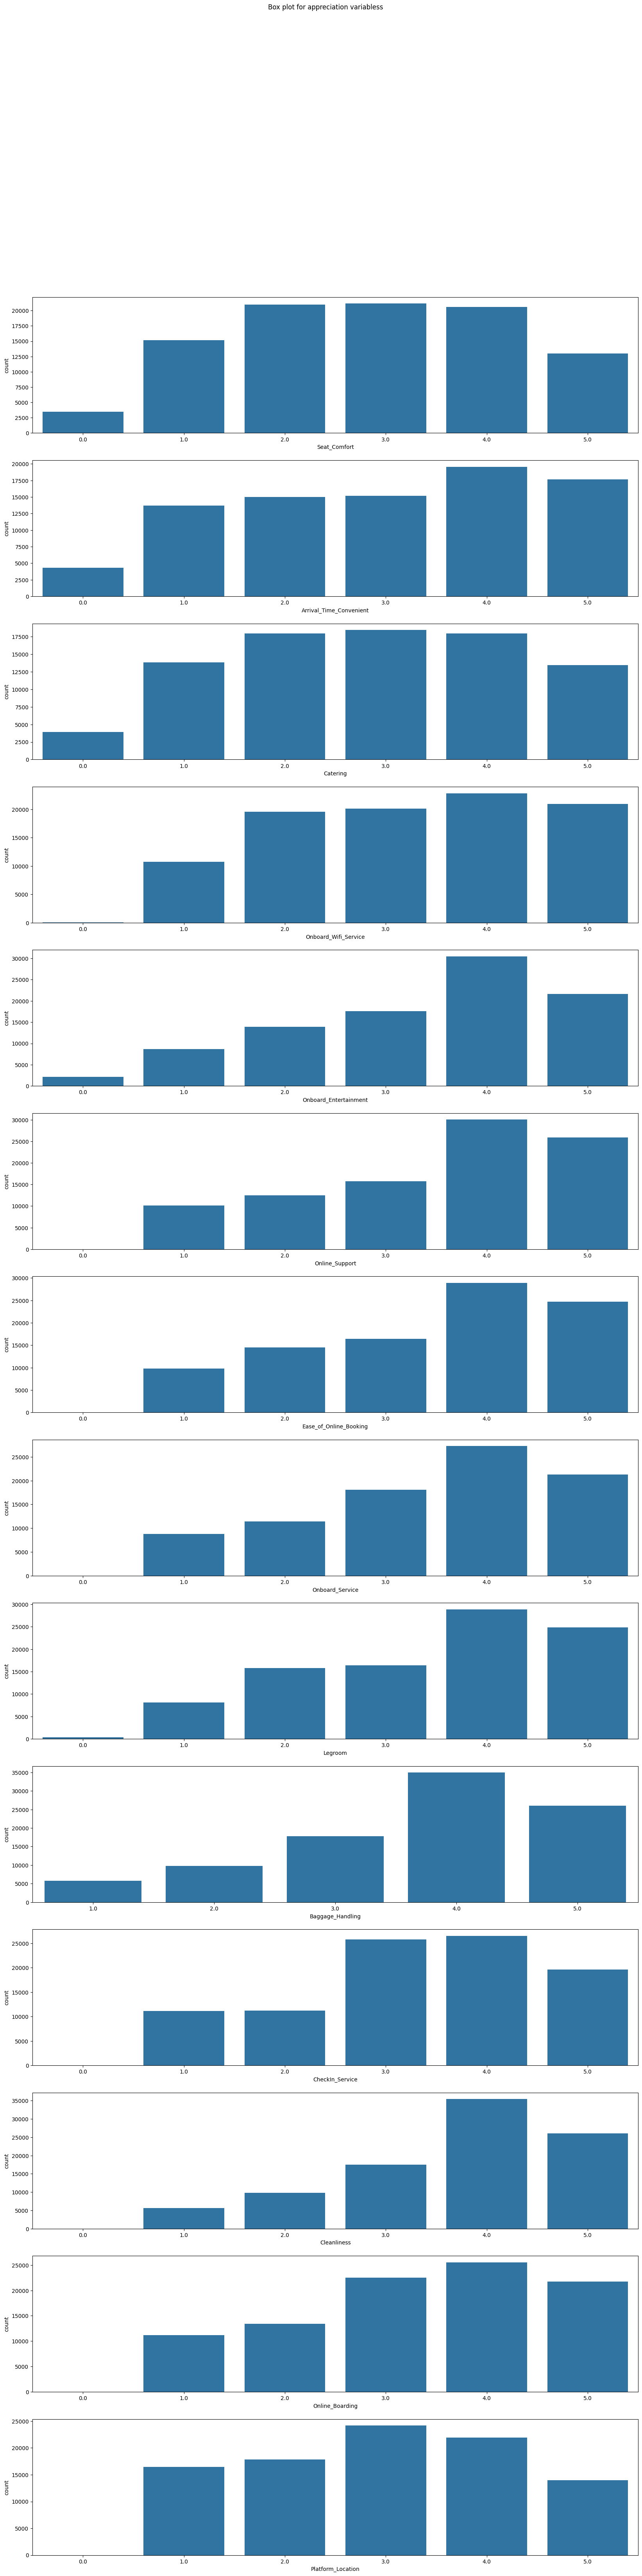

In [ ]:
#create as many count plot as the number of appreciation variables
fig, axes = plt.subplots(14, 1, figsize = (20, 75))
fig.suptitle('Box plot for appreciation variabless')

#Add Platform_Location into appreciation variables
appreciation_variables2 = appreciation_variables +['Platform_Location']
print(appreciation_variables2)

for i,column in enumerate(appreciation_variables2):
    sns.countplot(data=train, x=column, ax = axes[i]);

Seat comfort is mostly distributed with around 2,3,and 4, less observations for 5,1 and 0.
As I can see from the count plot, the observations are quite omogenuosly distributed so we can use the mean.
we can apply the same logic  to catering, Arrival time convenitent, platform location, onboard wi-fi service, Checkin sevice, online boarding


In [ ]:
# finding the mean and imputing the missing data with it
for column in ['Seat_Comfort','Catering', 'Arrival_Time_Convenient', 'Platform_Location','Onboard_Wifi_Service', 'CheckIn_Service', 'Online_Boarding']:
    train[column] = train[column].fillna(train[column].mean())

Looking at the count plots of onboard entertainment, Online support, Ease of online booking, onboard service, Legroom, Baggage Handling, Cleanless, is visible that the mode frequency is very high, so it's more indicate to substitute with it


In [ ]:
# finding the mode and imputing the missing data with it
for column in ['Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'Cleanliness']:
    train[column] = train[column].fillna(train[column].mode()[0])

###Other numerical variables

For the other numerical variables we have to choose between median and mean to impute missing values. When there are outliers and we think that the mean can be affted by, we will impute the median instead.
Age doesn't have outliers, we can impute the values with the mean.

In [ ]:
#substitute missing values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

Departure and arrival delay  are higly skewed on the right, there is a huge number of outliers, this distribution is significally affected by them, so it'd be better to impute the value with the median. But thinking of this 2 variables together, they can be estimation of one another. In average their difference is 0.43 minutes. The rest of the missing values we will impute with the median.

In [ ]:
train['diff'] = train['Arrival_Delay_in_Mins'] - train['Departure_Delay_in_Mins']

In [ ]:
train['diff'].mean()

0.43188828146603986

In [ ]:
train.drop('diff',axis=1,inplace=True)

In [ ]:
train.head(1)

ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   

   Overall_Experience  Seat_Comfort Seat_Class  Arrival_Time_Convenient  \
0                   0           2.0  Green Car                      5.0   

   Catering  Platform_Location  Onboard_Wifi_Service  Onboard_Entertainment  \
0       5.0                5.0                   4.0                    2.0   

   Online_Support  Ease_of_Online_Booking  Onboard_Service  Legroom  \
0             3.0                     2.0              2.0      3.0   

   Baggage_Handling  CheckIn_Service  Cleanliness  Online_Boarding  
0               2.0              4.0          2.0              1.0

In [ ]:
#substitute arrival delay with departure delay and viceversa
for i in list(range(train.shape[0])):
    if pd.isna(train.iloc[i]['Arrival_Delay_in_Mins']):
        if pd.isna(train.iloc[i]['Departure_Delay_in_Mins']):
            train.at[i,'Arrival_Delay_in_Mins']=train['Arrival_Delay_in_Mins'].median()
            train.at[i,'Departure_Delay_in_Mins']=train['Departure_Delay_in_Mins'].median()
        else:
            train.at[i,'Arrival_Delay_in_Mins'] = train.iloc[i]['Departure_Delay_in_Mins']
    else:
        if pd.isna(train.iloc[i]['Departure_Delay_in_Mins']):
            train.at[i,'Departure_Delay_in_Mins'] = train.iloc[i]['Arrival_Delay_in_Mins']
        else:
            pass

We also need to treat the outliers of departure delay and arrival delay. we can substitute them with the interquartile range

In [ ]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

In [ ]:
data = treat_outliers(train,'Departure_Delay_in_Mins')
data = treat_outliers(train,'Arrival_Delay_in_Mins')

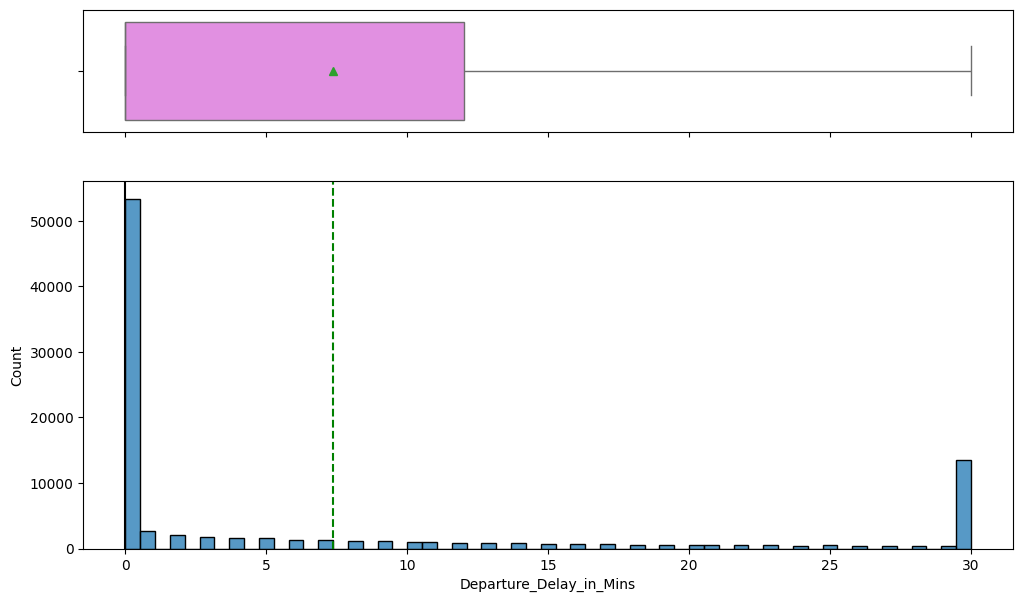

In [ ]:
histogram_boxplot(train,'Departure_Delay_in_Mins')

#Data Pre-processing

##Testing Datasets

The testing dataset do not have overall experience column, so it is purely for predicting after we have built our model. Thereofore, we will only be processing the dataset make sure the dataset has the same format as the training dataset.


In [ ]:
#Checking if the tavel and survey training data have same IDs
if traveldata_test['ID'].nunique()==surveydata_test['ID'].nunique():
    print(f"the unique ids are the same number")
    n_passengers = traveldata_test['ID'].nunique()
    print(f"there are {n_passengers} passengers in total")

the unique ids are the same number
there are 35602 passengers in total


In [ ]:
#merge dataframes
test = pd.merge(traveldata_test,surveydata_test,how='inner',on='ID')
if n_passengers == test['ID'].nunique():
    print('merge is succesfull, all passengers are in the final dataframe')

merge is succesfull, all passengers are in the final dataframe


In [ ]:
#Converting all features with satisfactory scales to numerical variables
for column in appreciation_variables:
    test[column] = test[column].apply(cat_to_numerical)

#Converting Platform_Location to numerical variables
test['Platform_Location'].replace({'Very Convenient': 5,
                                    'Convenient': 4,
                                    'Manageable': 3,
                                    'Needs Improvement': 2,
                                    'Inconvenient': 1,
                                    'Very Inconvenient': 0}, inplace=True)

In [ ]:
#remove ID column we don't need it for the model
test.drop('ID',axis=1,inplace=True)

In [ ]:
# Creating dummy variables for the categorical columns
test_data = pd.get_dummies(test,
                      columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
                      drop_first = True) #Only apply this function to object and category variables

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           35591 non-null  float64
 1   Travel_Distance               35602 non-null  int64  
 2   Departure_Delay_in_Mins       35573 non-null  float64
 3   Arrival_Delay_in_Mins         35479 non-null  float64
 4   Seat_Comfort                  35580 non-null  float64
 5   Arrival_Time_Convenient       32277 non-null  float64
 6   Catering                      32245 non-null  float64
 7   Platform_Location             35590 non-null  float64
 8   Onboard_Wifi_Service          35590 non-null  float64
 9   Onboard_Entertainment         35594 non-null  float64
 10  Online_Support                35576 non-null  float64
 11  Ease_of_Online_Booking        35584 non-null  float64
 12  Onboard_Service               32730 non-null  float64
 13  L

##Training Datasets

In [ ]:
#remove ID column we don't need it for the model
train.drop('ID',axis=1,inplace=True)

In [ ]:
# Creating dummy variables for the categorical columns
train_data = pd.get_dummies(train,
                      columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
                      drop_first = True) #Only apply this function to object and category variables

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           94379 non-null  float64
 1   Travel_Distance               94379 non-null  int64  
 2   Departure_Delay_in_Mins       94379 non-null  float64
 3   Arrival_Delay_in_Mins         94379 non-null  float64
 4   Overall_Experience            94379 non-null  int64  
 5   Seat_Comfort                  94379 non-null  float64
 6   Arrival_Time_Convenient       94379 non-null  float64
 7   Catering                      94379 non-null  float64
 8   Platform_Location             94379 non-null  float64
 9   Onboard_Wifi_Service          94379 non-null  float64
 10  Onboard_Entertainment         94379 non-null  float64
 11  Online_Support                94379 non-null  float64
 12  Ease_of_Online_Booking        94379 non-null  float64
 13  O

In [ ]:
#Saving the independent variables in x
x = train_data.drop('Overall_Experience',axis=1)

#Saving dependent variables in y
y = train_data['Overall_Experience']

# Y_train = train['Overall_Experience']
# X_train = train[['Seat_Comfort',
#        'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
#        'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
#        'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
#        'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
#        'Online_Boarding','Gender','Customer_Type','Type_Travel','Travel_Class','Seat_Class','Age','Travel_Distance','Departure_Delay_in_Mins','Arrival_Delay_in_Mins']]

##Split and Scale Data

In [ ]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (75503, 23)
Shape of test set :  (18876, 23)


In [ ]:
x_train.head()

Age  Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
17535  35.0             1942                     30.0                   32.5   
69574  16.0             1686                      0.0                   14.0   
45312  28.0             1978                      0.0                    0.0   
40906  54.0              460                      0.0                    0.0   
66430  25.0             1495                      0.0                    4.0   

       Seat_Comfort  Arrival_Time_Convenient  Catering  Platform_Location  \
17535           3.0                      4.0       3.0                4.0   
69574           3.0                      2.0       3.0                3.0   
45312           1.0                      0.0       1.0                4.0   
40906           2.0                      2.0       2.0                2.0   
66430           5.0                      4.0       5.0                5.0   

       Onboard_Wifi_Service  Onboard_Entertainment  Online_Support  \
17535                   5.0                    3.0             1.0   
69574                   4.0                    3.0             4.0   
45312                   2.0                    1.0             2.0   
40906                   4.0                    4.0             4.0   
66430                   2.0                    5.0             2.0   

       Ease_of_Online_Booking  Onboard_Service  Legroom  Baggage_Handling  \
17535                     5.0              1.0      1.0               3.0   
69574                     4.0              4.0      4.0               4.0   
45312                     2.0              4.0      1.0               4.0   
40906                     4.0              4.0      4.0               4.0   
66430                     2.0              4.0      3.0               5.0   

       CheckIn_Service  Cleanliness  Online_Boarding  Gender_Male  \
17535              1.0          3.0              5.0            1   
69574              4.0          3.0              4.0            1   
45312              1.0          4.0              2.0            1   
40906              4.0          4.0              3.0            0   
66430              3.0          5.0              2.0            0   

       Customer_Type_Loyal Customer  Type_Travel_Personal Travel  \
17535                             1                            1   
69574                             0                            0   
45312                             0                            0   
40906                             1                            0   
66430                             0                            0   

       Travel_Class_Eco  Seat_Class_Ordinary  
17535                 1                    0  
69574                 1                    0  
45312                 1                    1  
40906                 0                    0  
66430                 0                    0

In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
x_train_scaled=sc.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x.columns)

# Transform on test data
x_test_scaled=sc.transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x.columns)

#Model Building

### Evaluation Metric Functions

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    #In this heatmap, make sure the xticklabels are labelled correctly in the format [label if prediction is 0, label if prediction is 1]. In this case, 1 means Satisfied, and 0 means Not Satisfied.
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Function to compute adjusted R-squared (Only for regression models, but in the end these metrics were not used)
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

##Decision Tree


In [ ]:
# calculate frequency of target variable
y_train.value_counts()/len(y_train)

1    0.54672
0    0.45328
Name: Overall_Experience, dtype: float64

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.54672, 1: 0.45328}, random_state = 1)
# Fitting decision tree model
dt.fit(x_train, y_train)
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34224
           1       1.00      1.00      1.00     41279

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



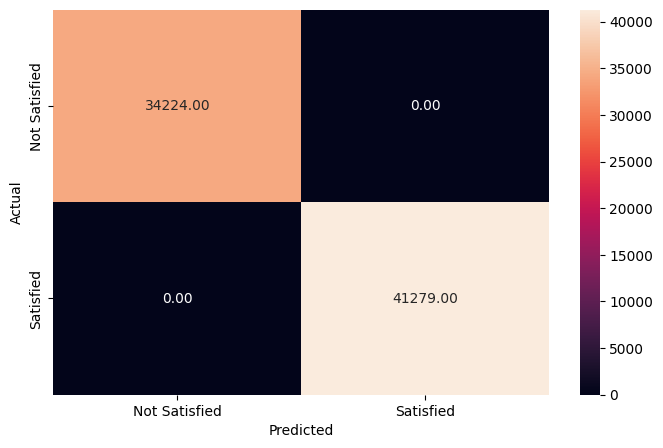

In [ ]:
#evaluation on train set
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8562
           1       0.93      0.94      0.93     10314

    accuracy                           0.93     18876
   macro avg       0.93      0.93      0.93     18876
weighted avg       0.93      0.93      0.93     18876



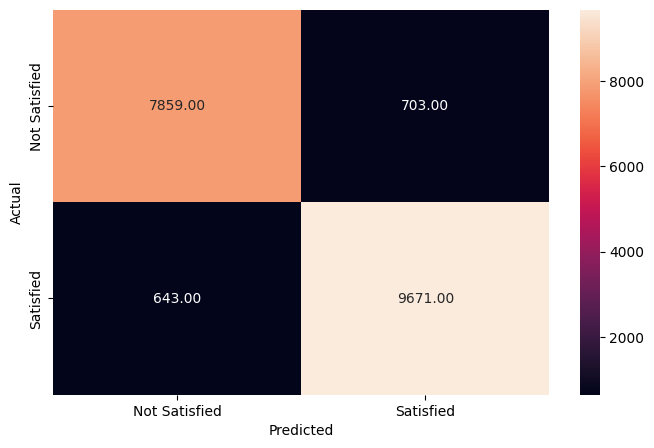

In [ ]:
#evaluation on train set
metrics_score(y_test, y_test_pred_dt)

Observations:
- It's evident that the DT is overfitting as ther accuracy is 1 in the train set and 0.93 in the test set.
- We defently can do better but 0.93 on test sample is quite good as a starting point.
- Sensitivity and precision are 0.93 and 0.94.

<Axes: xlabel='Importance', ylabel='None'>

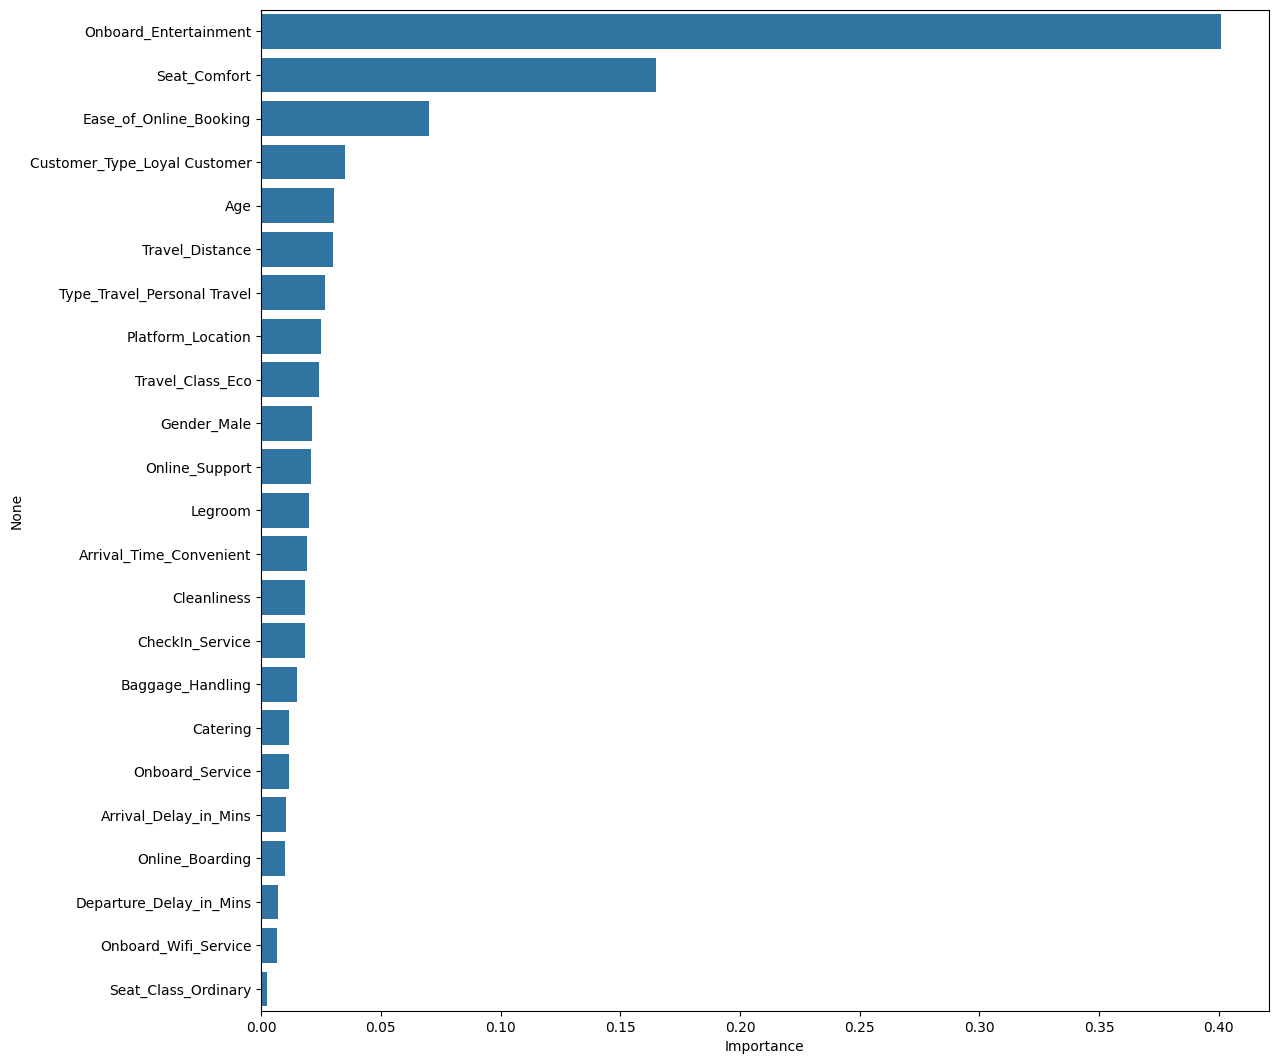

In [ ]:
# Plotting the feature's importance

#Extracting the importance from the decision tree
importances = dt.feature_importances_

#Extracting the deatures/independent variables
columns = x.columns

#Putting the feature's importance into a dataframe
importance_df = pd.DataFrame(importances,
                             index = columns,
                             columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#Setting the plot's size
plt.figure(figsize = (13, 13))

#Plot the barplot for feature importance
sns.barplot(x=importance_df.Importance,y=importance_df.index)

Observations:
- Onboarding entertainment is largly the most important explanatory variable in the dataset
- Seat comfort and ease of online booking are also very useful to predict the overall experience
- Customer type, distance, platform location, age add also information to the model.
- the rest of the variables add just a little information to the model

Using Decision Tree as the baseline score, we developed more advanced models to see if we can reach a higher score.

##Random Forest


In [ ]:
# Fitting the Random Forest classifier on the training data
rf = RandomForestClassifier(class_weight = {0: 0.54672, 1: 0.45328}, random_state = 1)
rf.fit(x_train, y_train)
#predict train sample
y_pred_train_rf = rf.predict(x_train)
#predict test sample
y_pred_test_rf = rf.predict(x_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34224
           1       1.00      1.00      1.00     41279

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



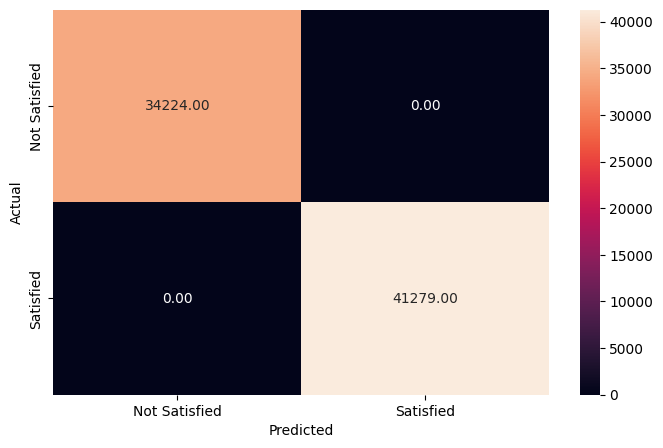

In [ ]:
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8562
           1       0.96      0.95      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



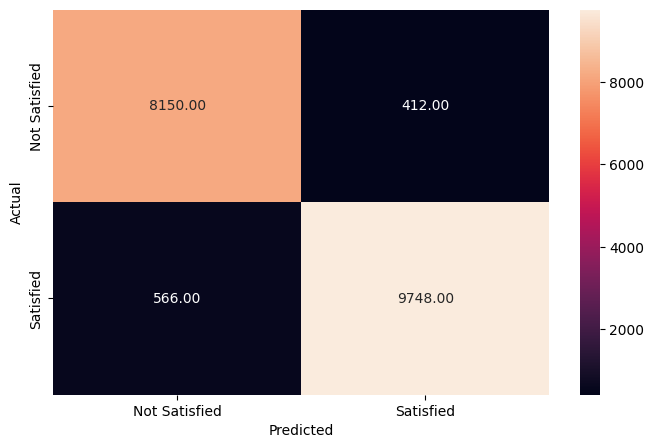

In [ ]:
metrics_score(y_test, y_pred_test_rf)

Observations:
- The model is overfitting the accuracy of the train set is 1 and 0.95 of the test set.
- The accuracy Improved comparing with the Decision Tree.

<Axes: xlabel='Importance', ylabel='None'>

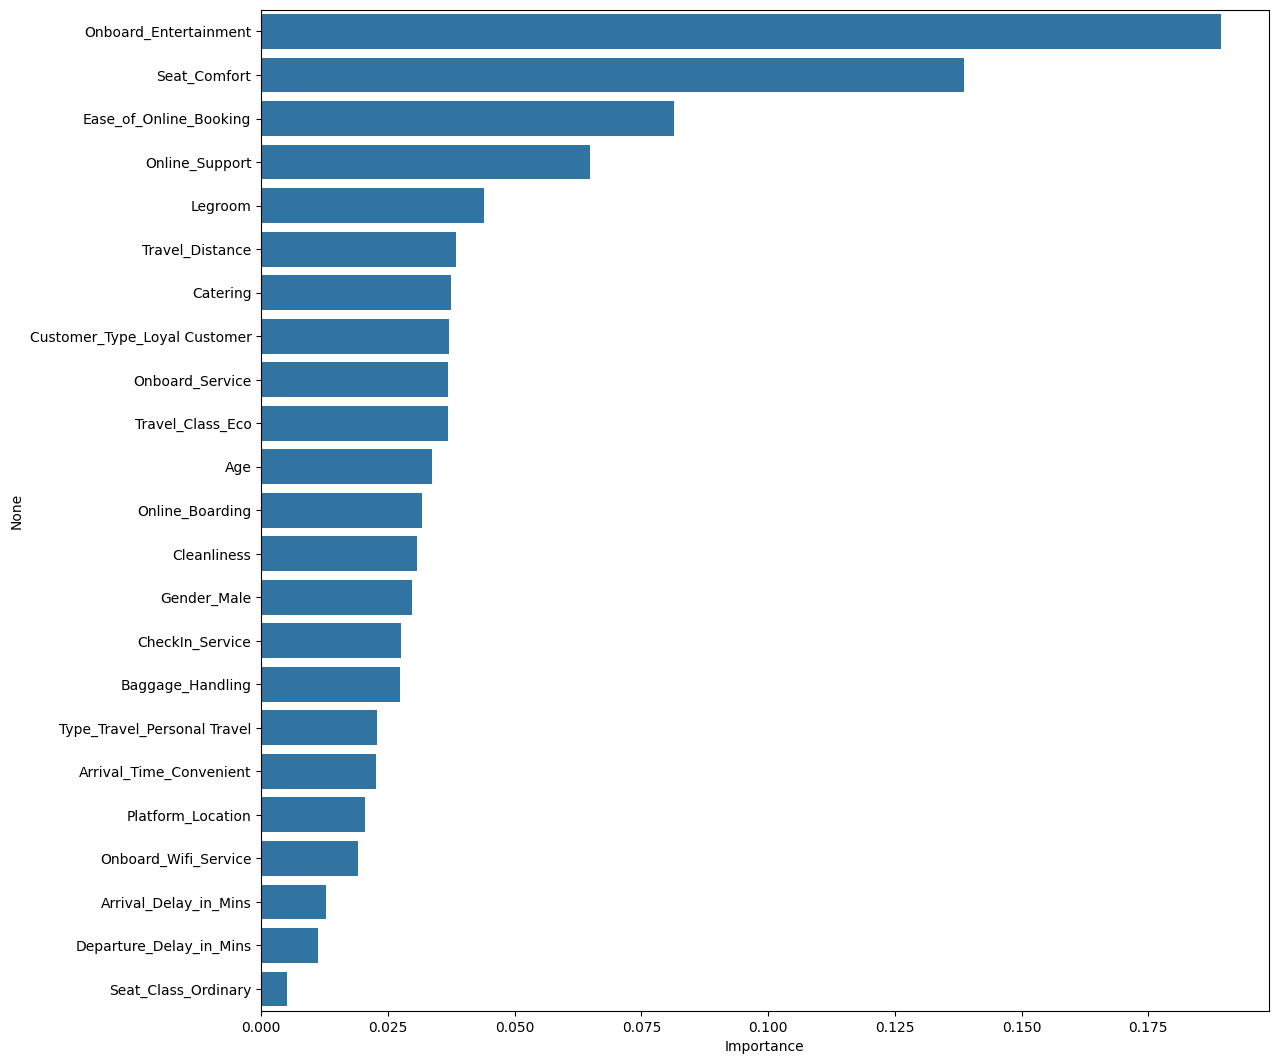

In [ ]:
# Plot the feature importance

#Extract importance
importances = rf.feature_importances_

#Extract features
columns = x.columns

#Put data into a dataframe
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#Determine the figure size for plot
plt.figure(figsize = (13, 13))

#Plot a bar plot
sns.barplot(x=importance_df.Importance,y=importance_df.index)

Observations:
- Onboard entertainment is the most important variable
- seat comfort is also a very important feature
- ease of online booking and online support is also very appreciated by passengers
- Legroom, travel distance, catering, costumer type, onboarding service, travel class add information to the model

### RF Pruning

In [ ]:
# try different trees changing the max_depth parameter to find the model which maximize precision
depths = [6,7,8,9,10,11,12,13,14,15]
precisions_test = []
recalls_test = []
precisions_train = []
recalls_train = []

for depth in depths:
    #Creating the Random Forest Classifier
    rf = RandomForestClassifier(class_weight = {0: 0.54672, 1: 0.45328},
                                random_state = 1,
                                max_depth = depth) #Here we are testing the different depth values

    #Fit the model onto our training data
    rf.fit(x_train, y_train)

    #Making the predictions
    y_test_pred_rf = rf.predict(x_test)
    y_train_pred_rf = rf.predict(x_train)

    #Recording the prediction results to get the precision and recall metrics
    precisions_test.append(precision_score(y_test, y_test_pred_rf))
    recalls_test.append(recall_score(y_test, y_test_pred_rf))
    precisions_train.append(precision_score(y_train, y_train_pred_rf))
    recalls_train.append(recall_score(y_train, y_train_pred_rf))

#Creating a dataframe to store the preceision and recall values at each depth
pruning_rf = pd.DataFrame()
pruning_rf['depth']=depths
pruning_rf['precision_test'] = precisions_test
pruning_rf['precision_train'] = precisions_train
pruning_rf['recall_test'] = recalls_test
pruning_rf['recall_train'] = recalls_train

pruning_rf

depth  precision_test  precision_train  recall_test  recall_train
0      6        0.907355         0.910934     0.907795      0.911287
1      7        0.915613         0.921630     0.913128      0.916495
2      8        0.922306         0.926203     0.918460      0.923084
3      9        0.927616         0.934801     0.920690      0.928777
4     10        0.938058         0.947071     0.926508      0.933695
5     11        0.940766         0.953004     0.928544      0.940260
6     12        0.947861         0.963969     0.932422      0.945614
7     13        0.952146         0.971956     0.935621      0.952954
8     14        0.955839         0.979099     0.938045      0.961191
9     15        0.959109         0.985690     0.939209      0.967853

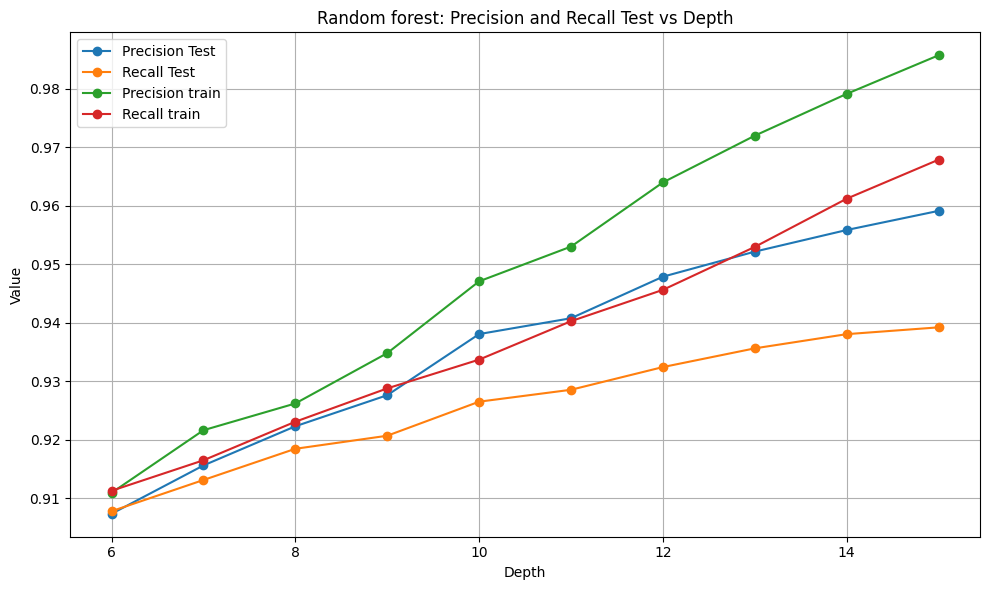

In [ ]:
#Plotting the above data to vizualize which depth has best precision
plt.figure(figsize=(10,6))
plt.plot(pruning_rf['depth'], pruning_rf['precision_test'], label='Precision Test', marker='o')
plt.plot(pruning_rf['depth'], pruning_rf['recall_test'], label='Recall Test', marker='o')
plt.plot(pruning_rf['depth'], pruning_rf['precision_train'], label='Precision train', marker='o')
plt.plot(pruning_rf['depth'], pruning_rf['recall_train'], label='Recall train', marker='o')

#Determining plot appearance
plt.xlabel('Depth')
plt.ylabel('Value')
plt.title('Random forest: Precision and Recall Test vs Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Since all metrics keep growing even after depth=15, let us build a random forest with a depth of 15 and see if the RF will perform better.



In [ ]:
# Fitting the Random Forest classifier on the training data
rf2 = RandomForestClassifier(class_weight = {0: 0.54672, 1: 0.45328}, random_state = 1, max_depth =15)
rf2.fit(x_train, y_train)
#predict train sample
y_pred_train_rf2 = rf2.predict(x_train)
#predict test sample
y_pred_test_rf2 = rf2.predict(x_test)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     34224
           1       0.99      0.97      0.98     41279

    accuracy                           0.97     75503
   macro avg       0.97      0.98      0.97     75503
weighted avg       0.97      0.97      0.97     75503



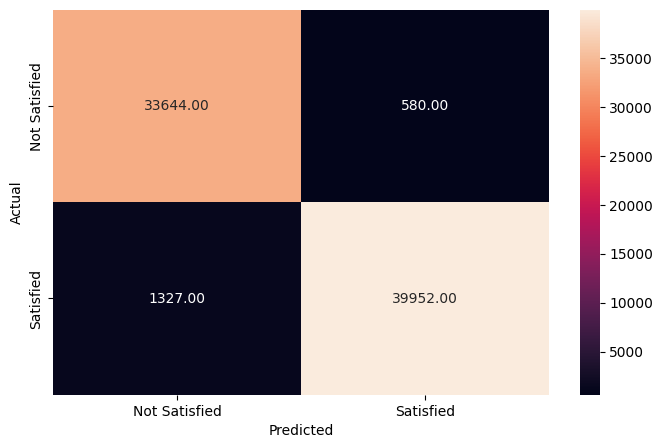

In [ ]:
#Testing against training data
metrics_score(y_train, y_pred_train_rf2)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8562
           1       0.96      0.94      0.95     10314

    accuracy                           0.94     18876
   macro avg       0.94      0.95      0.94     18876
weighted avg       0.95      0.94      0.94     18876



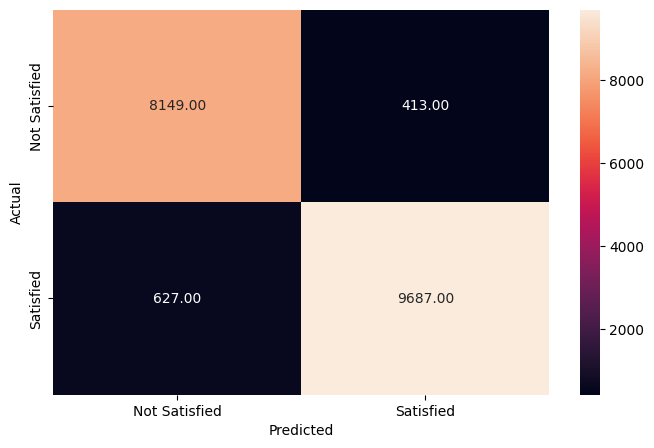

In [ ]:
#Testing against testing data
metrics_score(y_test, y_pred_test_rf2)

The performance of the model on test data is lower than the first RF model, so we will need to keep pruning to see if we can achieve a better performance.

In [ ]:
# try different trees changing the max_depth parameter to find the model which maximise accuracy
depths = [12,13,14,15,16,17,18,19,20]
accuracy_test = []
accuracy_train = []

for depth in depths:
    #Creating the Random Forest Classifier
    rf = RandomForestClassifier(class_weight = {0: 0.54672, 1: 0.45328},
                                random_state = 1,
                                max_depth = depth) #Using a higher range of depth, since the metrics improves with depths higher than 15

    #Fit the model onto our training data
    rf.fit(x_train, y_train)

    #Making the predictions
    y_test_pred_rf = rf.predict(x_test)
    y_train_pred_rf = rf.predict(x_train)

    #Recording the prediction results to get the accuracy metrics
    accuracy_test.append(accuracy_score(y_test, y_test_pred_rf))
    accuracy_train.append(accuracy_score(y_train, y_train_pred_rf))

#Creating a dataframe to store the accuracy values at each depth
pruning_rf = pd.DataFrame()
pruning_rf['depth']=depths
pruning_rf['accuracy_test'] = accuracy_test
pruning_rf['accuracy_train'] = accuracy_train

pruning_rf

depth  accuracy_test  accuracy_train
0     12       0.935050        0.950942
1     13       0.939129        0.959247
2     14       0.942467        0.967564
3     15       0.944904        0.974743
4     16       0.946652        0.981696
5     17       0.947764        0.986159
6     18       0.948559        0.990133
7     19       0.949089        0.993020
8     20       0.948135        0.995563

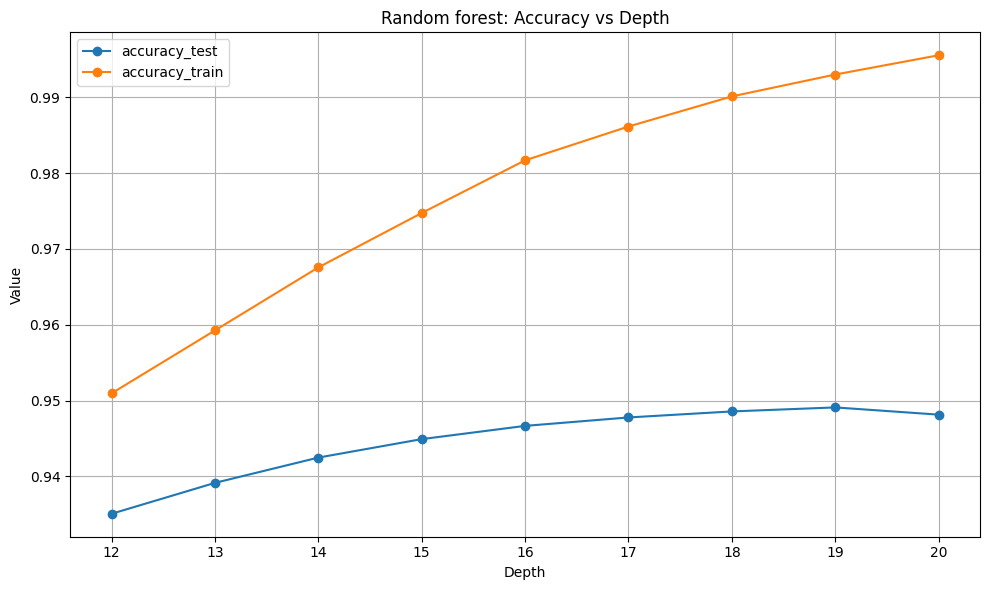

In [ ]:
#Plotting the accuracy of model against depth
plt.figure(figsize=(10,6))
plt.plot(pruning_rf['depth'], pruning_rf['accuracy_test'], label='accuracy_test', marker='o')
plt.plot(pruning_rf['depth'], pruning_rf['accuracy_train'], label='accuracy_train', marker='o')

plt.xlabel('Depth')
plt.ylabel('Value')
plt.title('Random forest: Accuracy vs Depth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As shown from the plot, accuracy for training data begins to dip at depth=19.

So we will create a RF model using depth = 19

In [ ]:
# Fitting the Random Forest classifier on the training data
rf3 = RandomForestClassifier(class_weight = {0: 0.54672, 1: 0.45328}, random_state = 1, max_depth =19)
rf3.fit(x_train, y_train)
#predict train sample
y_pred_train_rf3 = rf3.predict(x_train)
#predict test sample
y_pred_test_rf3 = rf3.predict(x_test)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     34224
           1       1.00      0.99      0.99     41279

    accuracy                           0.99     75503
   macro avg       0.99      0.99      0.99     75503
weighted avg       0.99      0.99      0.99     75503



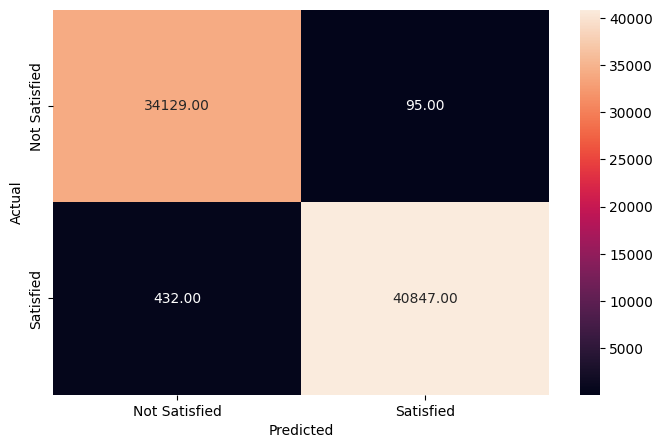

In [ ]:
metrics_score(y_train, y_pred_train_rf3)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8562
           1       0.96      0.95      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



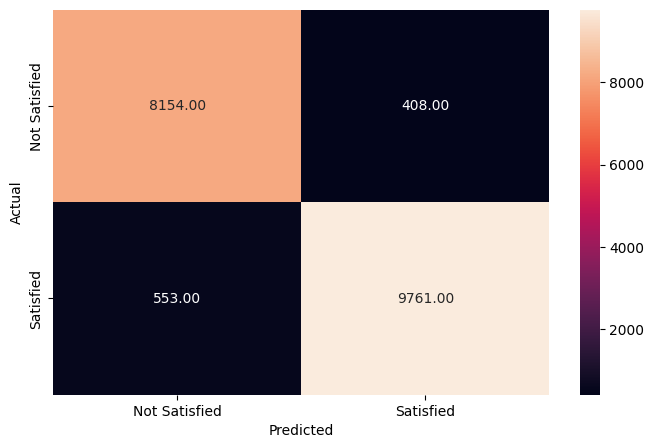

In [ ]:
metrics_score(y_test, y_pred_test_rf3)

Observations:
- This model of RF performs a little better than the base model
- Model is still overfitting as the accuracy on training data is 0.99, but the accuracy on testing data is 0.95.
- Model could be further improved by more fine pruning.

With a contraint on time, we moved on to developing deep learning models.

## Proposed further pruning of RF Model

In this section, the pruning parameters were too much for google colab to process, taking more than a day of buffering to complete.

Therefore, I suggest to use these parameters as a guide and reduce the number of parameters to prune your RF model.

Let me know if your optimal parameters if you did try this out! :D

In [ ]:
'''
# Choosing the Classifier as the estimator
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# List of parameters that will be used for the gridsearch
params_rf = {'criterion': ['entropy','gini','log_loss'],
             "n_estimators": [100, 250, 500], #No. of trees
             "min_samples_leaf": np.arange(1,5,1),
             "max_features": [0.3,0.5,0.7, 0.9, 'auto','sqrt'],
             "max_depth":[16,17,18,19,20,21], #Min. samples in each leaf
             "min_samples_split": [2,3,4,5,6,7],
             "bootstrap":[True,False],
             "class_weight":[None,'balanced']
}
# Using precision score for class 1
scorer = metrics.make_scorer(precision_score, pos_label = 1)

# Run the grid search function-
grid_obj = GridSearchCV(estimator = rf_estimator_tuned,
                        param_grid = params_rf,
                        scoring = scorer,
                        cv = 5)

# Fit the gridsearch onto the training data
grid_obj = grid_obj.fit(x_train_scaled, y_train)

best_params = grid_obj.best_params_
best_score = grid_obj.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)
'''

'\n# Choosing the Classifier as the estimator\nrf_estimator_tuned = RandomForestClassifier(random_state = 1)\n\n# List of parameters that will be used for the gridsearch\nparams_rf = {\'criterion\': [\'entropy\',\'gini\',\'log_loss\'],\n             "n_estimators": [100, 250, 500], #No. of trees\n             "min_samples_leaf": np.arange(1,5,1),\n             "max_features": [0.3,0.5,0.7, 0.9, \'auto\',\'sqrt\'],\n             "max_depth":[16,17,18,19,20,21], #Min. samples in each leaf\n             "min_samples_split": [2,3,4,5,6,7],\n             "bootstrap":[True,False],\n             "class_weight":[None,\'balanced\']\n}\n# Using precision score for class 1\nscorer = metrics.make_scorer(precision_score, pos_label = 1)\n\n# Run the grid search function-\ngrid_obj = GridSearchCV(estimator = rf_estimator_tuned,\n                        param_grid = params_rf,\n                        scoring = scorer,\n                        cv = 5)\n\n# Fit the gridsearch onto the training data\ngr

In [ ]:
'''
# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best estimator to the data
rf_estimator_tuned.fit(x_train, y_train)

#predict train sample
y_pred_train_rf_tuned = rf_tuned.predict(x_train)
#predict test sample
y_pred_test_rf_tuned = rf_tuned.predict(x_test)

metrics_score(y_train, y_pred_train_rf_tuned)
'''

'\n# Set the classifier to the best combination of parameters\nrf_estimator_tuned = grid_obj.best_estimator_\n\n# Fit the best estimator to the data\nrf_estimator_tuned.fit(x_train, y_train)\n\n#predict train sample\ny_pred_train_rf_tuned = rf_tuned.predict(x_train)\n#predict test sample\ny_pred_test_rf_tuned = rf_tuned.predict(x_test)\n\nmetrics_score(y_train, y_pred_train_rf_tuned)\n'

In [ ]:
'''
metrics_score(y_test, y_pred_test_rf_tuned)
'''

'\nmetrics_score(y_test, y_pred_test_rf_tuned)\n'

##Deep Learning

### Model 1 - Base Model


In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Initialize sequential model
model_1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(23,)),#Input layer
                               tf.keras.layers.Dense(128, activation='relu'), #Hidden layer
                               tf.keras.layers.Dense(64, activation='relu'), #Hidden layer
                               tf.keras.layers.Dense(1, activation='sigmoid')]) #Output layer, only 1 node because we only have 1 predictor

In [ ]:
#Using the settings for the sequential model above, create the model with the following algorithms
model_1.compile(loss = 'binary_crossentropy',
                optimizer='adamax',
                metrics=['accuracy'])

#Show the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 23)                0         
                                                                 
 dense (Dense)               (None, 128)               3072      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let us now fit the model onto our data
history1 = model_1.fit(x_train_scaled,
                          y_train,
                          validation_split=0.2, #20% for validation data
                          verbose=1, #It writes the verbiage for the training progress. A higher number would give more information
                          epochs=50, #Number of times the model goes through the entire training dataset
                          batch_size=32) #This is the batch Stochastic Gradient Descend method, with batchsize per training step of 64

Epoch 1/50
1888/1888 [==============================] - 6s 3ms/step - loss: 0.2765 - accuracy: 0.8852 - val_loss: 0.2222 - val_accuracy: 0.9089
Epoch 2/50
1888/1888 [==============================] - 6s 3ms/step - loss: 0.2085 - accuracy: 0.9122 - val_loss: 0.1972 - val_accuracy: 0.9163
Epoch 3/50
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1890 - accuracy: 0.9208 - val_loss: 0.1843 - val_accuracy: 0.9238
Epoch 4/50
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1760 - accuracy: 0.9259 - val_loss: 0.1759 - val_accuracy: 0.9283
Epoch 5/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.1663 - accuracy: 0.9306 - val_loss: 0.1683 - val_accuracy: 0.9286
Epoch 6/50
1888/1888 [==============================] - 4s 2ms/step - loss: 0.1586 - accuracy: 0.9336 - val_loss: 0.1624 - val_accuracy: 0.9300
Epoch 7/50
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1512 - accuracy: 0.9373 - val_loss: 0.1560 - val_accuracy:

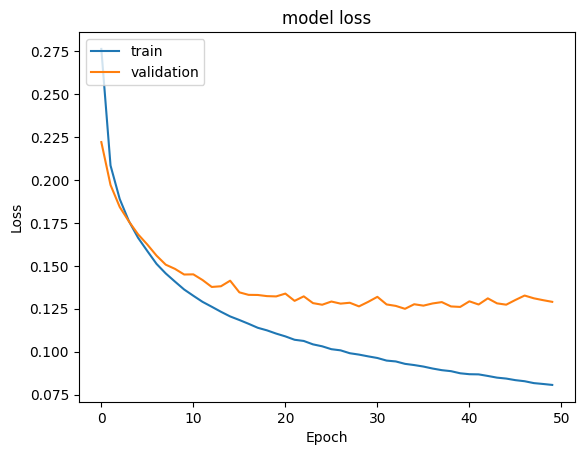

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

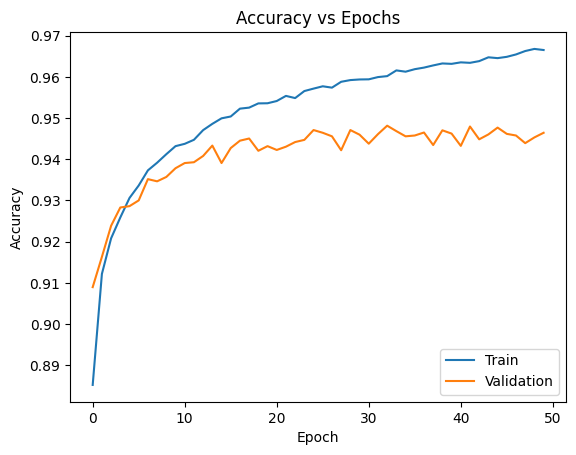

In [ ]:
#Plotting Epoch vs accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
y_pred=model_1.predict(x_test_scaled)
y_pred = (y_pred > 0.5)
y_pred

590/590 [==============================] - 1s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34224
           1       1.00      1.00      1.00     41279

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



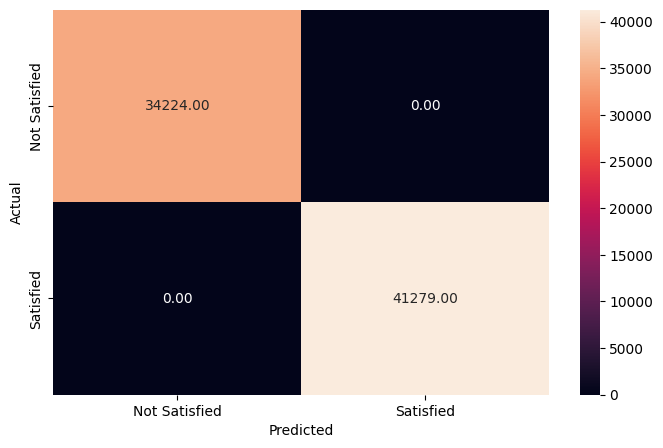

In [ ]:
metrics_score(y_train,y_train)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8562
           1       0.96      0.94      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.94      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



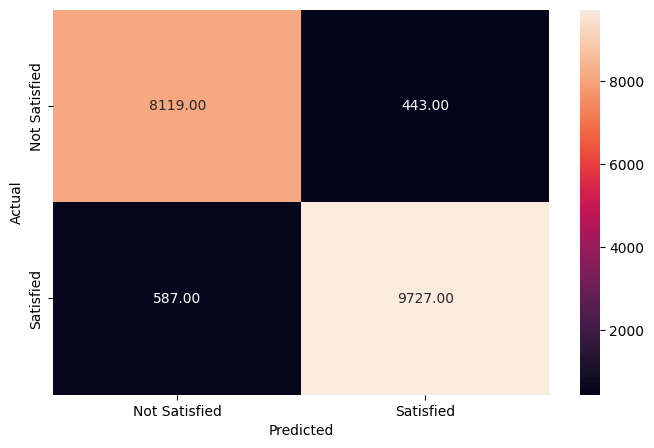

In [ ]:
metrics_score(y_test,y_pred)

Observations:

- The base model is overfitting as the accuracy on training data is 1.00, but accuracy on testing data is 0.95. Quite similar to the Decision Tree and Random Forest models.

We can use the **ROC-AUC method** to further tune this base model by determining how sensitive or specific the model should be.

In the ROC-AUC method, we are telling the model to change the threshold used to classify if a result is positive or negative. By default, the model makes a prediction of 0 - 1, and a value above 0.5 will be classified as positive. By increasing that value to 0.6 for example, we are making the model more specific and less sensitive, by having a higher requirement to label a result as positive.

The more specific a model is, the lesser false positive/false negatives will be made by the model. However, a specific model will label more true positive/negatives wrongly.

On the other hand, a more sensitive model will successfully label a true positive as positive, but is less accurate.



**Tuning via ROC-AUC**

590/590 [==============================] - 1s 1ms/step
Best Threshold=0.590928, G-Mean=0.946


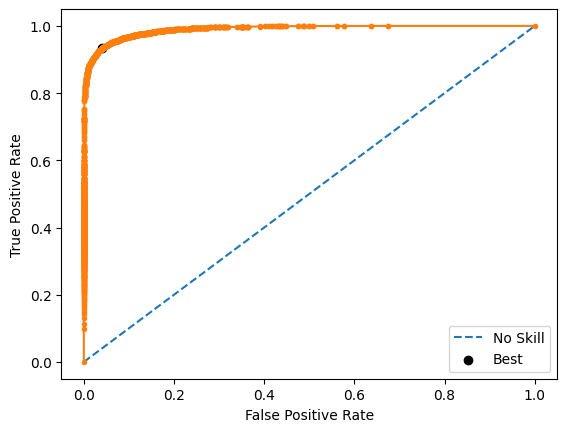

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
yhat1 = model_1.predict(x_test_scaled)

# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]

# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)

# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
#Predicting test data using best threshold

#Making the prediction using the test data
y_pred_e1=model_1.predict(x_test_scaled)

#Using the threshold value to convert the predicted data into true or false statements. If the predicted data is higher than threshold, it will be labelled true.
y_pred_e1 = (y_pred_e1 > thresholds1[ix])

#Just to see what the data looks like
y_pred_e1

590/590 [==============================] - 1s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8562
           1       0.97      0.93      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.94      0.95      0.94     18876
weighted avg       0.95      0.95      0.95     18876



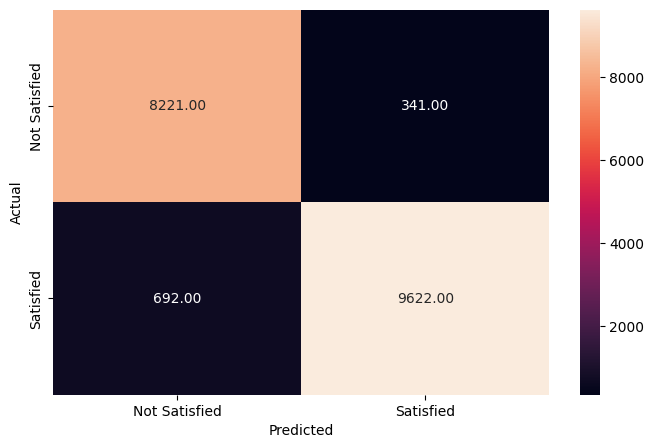

In [ ]:
metrics_score(y_test, y_pred_e1)

Observations:
- The model performs almost the same to before the ROC-AUC tuning. This means that a threshold value of 0.5 is accurate enough

Next, we will use gridsearchCV to improve the model.

### Model 2 - Increasing number of hidden layers and nodes

Differences from Model 1:
- We added 2 more hiddden layers, resulting in more trainable parameters.
- We are now using adam optimizer instead of adamax

In [ ]:
#Part of best practice to clear the backend session before moving onto the next model, this will free up resources
backend.clear_session()

#Fixing the random elements again
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_2 = Sequential()

#Adding the hidden and output layers
model_2.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = x_train_scaled.shape[1])) #New hidden layer
model_2.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(32,activation='relu',kernel_initializer='he_uniform')) #New hidden layer
model_2.add(Dense(1, activation = 'sigmoid'))

# Here, we use the Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

#Compiling the ANN with Adam optimizer and binary cross entropy loss function
model_2.compile(loss='binary_crossentropy',
                optimizer = optimizer,
                metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fit the model onto our data using the following settings
history_2 = model_2.fit(x_train_scaled,
                        y_train,
                        batch_size=32, #Batch size of 64 instead of 32, as the Train loss vs validation loss graph did not converge.
                        epochs=50, #Number of times the model goes through the entire training dataset
                        verbose=1,
                        validation_split = 0.2)

Epoch 1/50
1888/1888 [==============================] - 8s 4ms/step - loss: 0.2187 - accuracy: 0.9078 - val_loss: 0.1678 - val_accuracy: 0.9270
Epoch 2/50
1888/1888 [==============================] - 6s 3ms/step - loss: 0.1565 - accuracy: 0.9322 - val_loss: 0.1494 - val_accuracy: 0.9378
Epoch 3/50
1888/1888 [==============================] - 7s 4ms/step - loss: 0.1357 - accuracy: 0.9420 - val_loss: 0.1411 - val_accuracy: 0.9387
Epoch 4/50
1888/1888 [==============================] - 5s 3ms/step - loss: 0.1237 - accuracy: 0.9467 - val_loss: 0.1320 - val_accuracy: 0.9432
Epoch 5/50
1888/1888 [==============================] - 8s 4ms/step - loss: 0.1154 - accuracy: 0.9504 - val_loss: 0.1298 - val_accuracy: 0.9451
Epoch 6/50
1888/1888 [==============================] - 13s 7ms/step - loss: 0.1086 - accuracy: 0.9538 - val_loss: 0.1333 - val_accuracy: 0.9396
Epoch 7/50
1888/1888 [==============================] - 15s 8ms/step - loss: 0.1032 - accuracy: 0.9553 - val_loss: 0.1344 - val_accurac

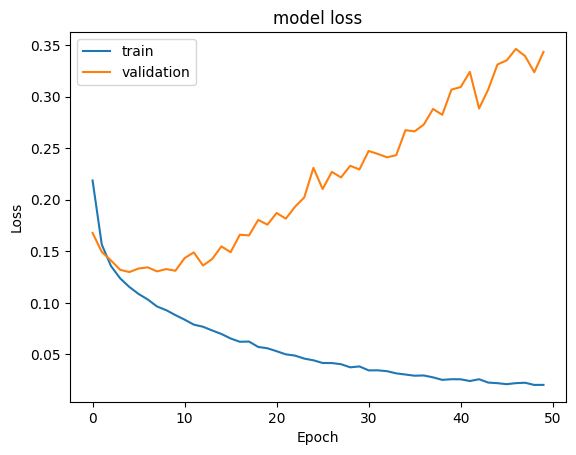

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Observations:
- From the chart above, it can be seen that the validation loss increases with increasing epoch
- This may mean that with more epoch, the model will overfit more towards the training data.

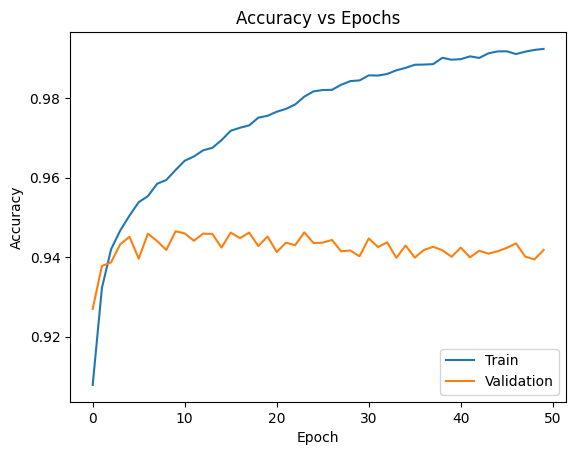

In [ ]:
#Studying the difference between accuracy and epoch
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Observations:
- The accuracy of the training data is constantly high at 1.00
- Meanwhile, the accuracy of the model on validation data is around 0.94.
- This is a sign of overfitting, and could be due to the increased in number of hidden layers.

590/590 [==============================] - 1s 1ms/step
Best Threshold=0.767428, G-Mean=0.945


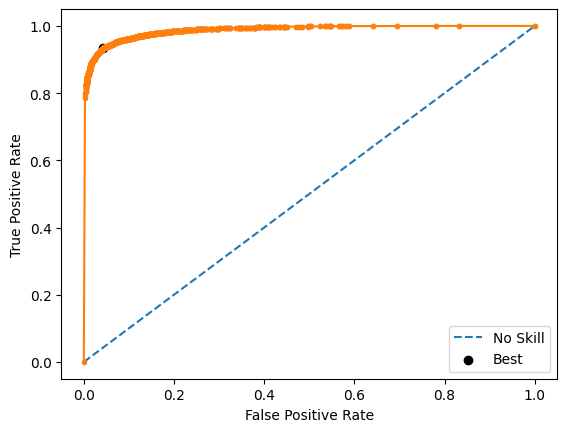

In [ ]:
# predict probabilities
yhat2 = model_2.predict(x_test_scaled)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e2=model_2.predict(x_test_scaled)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

590/590 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8562
           1       0.96      0.93      0.95     10314

    accuracy                           0.94     18876
   macro avg       0.94      0.95      0.94     18876
weighted avg       0.94      0.94      0.94     18876



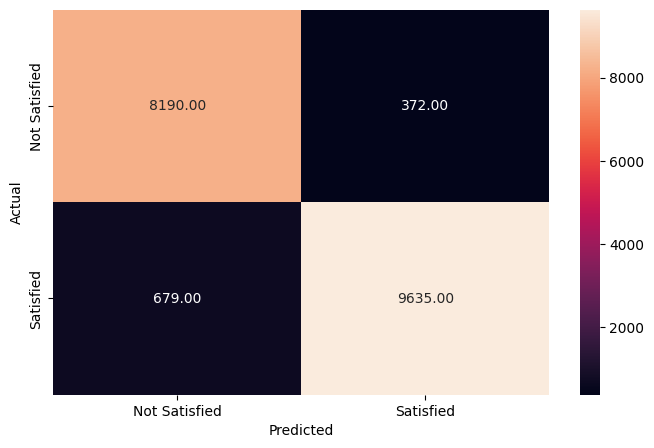

In [ ]:
metrics_score(y_test, y_pred_e2)

Observations:
- The overall accuracy on test data is 0.94, less accurate than the first model. This is due to the increaesed number of layers, which ahd cause overfitting to occur.

In the next model, we will reduce the number of layers, but utilize batch normalization

### Model 3 - Batch Normalization

Difference from model 2:
- Batch Normalization between layers
- Number of layers back to model 1
- Optimizer is still Adam

In [ ]:
#Clearing the backend resources
backend.clear_session()

#Fixing the randomness
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Creating the 3rd model
model_3 = Sequential()

#Adding hidden and output layers
model_3.add(Dense(128,activation='relu',input_dim = x_train_scaled.shape[1]))
model_3.add(BatchNormalization())
model_3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model_3.add(BatchNormalization())
model_3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3072      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model_3.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(x_train_scaled,
                        y_train,
                        batch_size=64,
                        epochs=50,
                        verbose=1,
                        validation_split = 0.2)

Epoch 1/50
944/944 [==============================] - 5s 4ms/step - loss: 0.2380 - accuracy: 0.9004 - val_loss: 0.1738 - val_accuracy: 0.9266
Epoch 2/50
944/944 [==============================] - 4s 5ms/step - loss: 0.1710 - accuracy: 0.9271 - val_loss: 0.1496 - val_accuracy: 0.9382
Epoch 3/50
944/944 [==============================] - 3s 4ms/step - loss: 0.1503 - accuracy: 0.9366 - val_loss: 0.1365 - val_accuracy: 0.9407
Epoch 4/50
944/944 [==============================] - 3s 3ms/step - loss: 0.1386 - accuracy: 0.9410 - val_loss: 0.1341 - val_accuracy: 0.9431
Epoch 5/50
944/944 [==============================] - 3s 3ms/step - loss: 0.1313 - accuracy: 0.9437 - val_loss: 0.1289 - val_accuracy: 0.9454
Epoch 6/50
944/944 [==============================] - 4s 5ms/step - loss: 0.1261 - accuracy: 0.9463 - val_loss: 0.1294 - val_accuracy: 0.9430
Epoch 7/50
944/944 [==============================] - 3s 4ms/step - loss: 0.1199 - accuracy: 0.9480 - val_loss: 0.1248 - val_accuracy: 0.9474
Epoch 

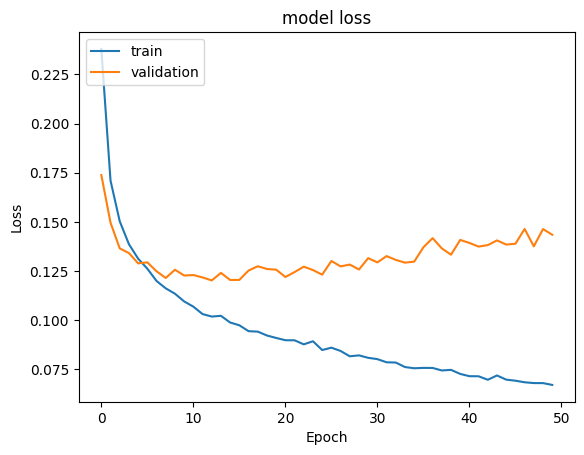

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

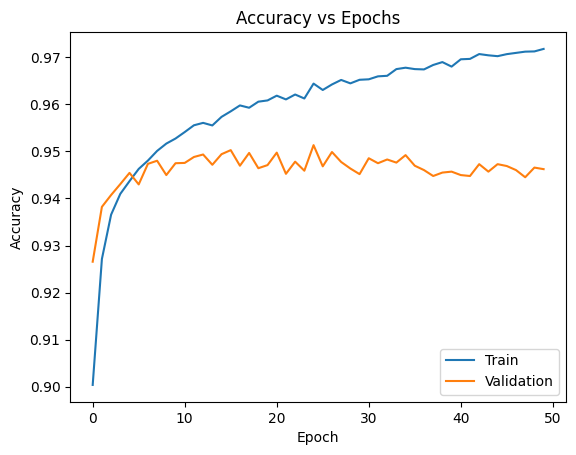

In [ ]:
#Studying the difference between accuracy and epoch
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Observations:
- With more than ~5 epochs, the model begins to overfit the training data.

590/590 [==============================] - 1s 2ms/step
Best Threshold=0.590928, G-Mean=0.946


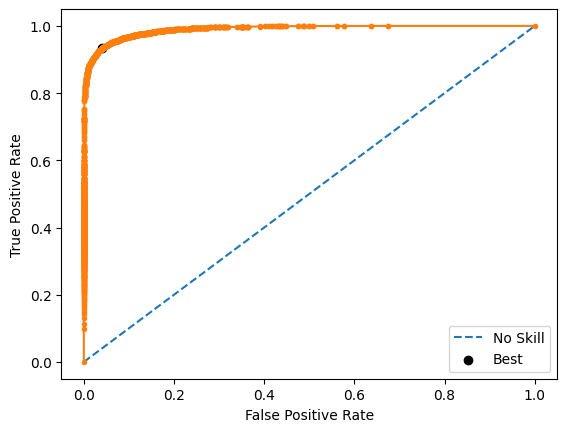

In [ ]:
# predict probabilities
yhat3 = model_3.predict(x_test_scaled)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e3=model_3.predict(x_test_scaled)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

590/590 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8562
           1       0.97      0.93      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



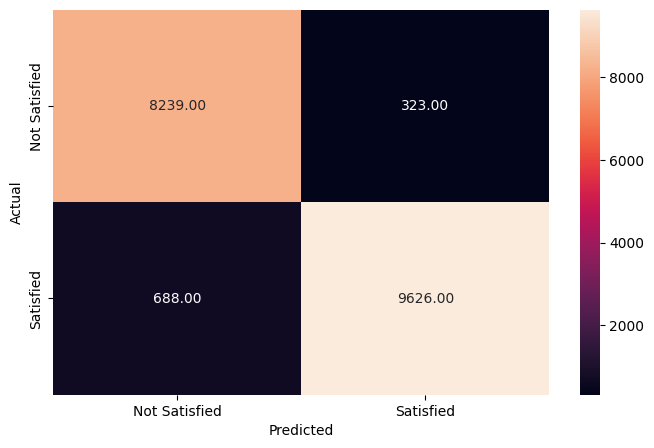

In [ ]:
metrics_score(y_test, y_pred_e3)

Observations:
- This model has better performance than model 1 and 2, which confirmed that the previous model had too many hidden layers, resulting in more overfitting
- In the next model, we will attempt to tune

 ### Model 4 - Drop Out with batch Normalization


In [ ]:
#Clearing the backend resources
backend.clear_session()

#Fixing the randomness
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_4 = Sequential()
      #Adding the hidden and output layers
model_4.add(Dense(128,activation='relu',kernel_initializer='he_uniform',input_dim = x_train_scaled.shape[1]))
model_4.add(Dropout(0.2))
model_4.add(BatchNormalization())
model_4.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dropout(0.2))
model_4.add(BatchNormalization())
# model_4.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
# model_4.add(Dropout(0.2))
# model_4.add(BatchNormalization())
model_4.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3072      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model_4.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(x_train_scaled,
                        y_train,
                        batch_size=64,
                        epochs=50,
                        verbose=1,
                        validation_split = 0.2)

Epoch 1/50
944/944 [==============================] - 7s 5ms/step - loss: 0.3214 - accuracy: 0.8634 - val_loss: 0.2218 - val_accuracy: 0.9074
Epoch 2/50
944/944 [==============================] - 3s 3ms/step - loss: 0.2523 - accuracy: 0.8944 - val_loss: 0.1983 - val_accuracy: 0.9148
Epoch 3/50
944/944 [==============================] - 4s 4ms/step - loss: 0.2284 - accuracy: 0.9044 - val_loss: 0.1785 - val_accuracy: 0.9242
Epoch 4/50
944/944 [==============================] - 5s 6ms/step - loss: 0.2115 - accuracy: 0.9101 - val_loss: 0.1633 - val_accuracy: 0.9325
Epoch 5/50
944/944 [==============================] - 4s 4ms/step - loss: 0.1977 - accuracy: 0.9172 - val_loss: 0.1552 - val_accuracy: 0.9354
Epoch 6/50
944/944 [==============================] - 3s 4ms/step - loss: 0.1895 - accuracy: 0.9211 - val_loss: 0.1480 - val_accuracy: 0.9372
Epoch 7/50
944/944 [==============================] - 4s 4ms/step - loss: 0.1799 - accuracy: 0.9248 - val_loss: 0.1428 - val_accuracy: 0.9395
Epoch 

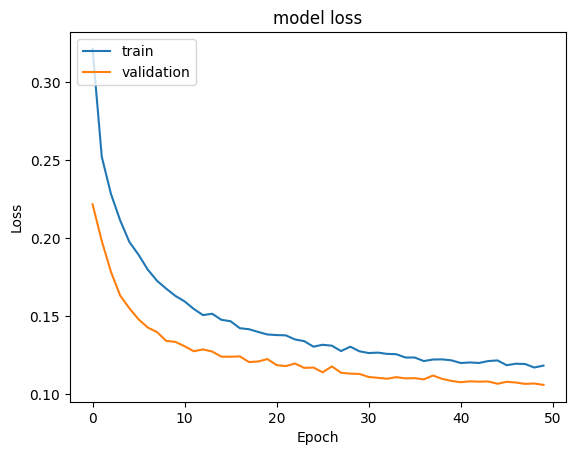

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

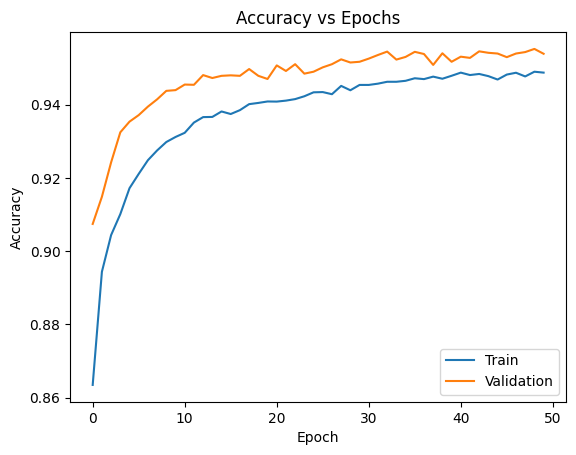

In [ ]:
#Studying the difference between accuracy and epoch
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

590/590 [==============================] - 1s 2ms/step
Best Threshold=0.590928, G-Mean=0.946


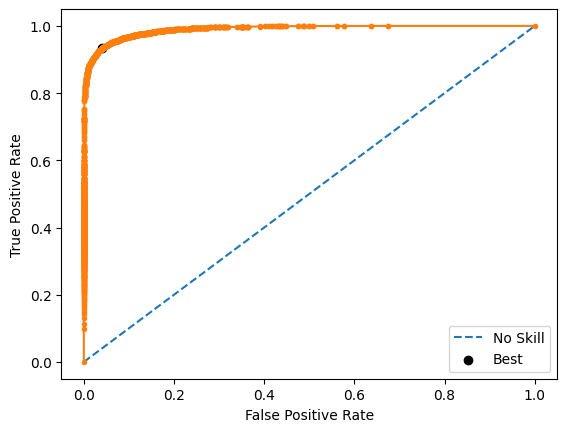

In [ ]:
# predict probabilities
yhat4 = model_4.predict(x_test_scaled)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e4=model_4.predict(x_test_scaled)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

590/590 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8562
           1       0.98      0.93      0.95     10314

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



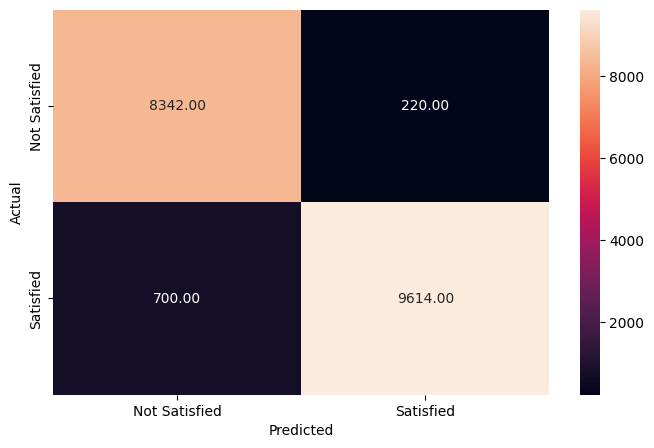

In [ ]:
metrics_score(y_test, y_pred_e4)

Observations:
- This model performed better than the previous models, even if only a little.

We will then use this 4th model to predict the unseen data and submit for the hackathon.

There are many more ways to tune the model, but due to a time constraint, they were not explored.

## Running best model on test data

In [ ]:
#Storing the test data that will be used to make prediction for the hackathon
traveldata_test = pd.read_csv('/content/drive/MyDrive/GreatLearning/Hackathon/Datasets/Traveldata_test.csv')
surveydata_test = pd.read_csv('/content/drive/MyDrive/GreatLearning/Hackathon/Datasets/Surveydata_test.csv')

#merge dataframes
test = pd.merge(traveldata_test,surveydata_test,how='inner',on='ID')
if n_passengers == test['ID'].nunique():
    print('merge is succesfull, all passengers are in the final dataframe')

#Converting all features with satisfactory scales to numerical variables
for column in appreciation_variables:
    test[column] = test[column].apply(cat_to_numerical)

#Converting Platform_Location to numerical variables
test['Platform_Location'].replace({'Very Convenient': 5,
                                    'Convenient': 4,
                                    'Manageable': 3,
                                    'Needs Improvement': 2,
                                    'Inconvenient': 1,
                                    'Very Inconvenient': 0}, inplace=True)

# Creating dummy variables for the categorical columns
test_data = pd.get_dummies(test,
                      columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
                      drop_first = True) #Only apply this function to object and category variables

#Store the ID column in a variable first
id_column = test_data['ID']

#Remove the ID column as it is not needed for the scaling
test_data = test_data.drop('ID',axis=1)

#Scale the data
test_data_scaled=sc.fit_transform(test_data)
test_data_scaled=pd.DataFrame(test_data_scaled, columns=test_data.columns)

#Label the data with the respective ID
final_to_predict = test_data_scaled.join(id_column)

#Print out to see what the scaled data look like
final_to_predict

In [ ]:
#Make prediction using model 4, and drop ID column as it is not needed forthe prediction
final_to_predict['predictions']= model_4.predict(final_to_predict.drop('ID',axis=1))

# Apply the ROC-AUC best threshold for model 4's prediction
final_to_predict['predictions'] = final_to_predict['predictions'].apply(lambda x: 1 if x>thresholds3[ix] else 0)

#Save the predicted data into the csv file
final_to_predict[['ID','predictions']].to_csv("predictions.csv",index=False)

1113/1113 [==============================] - 3s 3ms/step


In [ ]:
#Print out the data to see what it looks like
final_to_predict[['ID','predictions']]

ID  predictions
0      99900001            0
1      99900002            1
2      99900003            1
3      99900004            0
4      99900005            0
...         ...          ...
35597  99935598            0
35598  99935599            1
35599  99935600            1
35600  99935601            1
35601  99935602            0

[35602 rows x 2 columns]

The final_to_predict dataframe will then be used to fare against the hackathon.

My model obtained an accuracy of 80%